# Colabroación con Andrés Mahía

Lending Club

In [6]:
#Librerías

#Basics
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
import scipy.stats as stats
import sweetviz as sv

#Synth data
import sdv
from sdv.tabular import CTGAN, GaussianCopula, CopulaGAN, TVAE
from sdv.evaluation import evaluate
from sdv.sampling import Condition
from table_evaluator import TableEvaluator
import torch
import pickle
import io


#Own Modules
import sys
import os
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../src'))
from auxiliar.aux_func import qqploter, var_comparative, get_deviation_of_mean_perc, histogram_wo_outliers


import warnings
warnings.filterwarnings('ignore')

In [7]:
# Real Data Train & Test
train = pd.read_parquet("../data/andres/train.parquet")
test = pd.read_parquet("../data/andres/test.parquet")

In [4]:
# Generator 
generator = CTGAN.load('../data/andres/ctgan.pkl') 

## Oversampling Test

In [4]:
# first we generate a  sample of the minority class for oversampling
%%time
np.random.seed(2022)
condition = Condition({'loan_status': 1}, num_rows=(len(train[train['loan_status']==0])-len(train[train['loan_status']==1])))
synthetic_data = generator.sample_conditions(conditions=[condition])

Sampling conditions: 100%|██████████| 171218/171218 [00:49<00:00, 3454.65it/s]

CPU times: user 1min 30s, sys: 2.82 s, total: 1min 33s
Wall time: 49.6 s


In [5]:
# Example loan_status=1 in all rows
synthetic_data

loan_amnt  term         int_rate  installment sub_grade  emp_length  \
0         12128.0    36   (7.685, 16.47]       320.17        B3         0.0   
1         12078.0    36     (0.0, 7.685]       392.92        E1         2.0   
2          8518.0    36   (7.685, 16.47]       209.78        B1         3.0   
3         12595.0    36   (7.685, 16.47]       240.63        B5         0.0   
4          2013.0    36   (7.685, 16.47]        67.85        E1        10.0   
...           ...   ...              ...          ...       ...         ...   
171213    16711.0    60  (16.47, 18.915]       350.39        D1        10.0   
171214    29557.0    60  (16.47, 18.915]       810.22        C5        10.0   
171215    15427.0    60   (7.685, 16.47]       364.24        D1         0.0   
171216     2588.0    36  (18.915, 21.62]        61.54        D3         0.0   
171217    12048.0    60  (16.47, 18.915]       365.13        C5         0.0   

       home_ownership             annual_inc             purpose  \
0                RENT    (37004.0, 104345.0]  debt_consolidation   
1            MORTGAGE    (37004.0, 104345.0]  debt_consolidation   
2            MORTGAGE    (37004.0, 104345.0]  debt_consolidation   
3            MORTGAGE  (131002.0, 8706583.0]  debt_consolidation   
4                RENT    (37004.0, 104345.0]               other   
...               ...                    ...                 ...   
171213            OWN    (37004.0, 104345.0]  debt_consolidation   
171214       MORTGAGE    (37004.0, 104345.0]  debt_consolidation   
171215       MORTGAGE    (37004.0, 104345.0]               other   
171216           RENT    (37004.0, 104345.0]  debt_consolidation   
171217           RENT    (37004.0, 104345.0]  debt_consolidation   

                      dti  ...  open_acc  revol_bal  revol_util  total_acc  \
0         (7.775, 26.205]  ...       3.0    14143.0       97.86       25.0   
1         (7.775, 26.205]  ...       8.0     7621.0       69.15       22.0   
2        (26.205, 30.155]  ...      20.0     7401.0       23.45       55.0   
3         (7.775, 26.205]  ...      23.0     6967.0       38.28       53.0   
4          (5.715, 7.775]  ...       3.0    16457.0       29.89       21.0   
...                   ...  ...       ...        ...         ...        ...   
171213  (30.155, 10000.0]  ...      14.0    20075.0       59.36       41.0   
171214    (7.775, 26.205]  ...      21.0    32597.0       27.13       47.0   
171215    (7.775, 26.205]  ...       4.0     8573.0       52.27       13.0   
171216    (7.775, 26.205]  ...       3.0     3231.0       22.28        6.0   
171217  (30.155, 10000.0]  ...      15.0    12956.0       65.74       32.0   

        mort_acc  pub_rec_bankruptcies  zip_code  year     region loan_status  
0            0.0                     0     29597  2014    MidWest           1  
1            1.0                     1       813  2012  SouthEast           1  
2            1.0                     1       813  2015       West           1  
3            1.0                     1     29597  2015  SouthEast           1  
4            1.0                     1       813  2014       West           1  
...          ...                   ...       ...   ...        ...         ...  
171213       1.0                     0     29597  2015    MidWest           1  
171214       1.0                     0     30723  2014       West           1  
171215       0.0                     0     11650  2013    MidWest           1  
171216       0.0                     0       813  2013  SouthEast           1  
171217       0.0                     0     30723  2013  SouthEast           1  

[171218 rows x 21 columns]

In [6]:
#save data to share
synthetic_data.to_parquet('../data/andres/synth_data_loan_01.parquet', index=False)

In [ ]:
#load data
synthetic_data = pd.read_parquet('../data/andres/synth_data_loan_01.parquet')

## All Data Test

In [7]:
# now we generate a sample without conditions
%%time
np.random.seed(2022)
synthetic_data_full = generator.sample(len(train)*2)

CPU times: user 34.8 s, sys: 323 ms, total: 35.1 s
Wall time: 19.7 s


In [8]:
synthetic_data_full

loan_amnt  term         int_rate  installment sub_grade  emp_length  \
0         11543.0    36  (18.915, 21.62]       322.69        D3         0.0   
1          9770.0    36   (7.685, 16.47]       197.68        B1        10.0   
2         11329.0    36   (7.685, 16.47]       352.63        B1         0.0   
3         11881.0    36   (7.685, 16.47]       407.84        B3        10.0   
4         23554.0    36   (7.685, 16.47]       613.00        B1        10.0   
...           ...   ...              ...          ...       ...         ...   
594039     8526.0    36   (7.685, 16.47]       248.31        B3        10.0   
594040    12174.0    36     (0.0, 7.685]       387.44        A1         3.0   
594041    22299.0    60  (18.915, 21.62]       498.90        C5        10.0   
594042    34725.0    36   (21.62, 31.99]       153.19        E4        10.0   
594043     8022.0    36     (0.0, 7.685]       396.08        D3         6.0   

       home_ownership             annual_inc             purpose  \
0                RENT     (28188.5, 37004.0]               other   
1            MORTGAGE    (37004.0, 104345.0]  debt_consolidation   
2                RENT    (37004.0, 104345.0]  debt_consolidation   
3            MORTGAGE    (37004.0, 104345.0]         credit_card   
4                 OWN    (37004.0, 104345.0]         credit_card   
...               ...                    ...                 ...   
594039       MORTGAGE    (37004.0, 104345.0]         credit_card   
594040       MORTGAGE    (37004.0, 104345.0]               other   
594041           RENT    (37004.0, 104345.0]  debt_consolidation   
594042       MORTGAGE  (131002.0, 8706583.0]  debt_consolidation   
594043           RENT     (28188.5, 37004.0]  debt_consolidation   

                      dti  ...  open_acc  revol_bal  revol_util  total_acc  \
0         (7.775, 26.205]  ...       7.0     2063.0       19.72       10.0   
1         (7.775, 26.205]  ...      21.0    73310.0       37.92       42.0   
2          (5.715, 7.775]  ...       7.0     5687.0       53.31       13.0   
3         (7.775, 26.205]  ...       8.0    17297.0       84.26       10.0   
4          (5.715, 7.775]  ...       9.0    17221.0       55.15       19.0   
...                   ...  ...       ...        ...         ...        ...   
594039    (7.775, 26.205]  ...      15.0     8594.0       19.09       31.0   
594040       (0.0, 5.715]  ...       9.0        0.0        0.00       15.0   
594041   (26.205, 30.155]  ...       7.0    24675.0       94.63       23.0   
594042  (30.155, 10000.0]  ...       5.0    28940.0       80.35       32.0   
594043    (7.775, 26.205]  ...       9.0    11876.0       83.28       16.0   

        mort_acc  pub_rec_bankruptcies  zip_code  year     region loan_status  
0            0.0                     0     29597  2013  SouthEast           0  
1            1.0                     0     22690  2015    MidWest           0  
2            0.0                     1     29597  2016  SouthEast           0  
3            1.0                     1      5113  2013    MidWest           0  
4            0.0                     0     30723  2015       West           1  
...          ...                   ...       ...   ...        ...         ...  
594039       1.0                     0       813  2015  SouthEast           1  
594040       1.0                     0     29597  2013  SouthEast           0  
594041       0.0                     0     22690  2012  NorthEast           1  
594042       1.0                     0     30723  2013    MidWest           0  
594043       0.0                     0       813  2012    MidWest           0  

[594044 rows x 21 columns]

In [9]:
#save data to share
synthetic_data_full.to_parquet('../data/andres/synth_data_full.parquet', index=False)

In [8]:
#load data
synthetic_data_full = pd.read_parquet('../data/andres/synth_data_full.parquet')

## Train Test Comparison

                                             |          | [  0%]   00:00 -> (? left)


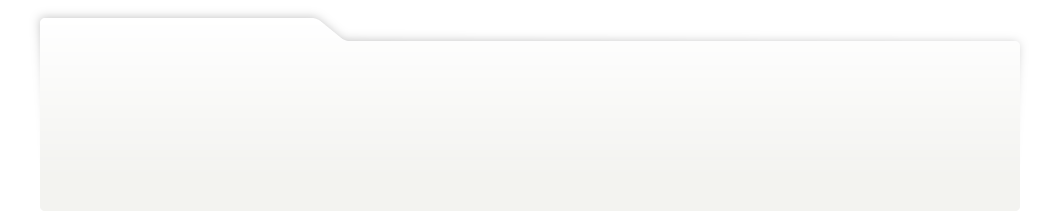
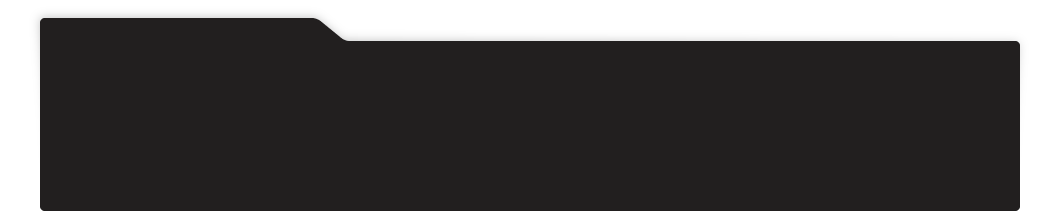
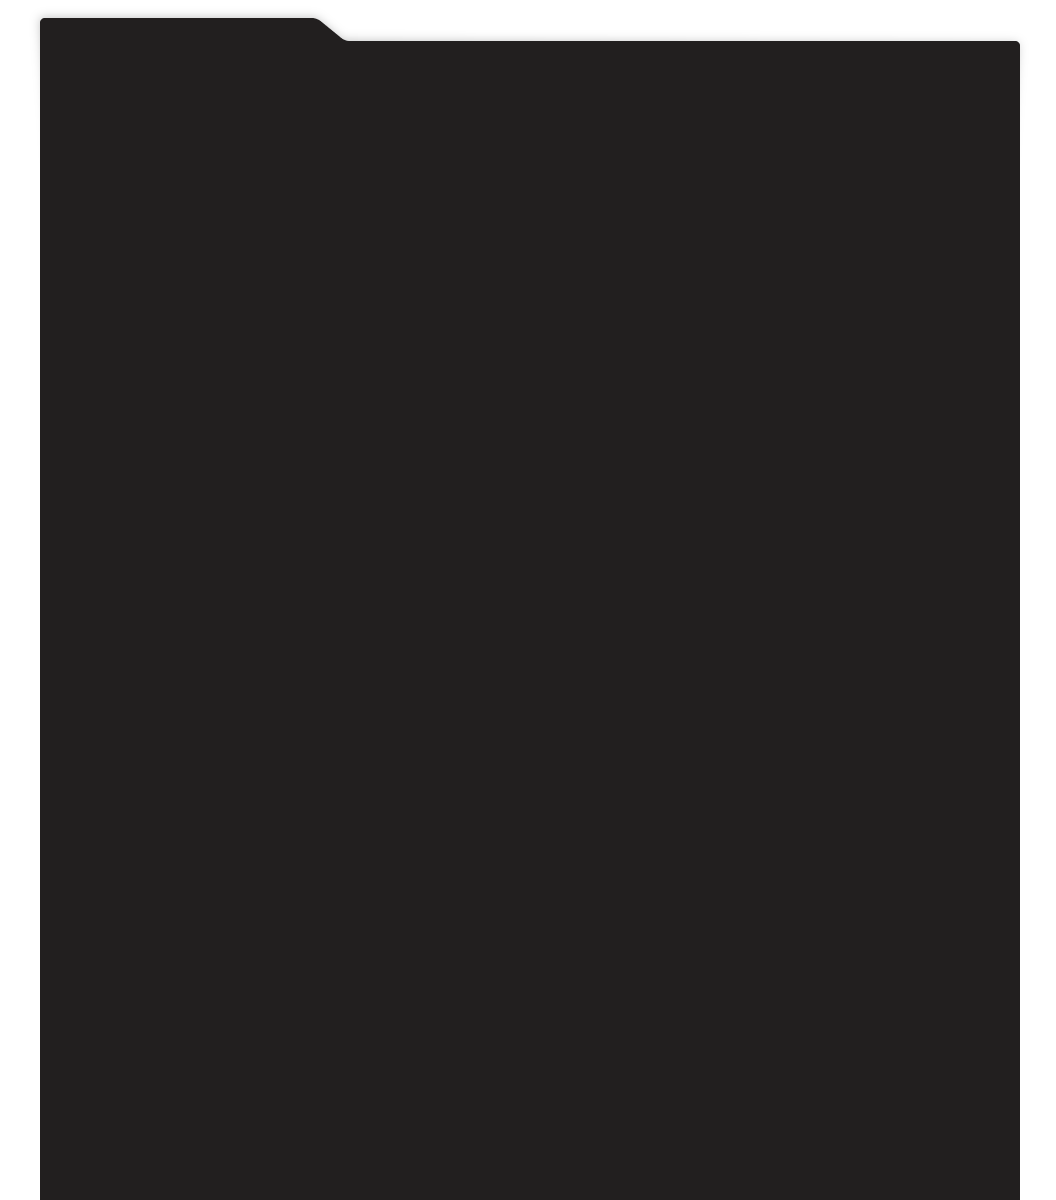
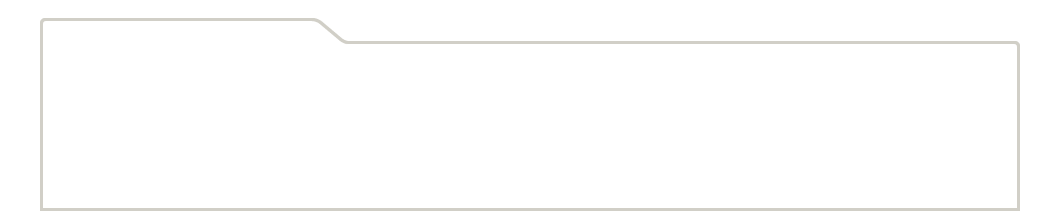
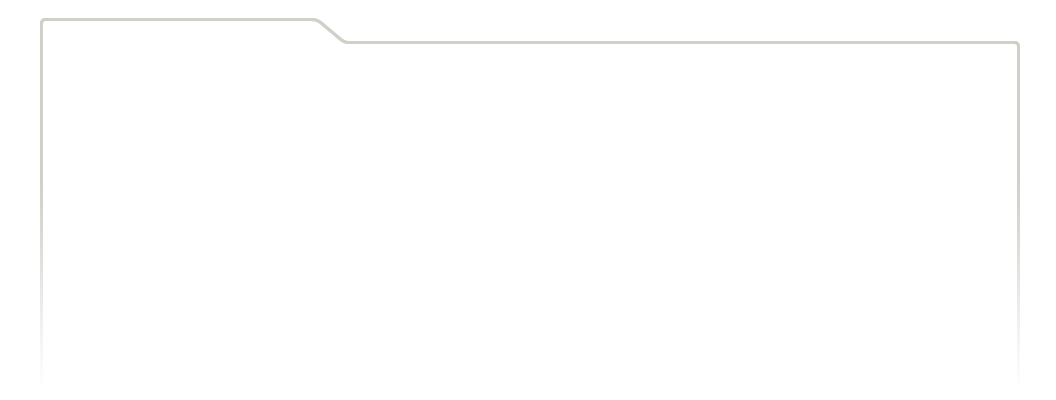
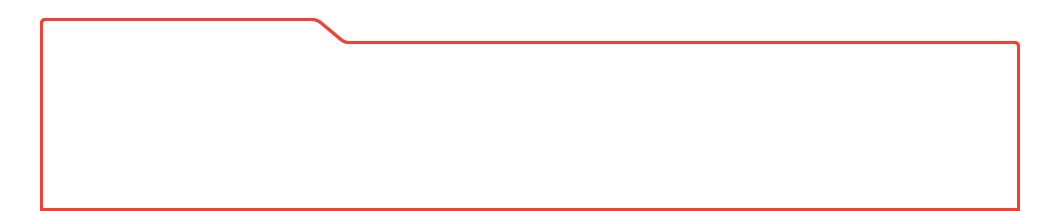
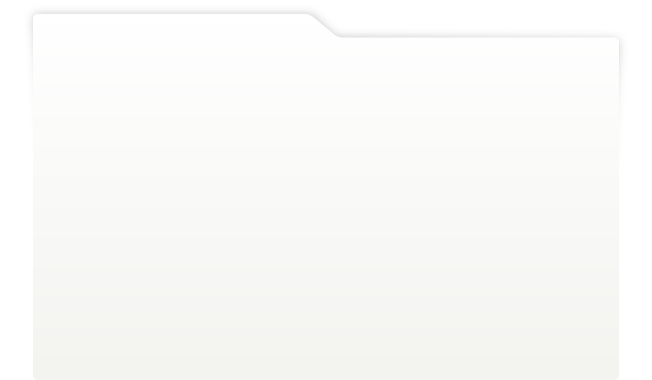
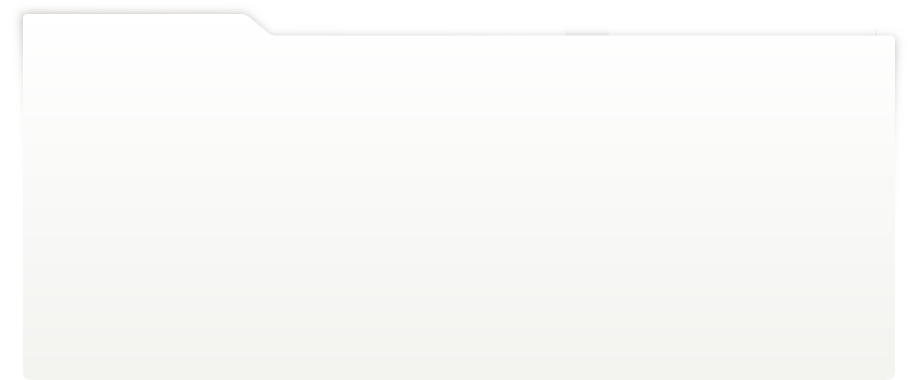
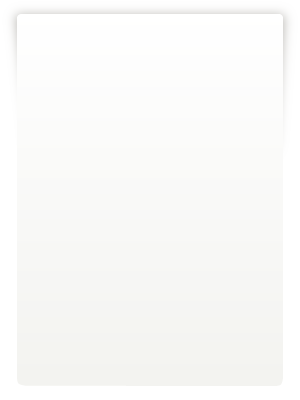
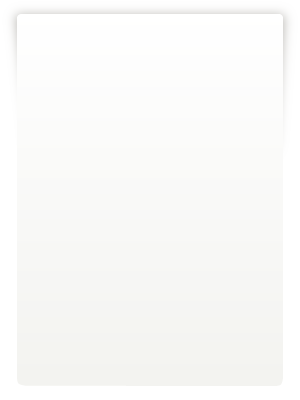
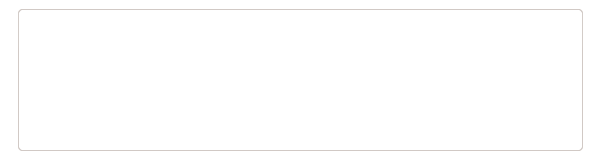
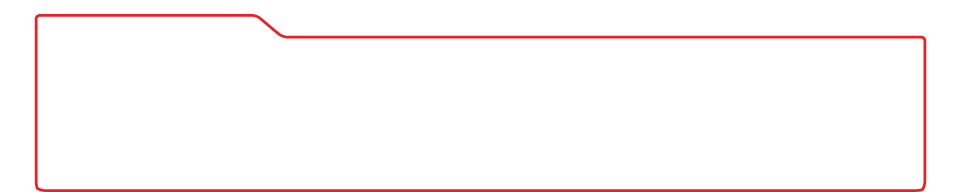
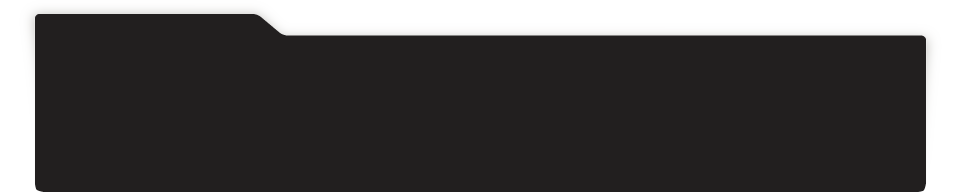
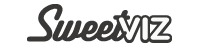
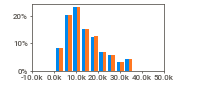
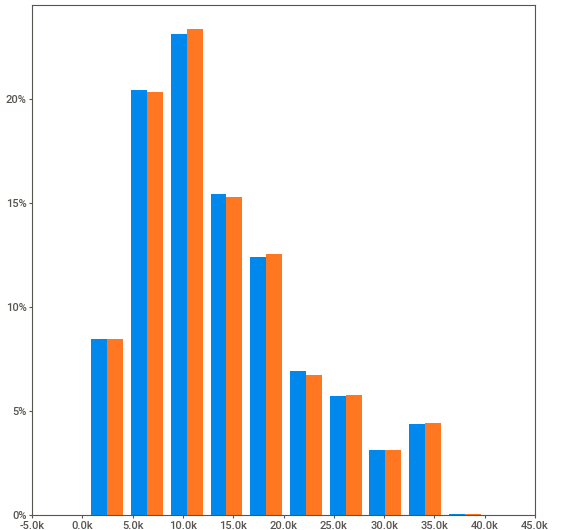
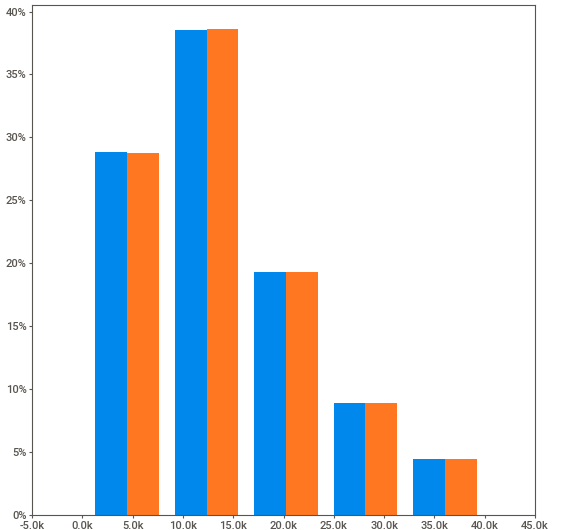
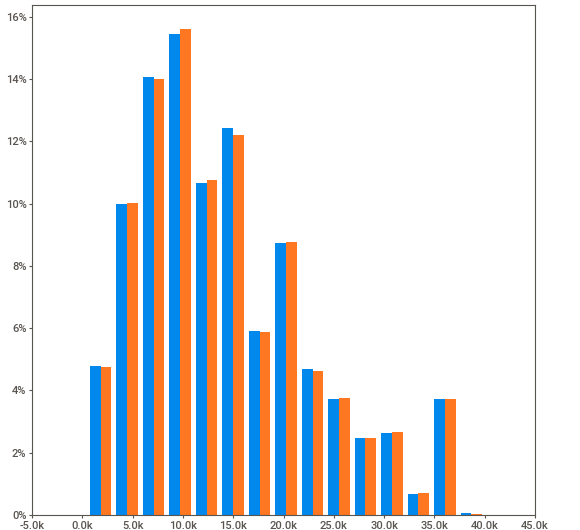
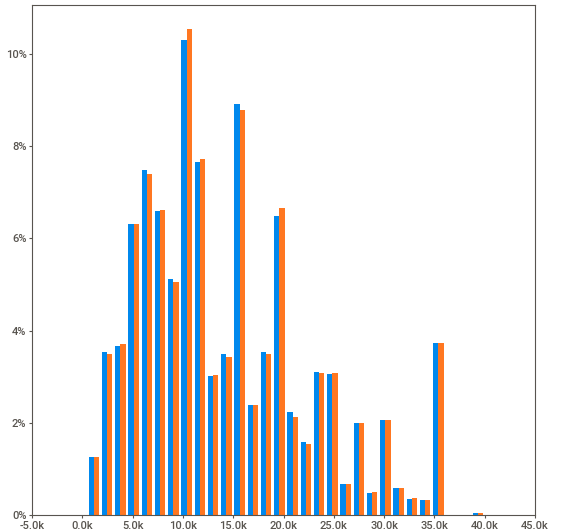
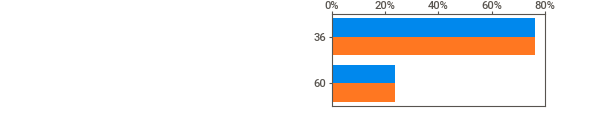
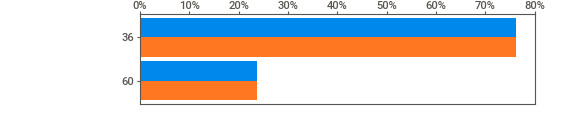
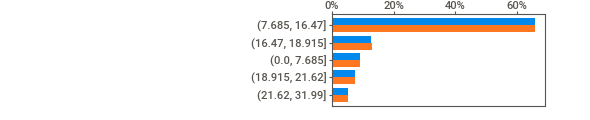
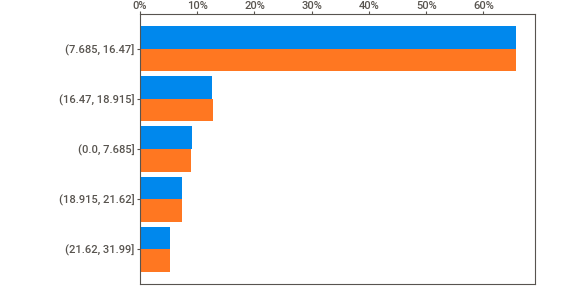
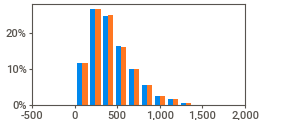
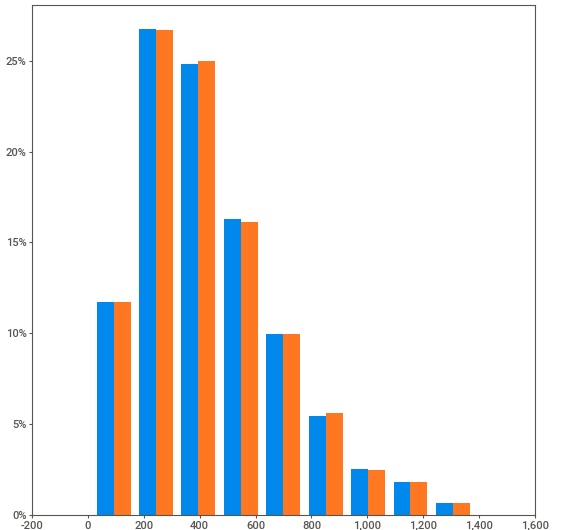
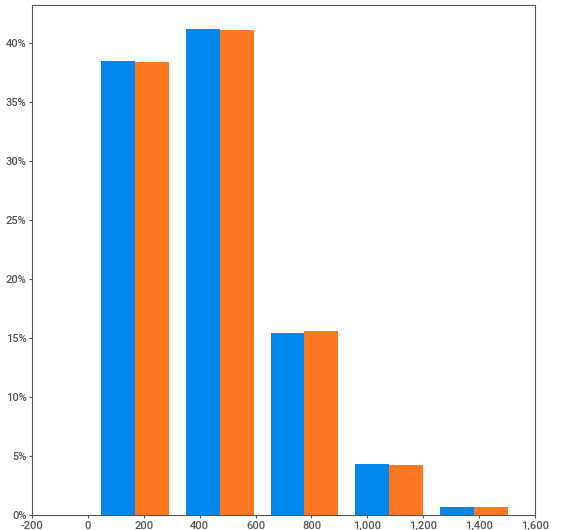
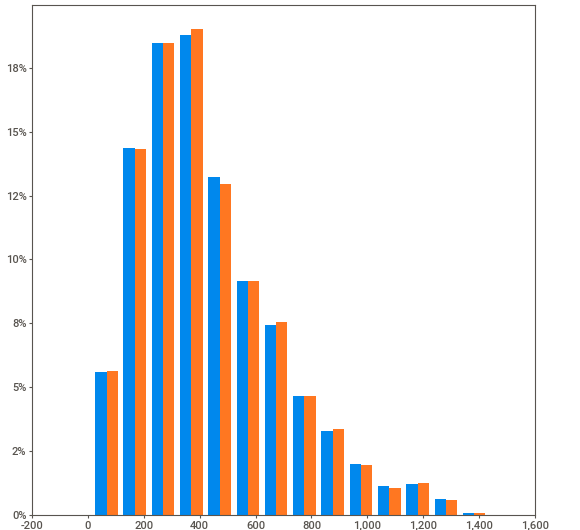
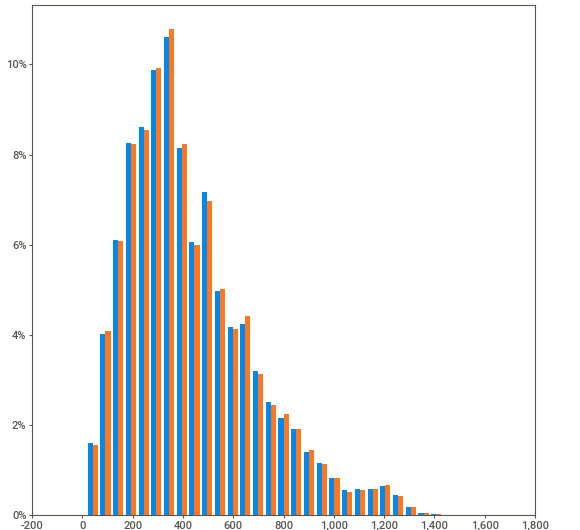
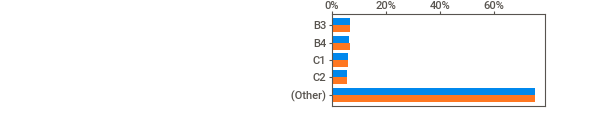
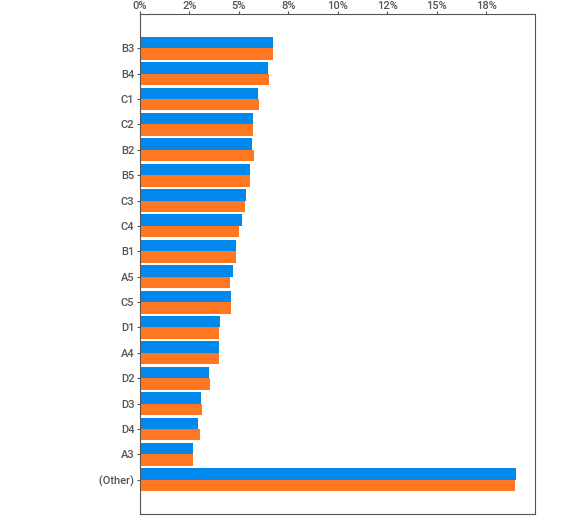
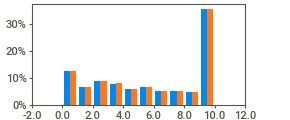
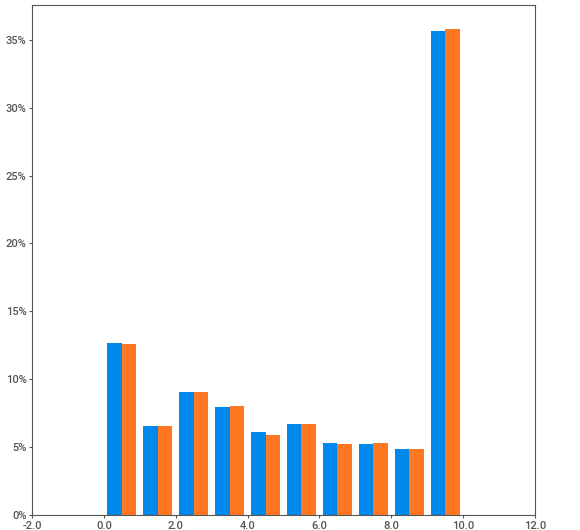
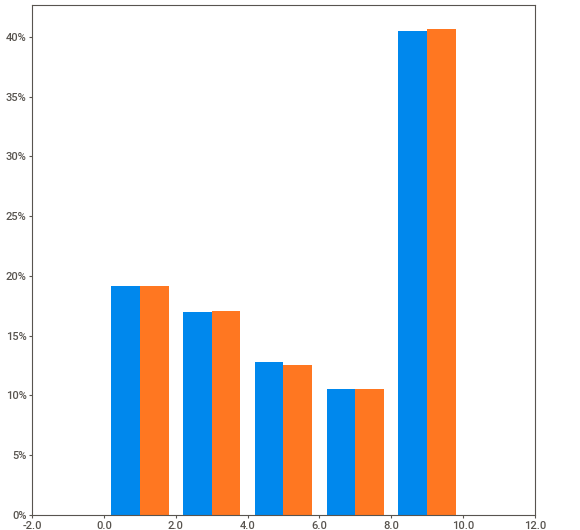
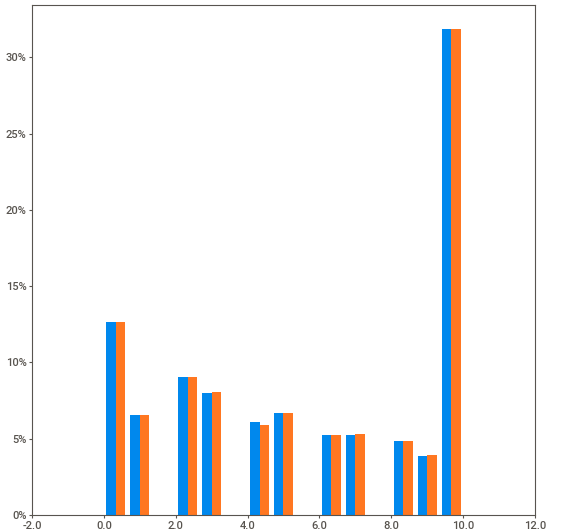
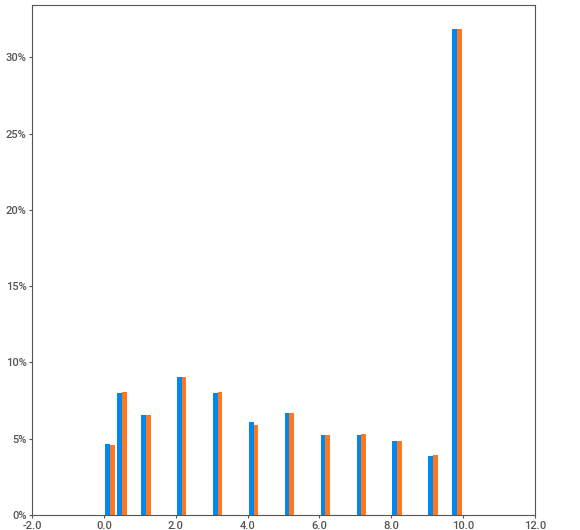
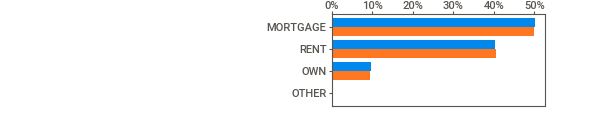
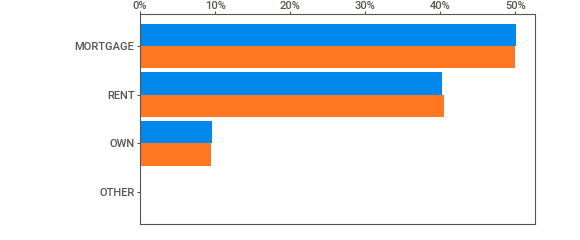
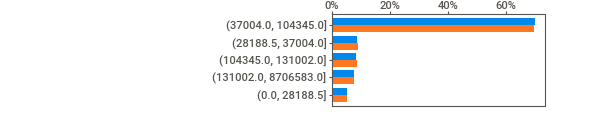
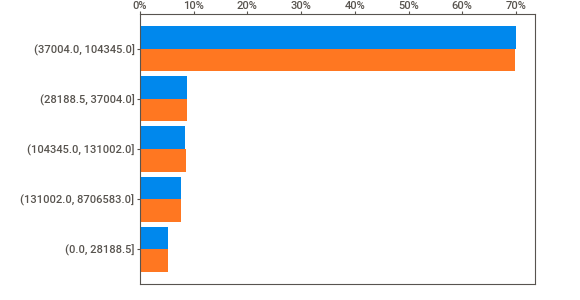
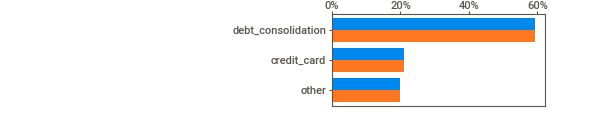
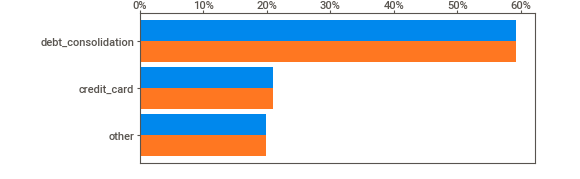
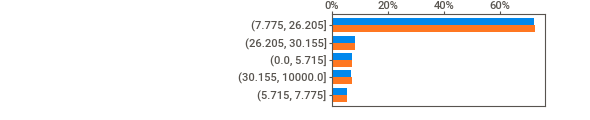
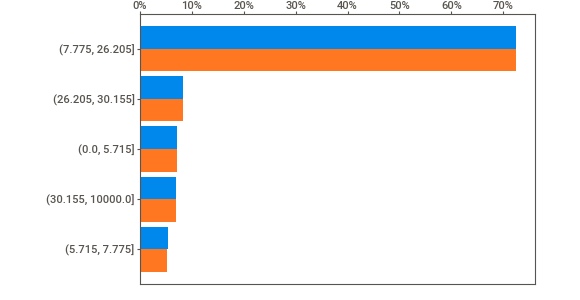
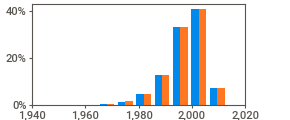
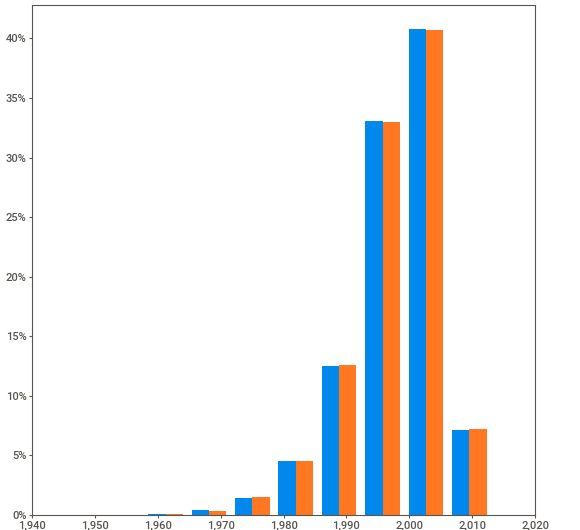
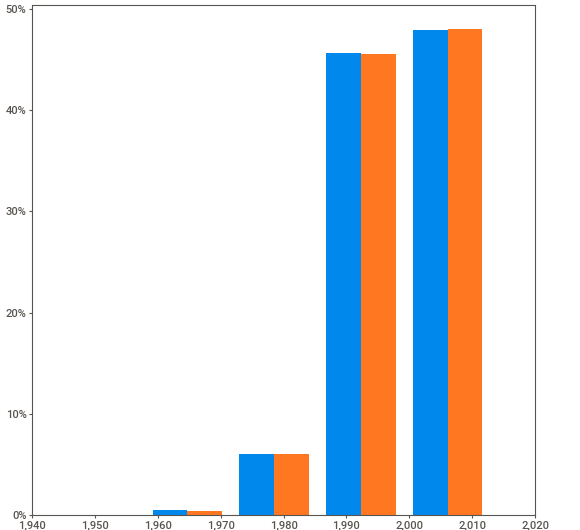
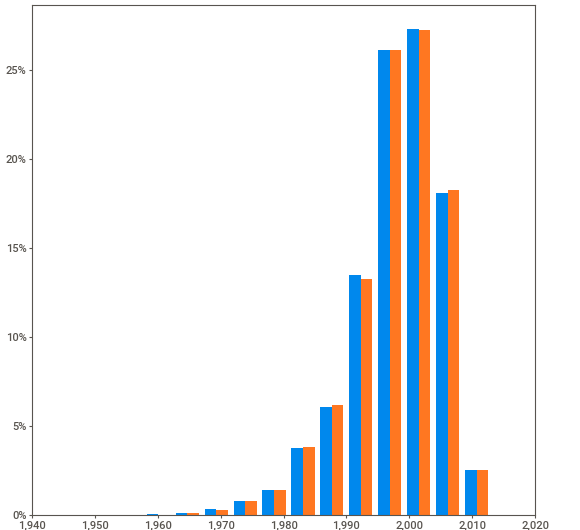
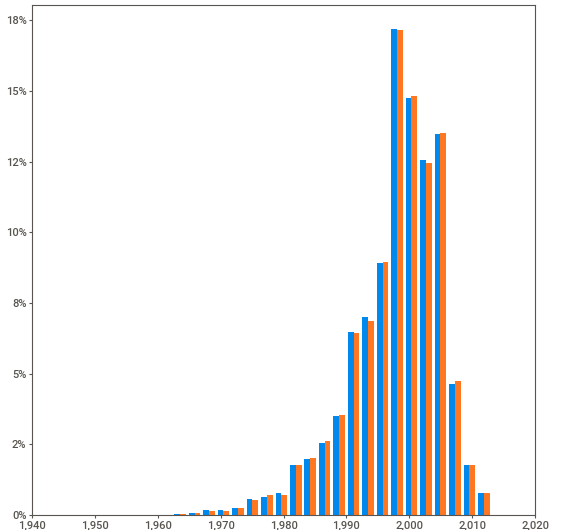
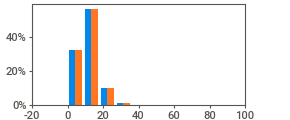
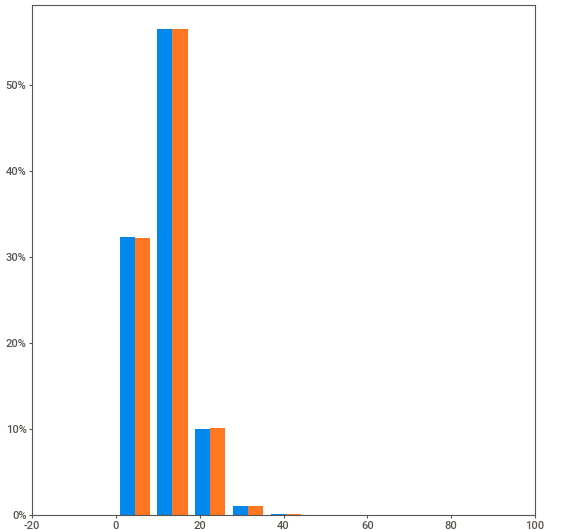
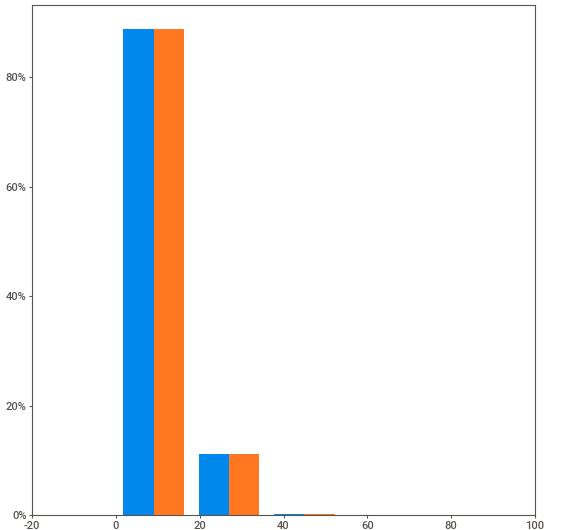
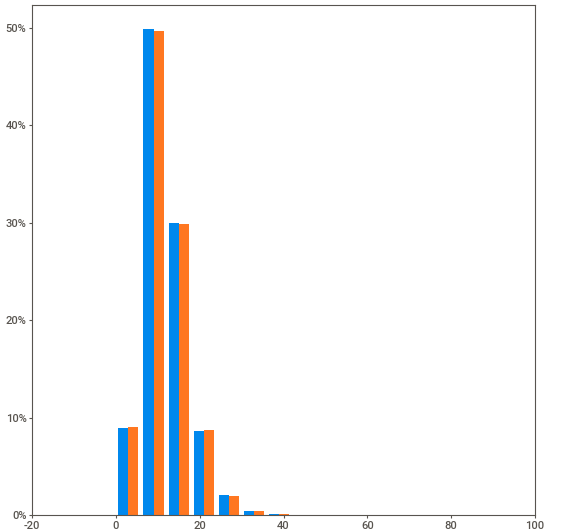
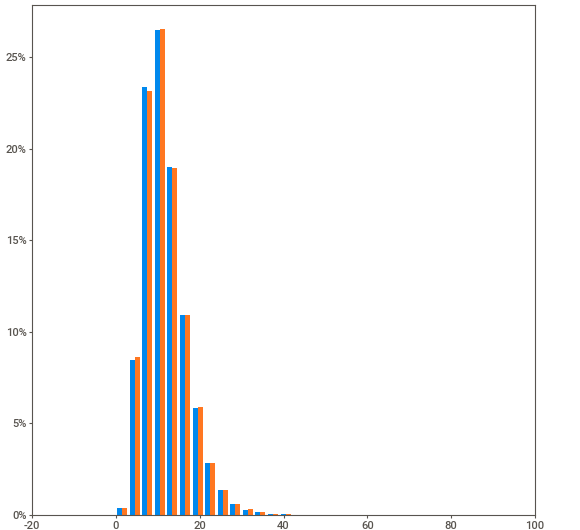
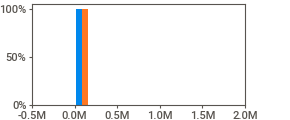
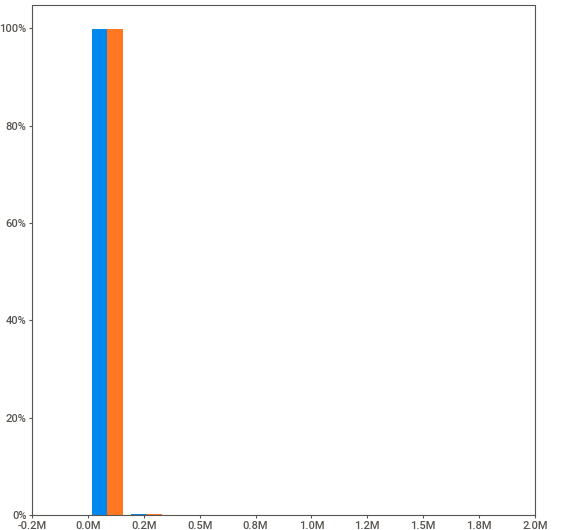
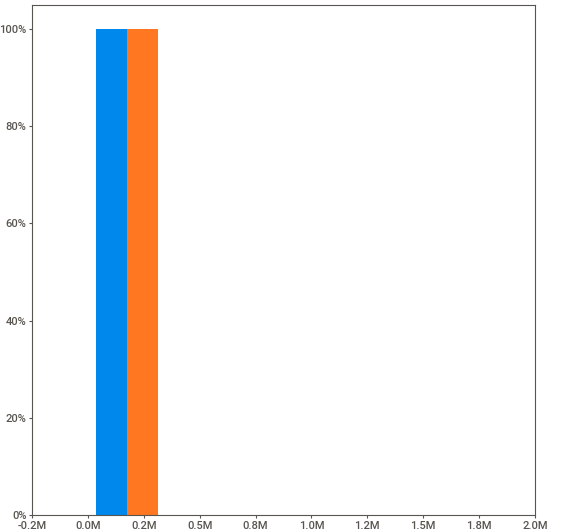
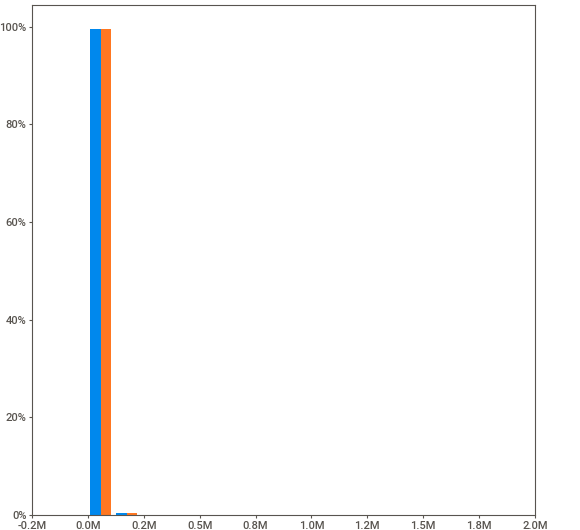
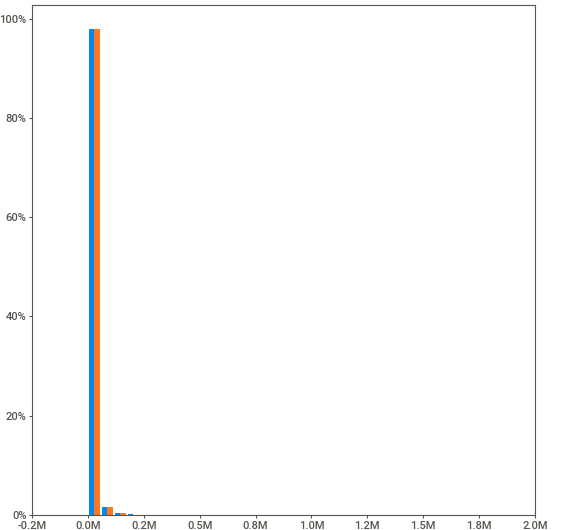
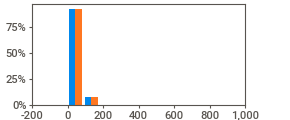
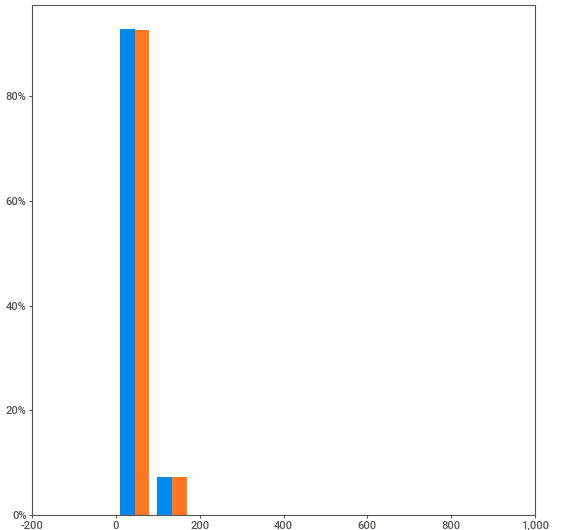
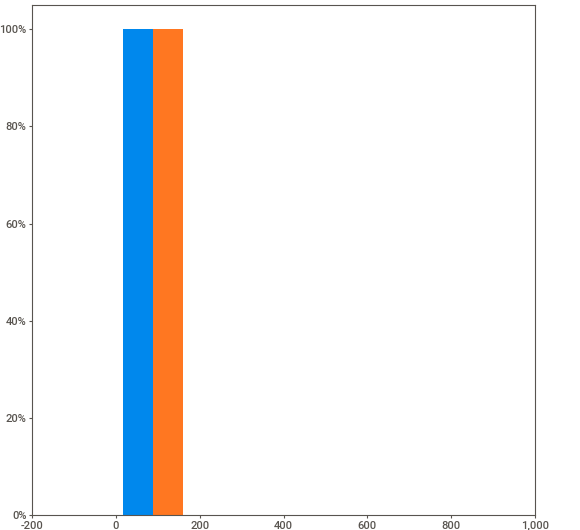
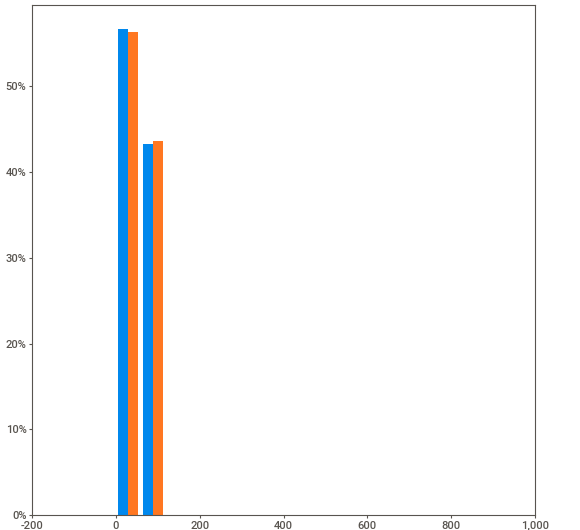
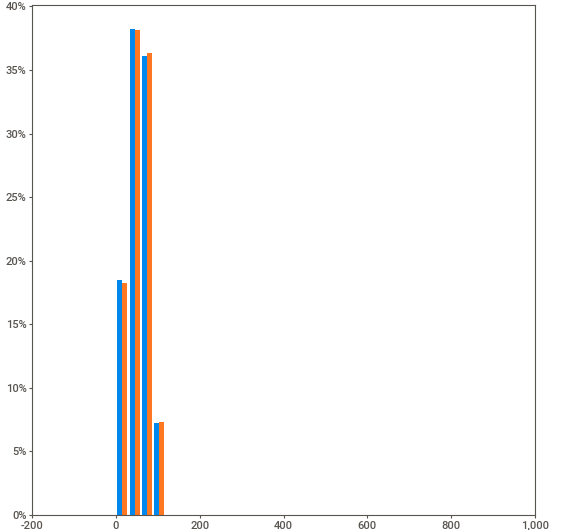
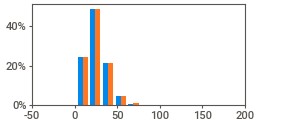
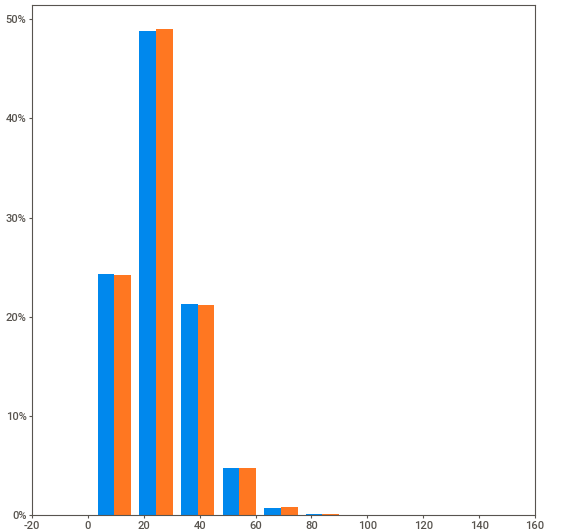
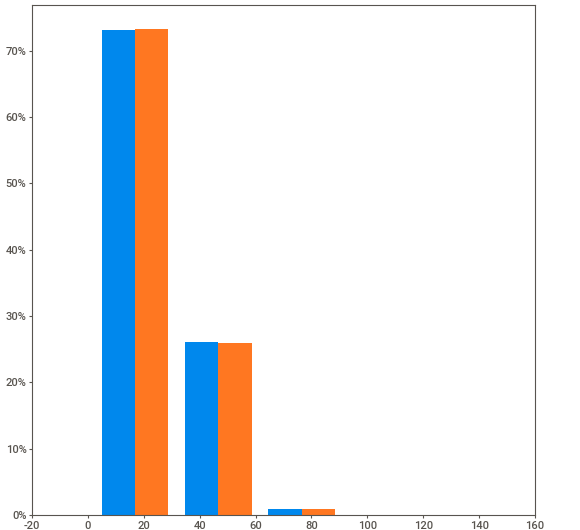
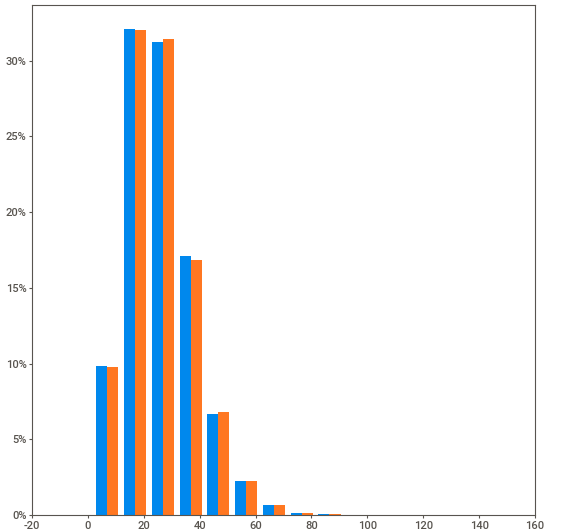
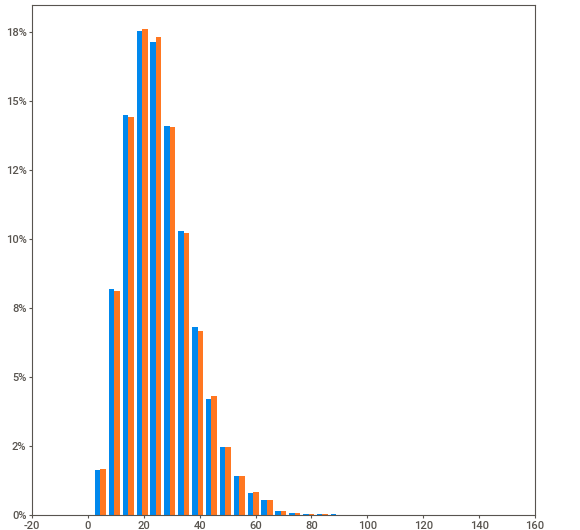
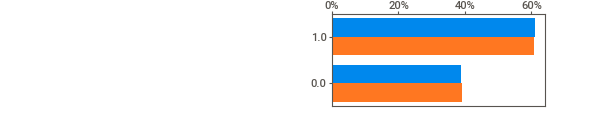
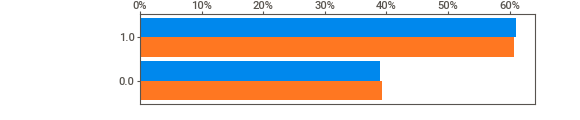
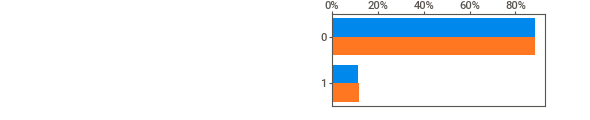
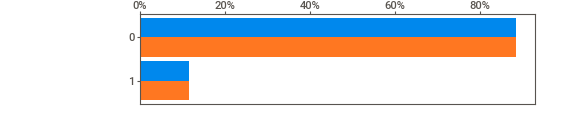
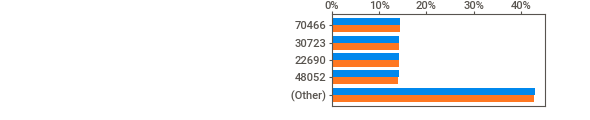
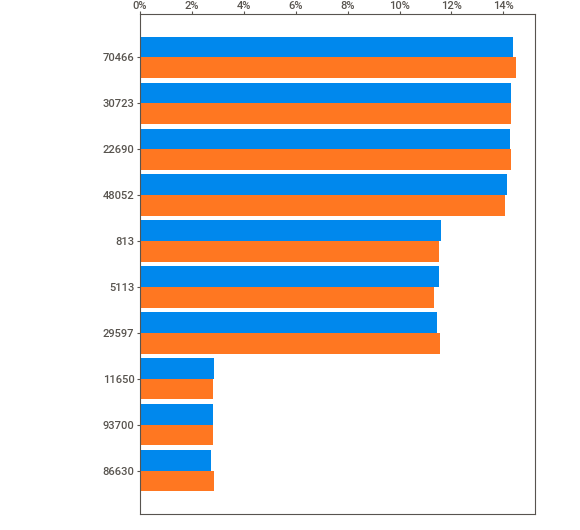
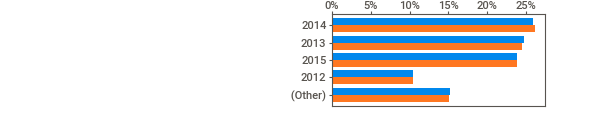
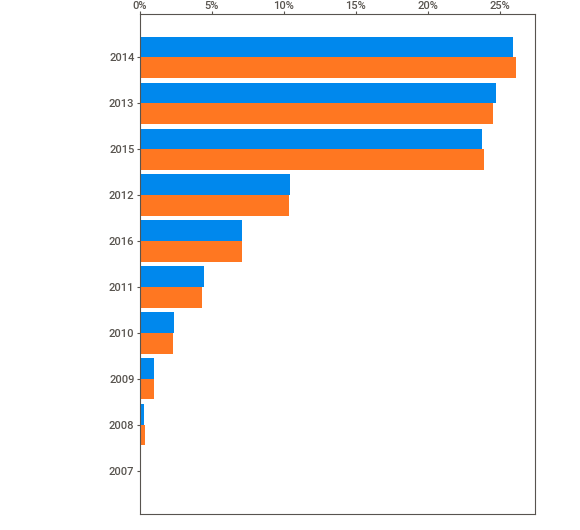
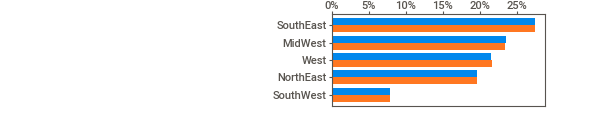
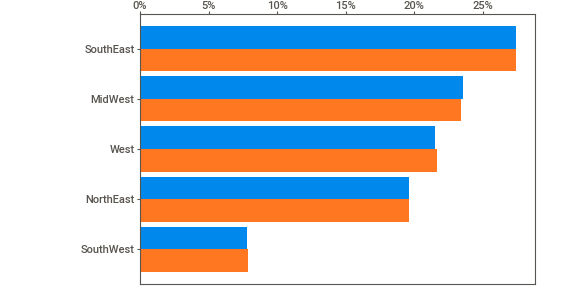
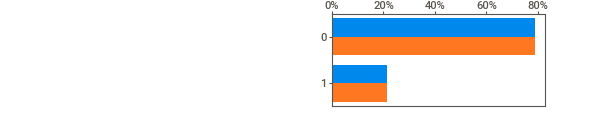
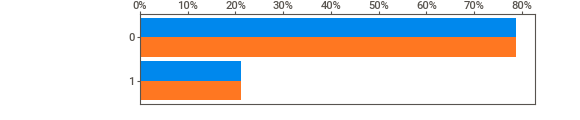
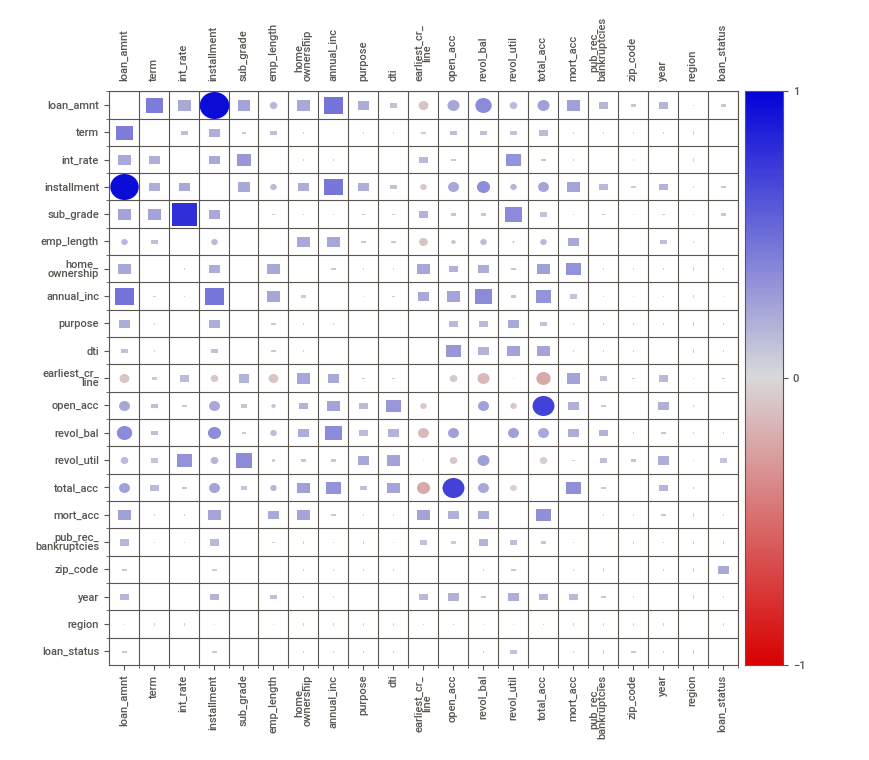
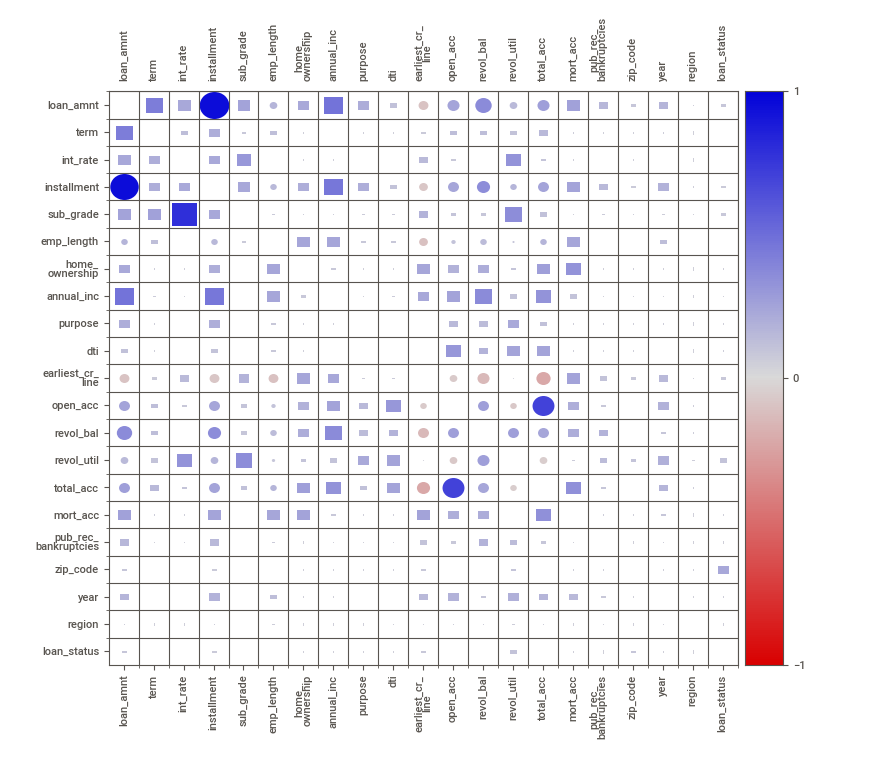

In [18]:
feature_config = sv.FeatureConfig() #,force_text=[""]
my_report = sv.compare([train, "Train"], [test, "Test"], feat_cfg=feature_config)
my_report.show_notebook( 
            layout='widescreen', 
            scale=None)

### (charged off only)

                                             |          | [  0%]   00:00 -> (? left)


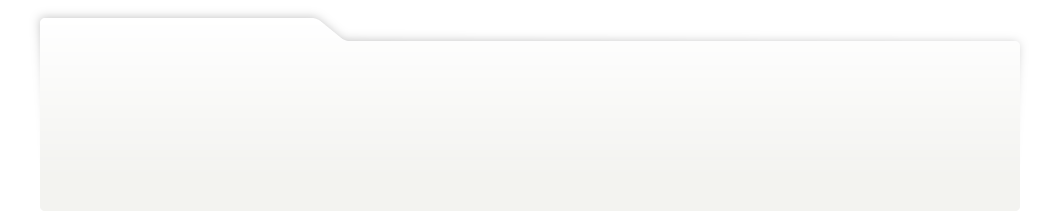
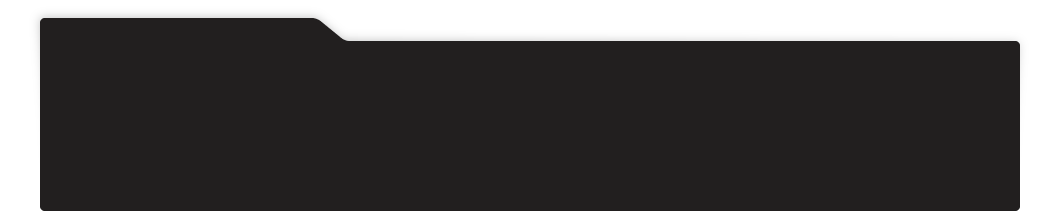
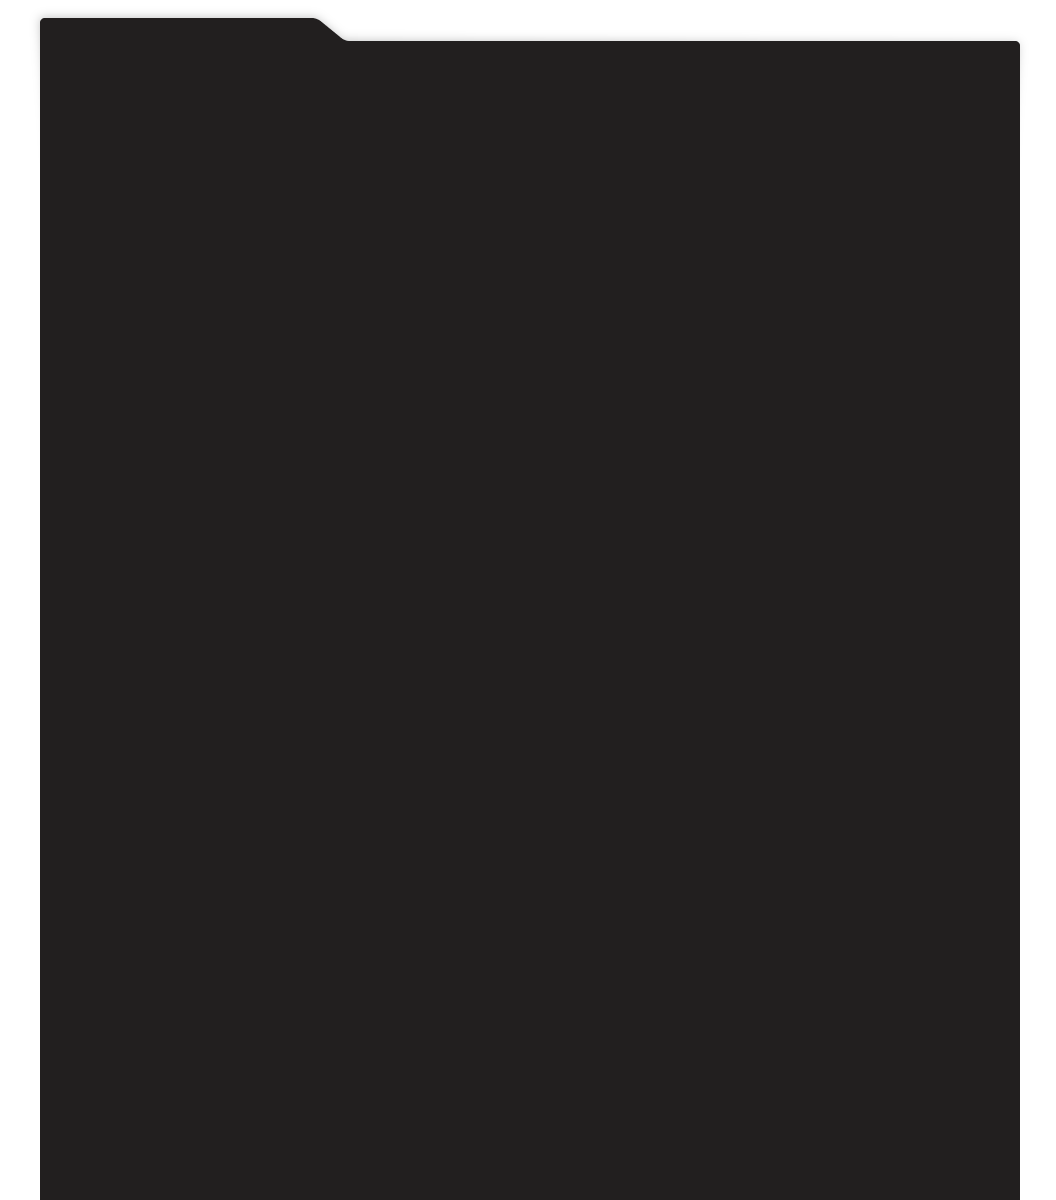
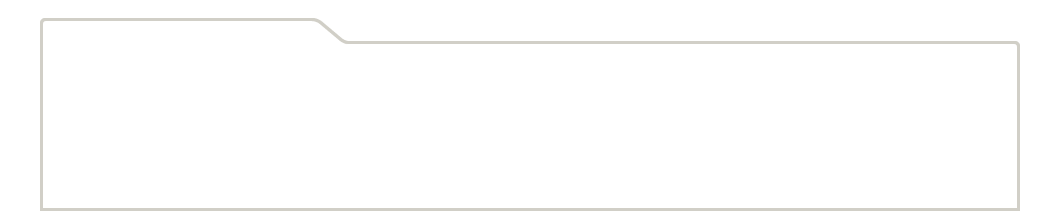
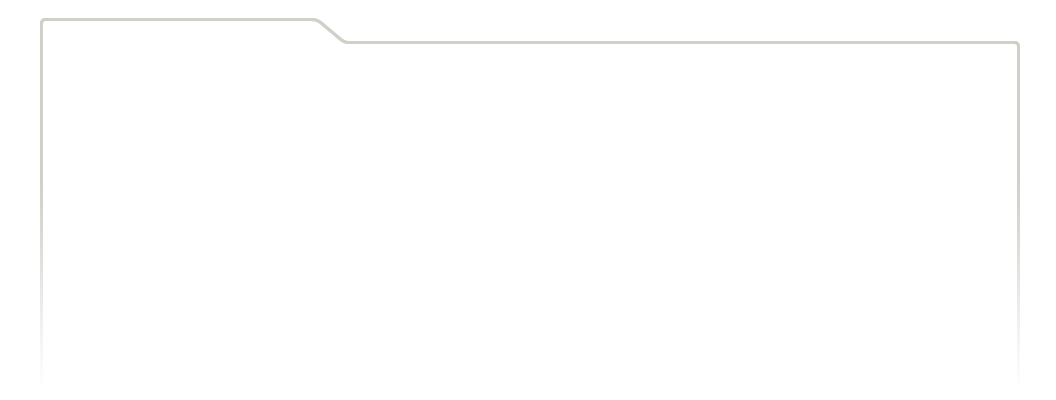
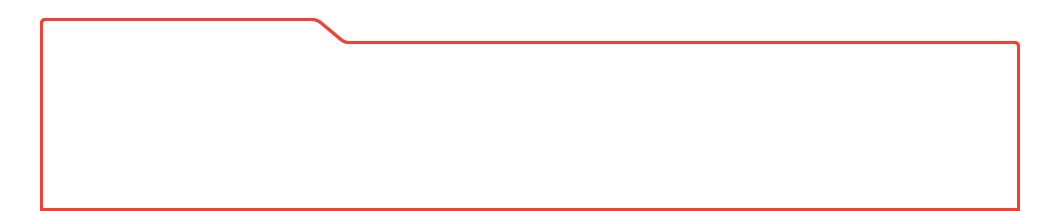
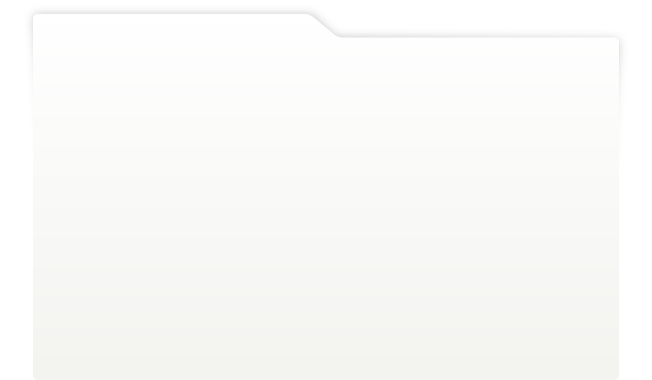
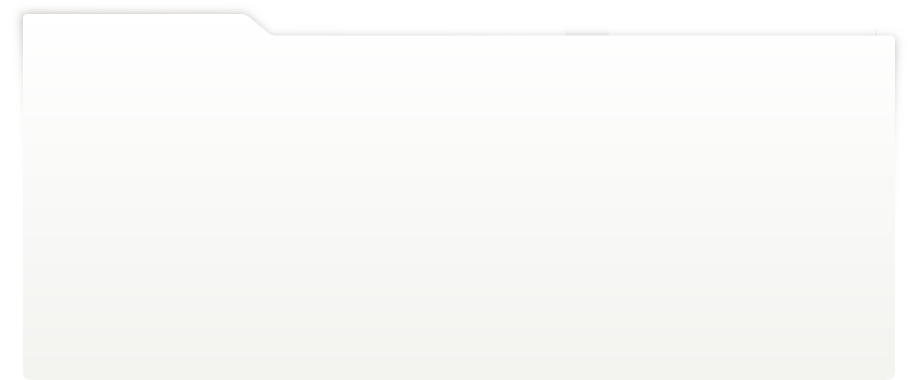
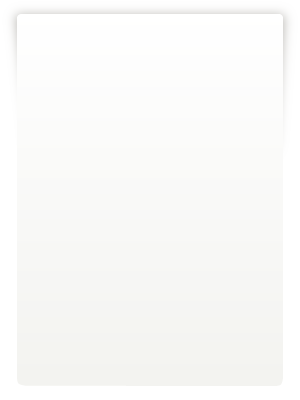
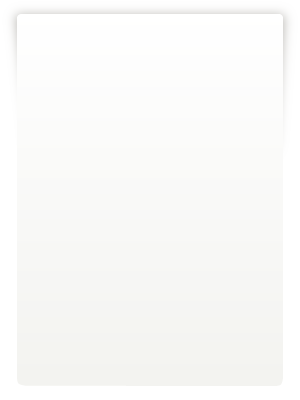
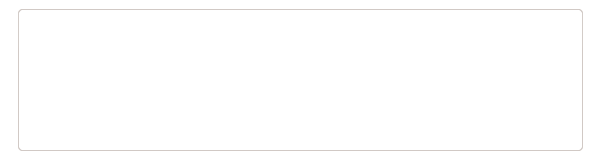
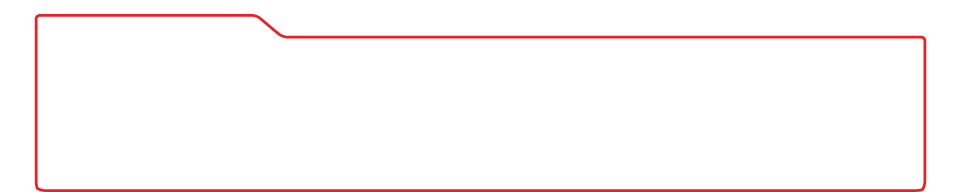
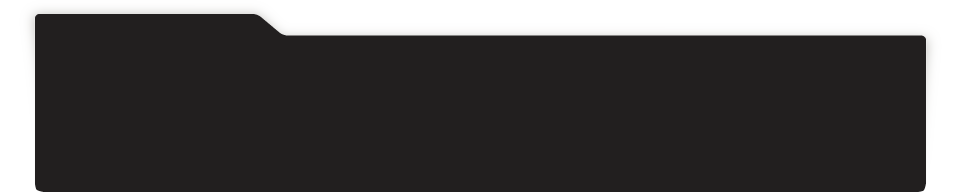
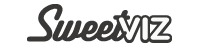
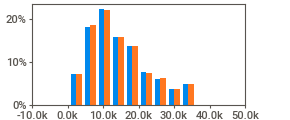
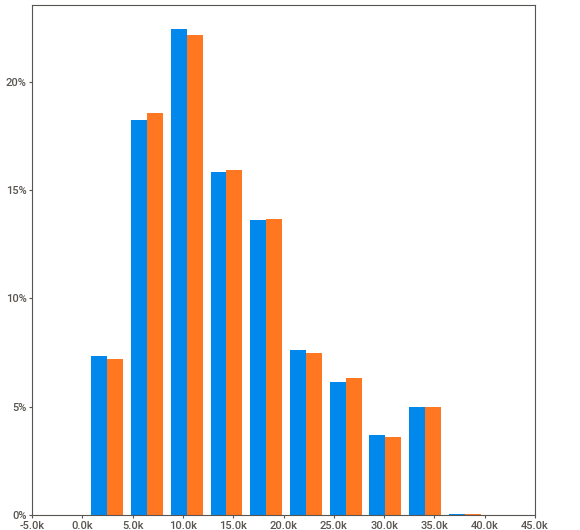
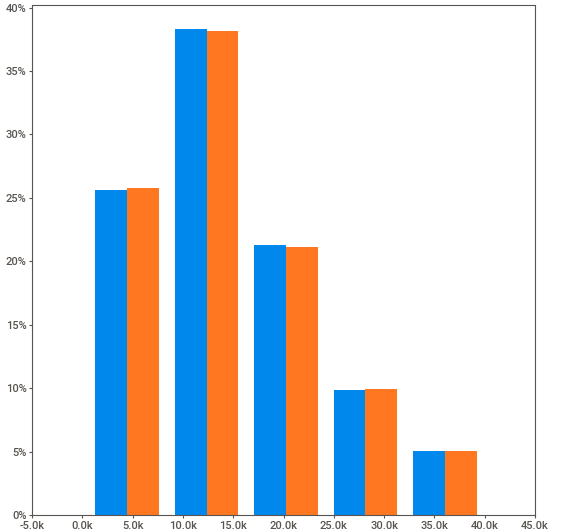
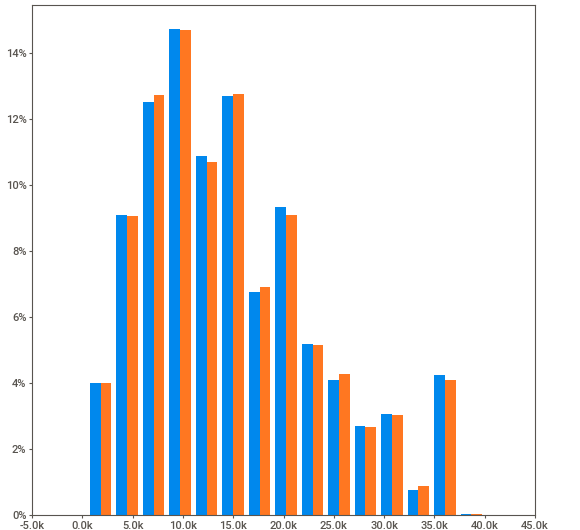
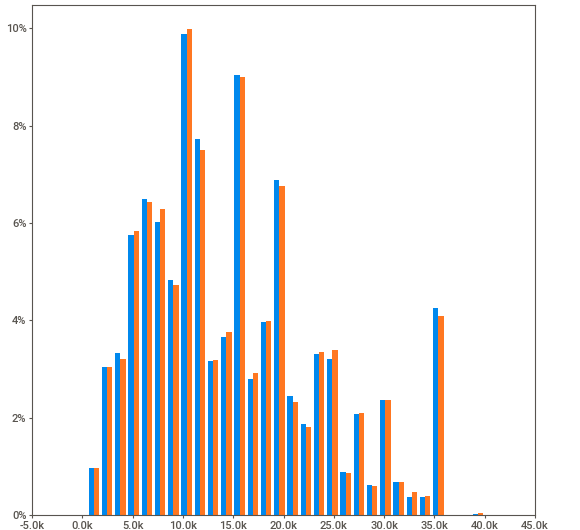
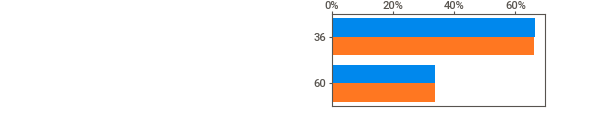
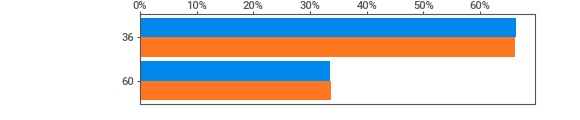
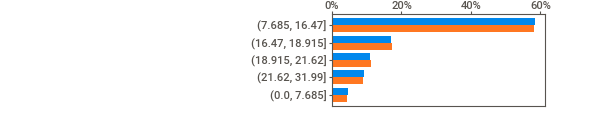
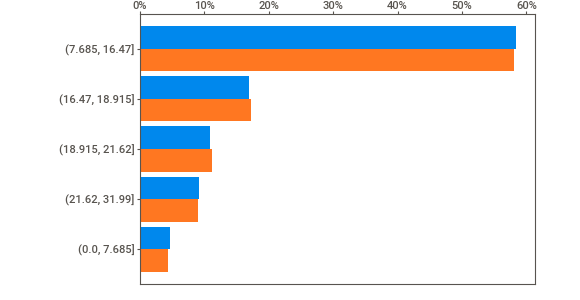
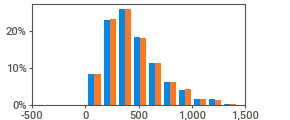
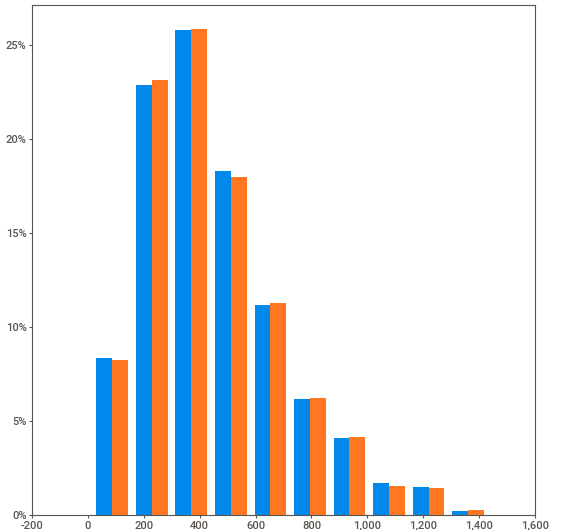
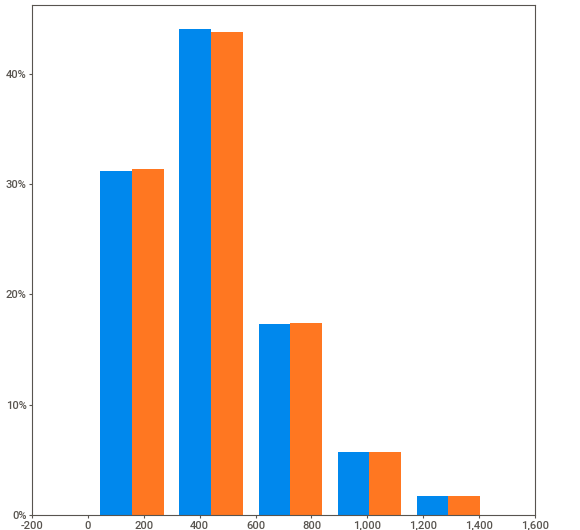
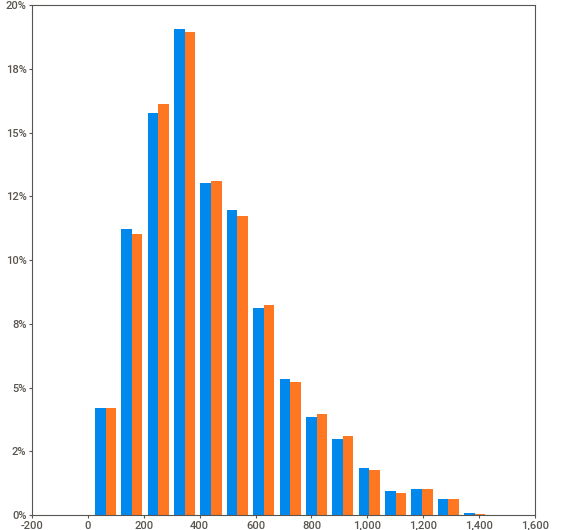
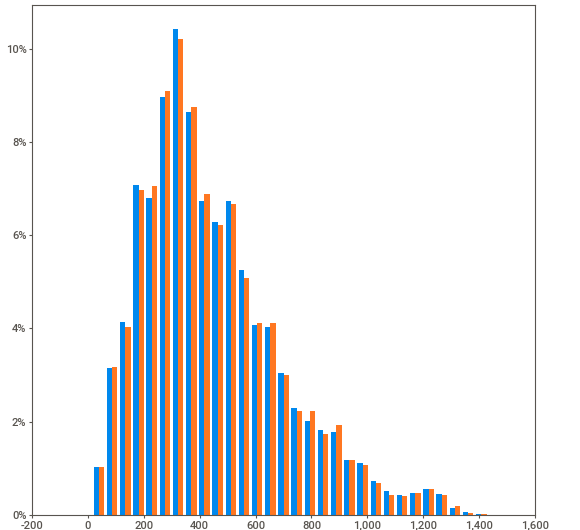
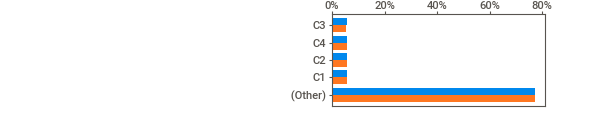
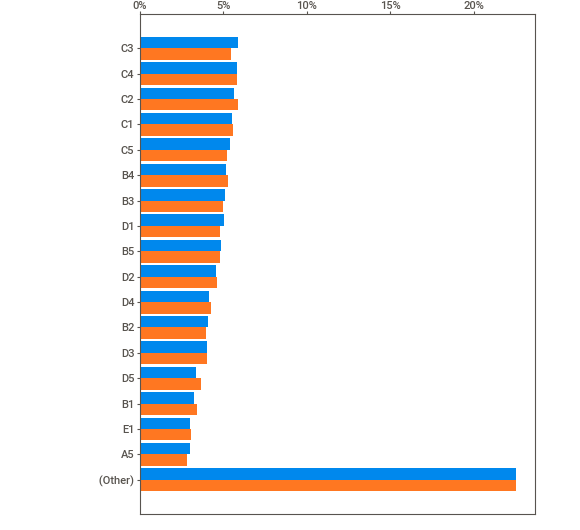
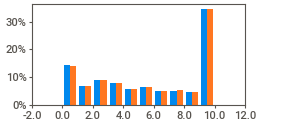
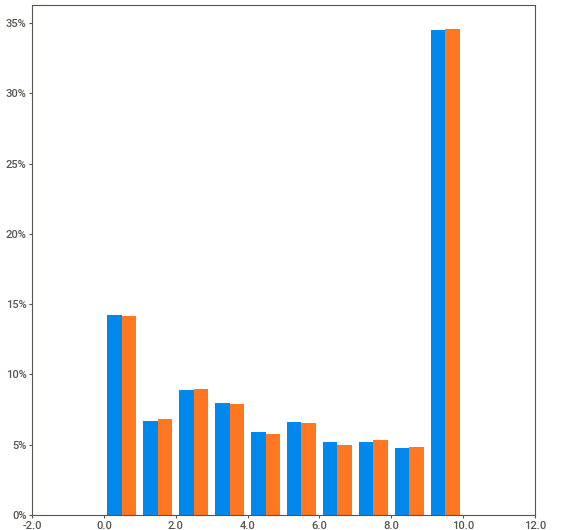
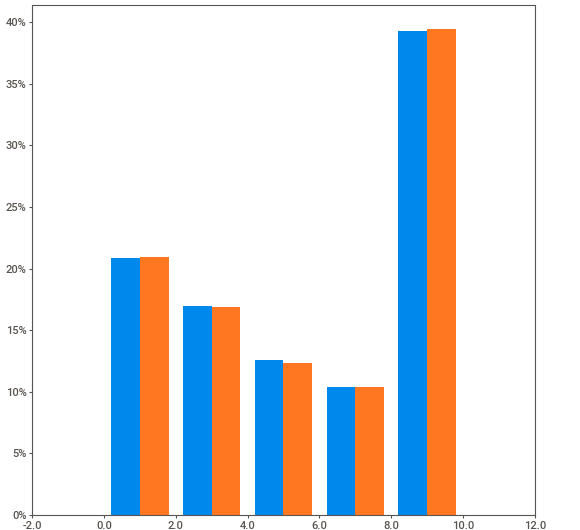
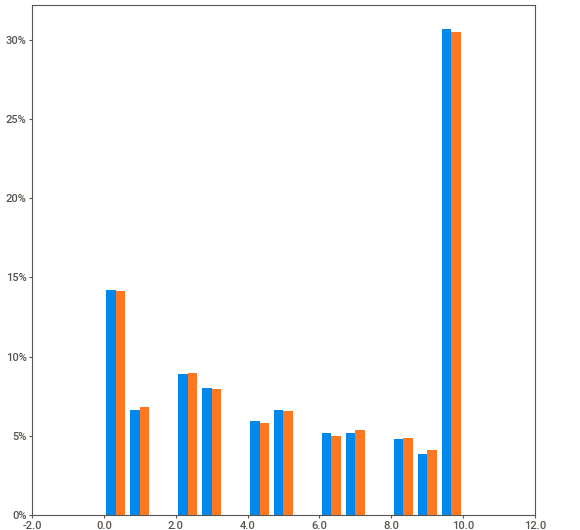
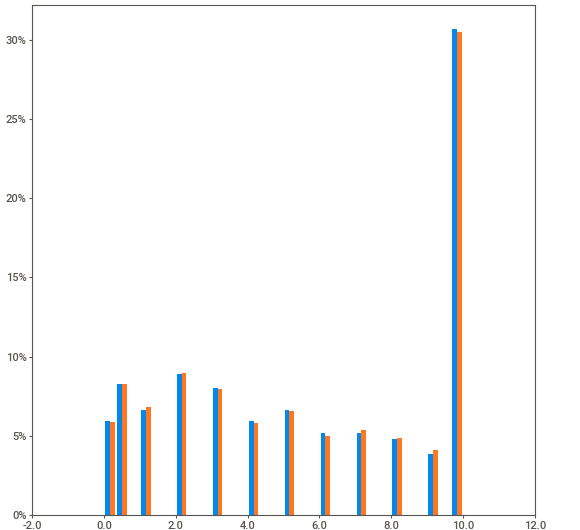
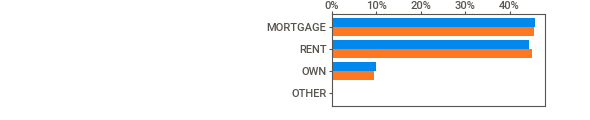
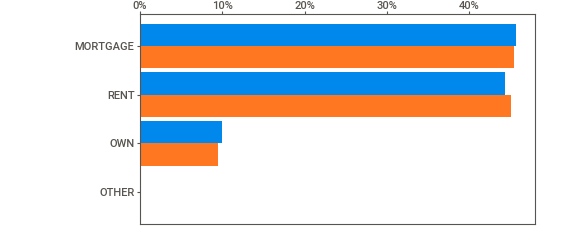
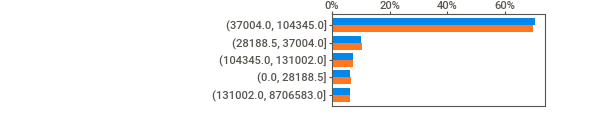
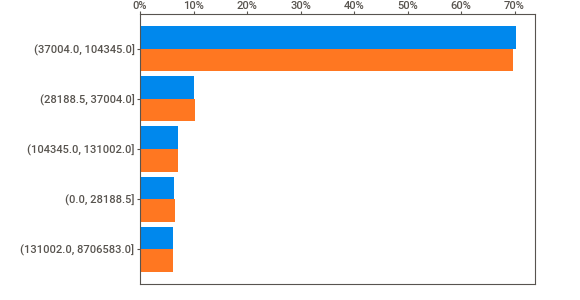
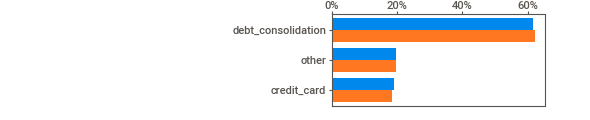
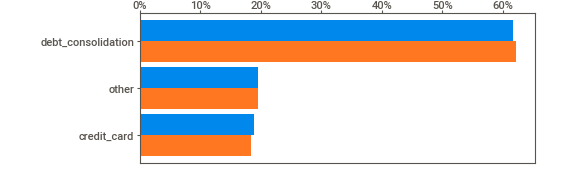
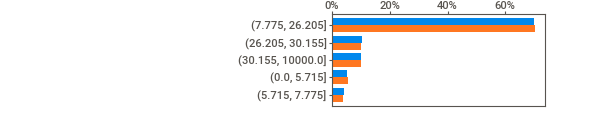
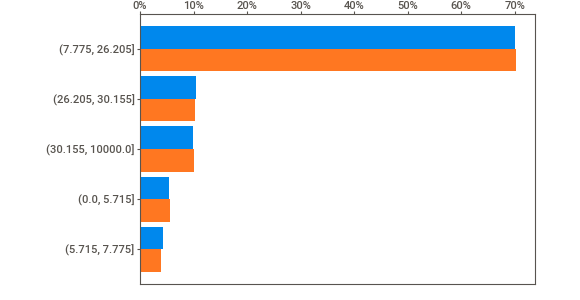
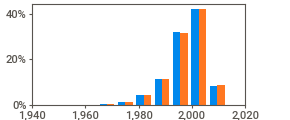
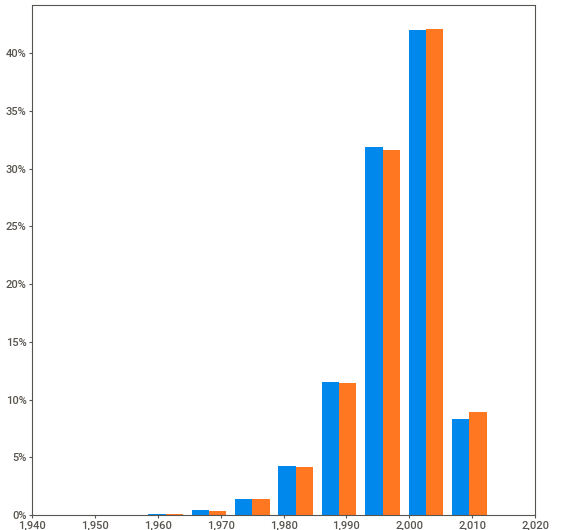
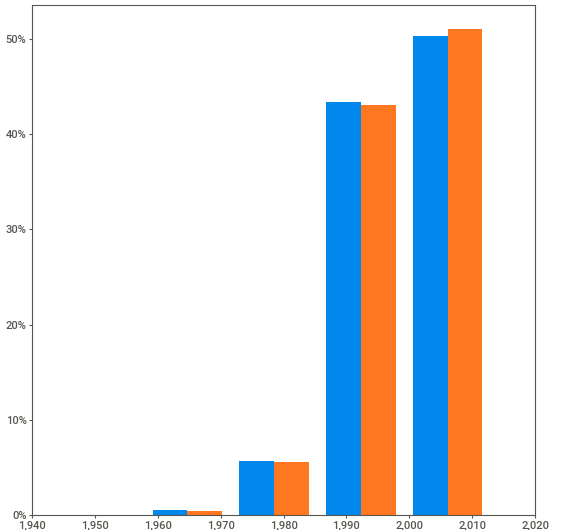
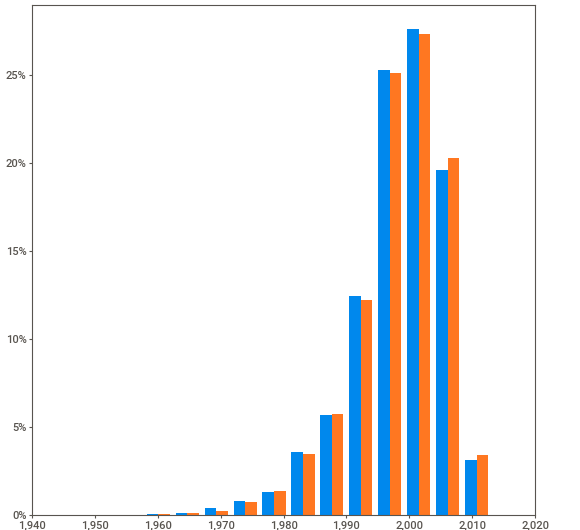
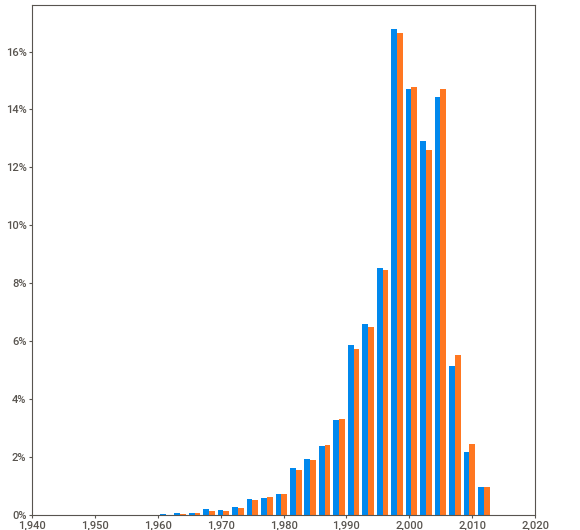
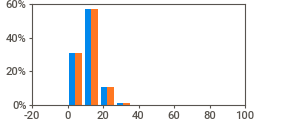
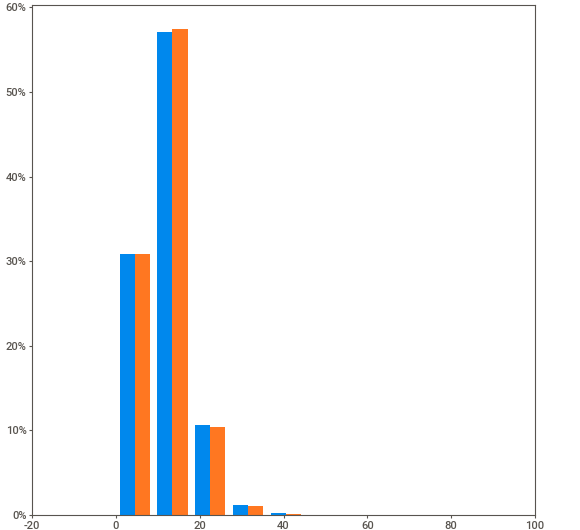
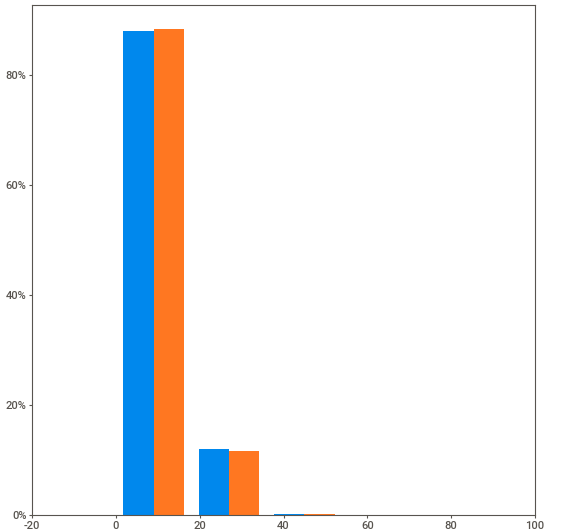
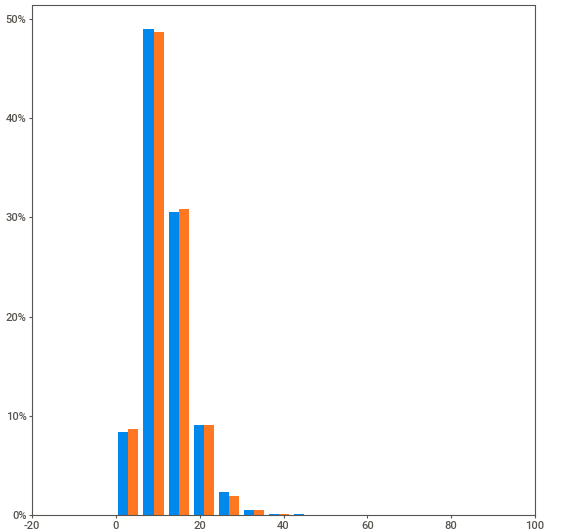
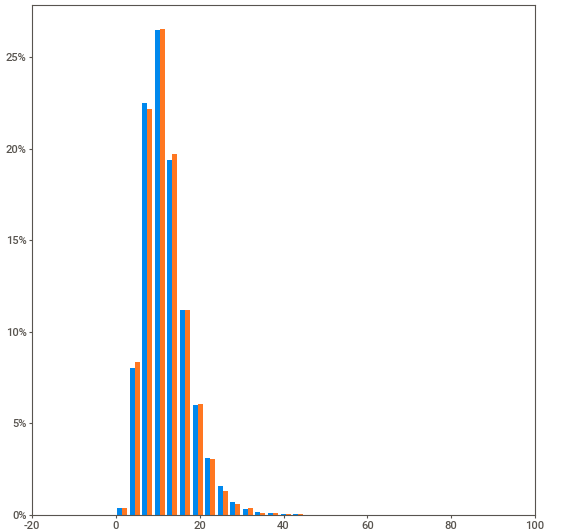
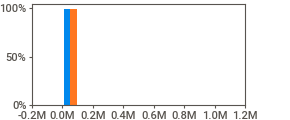
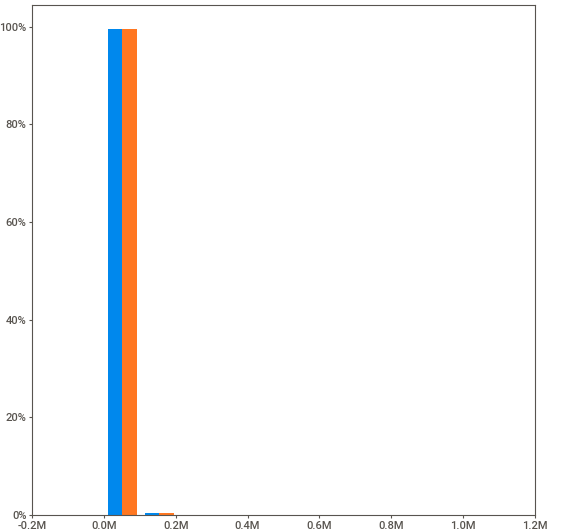
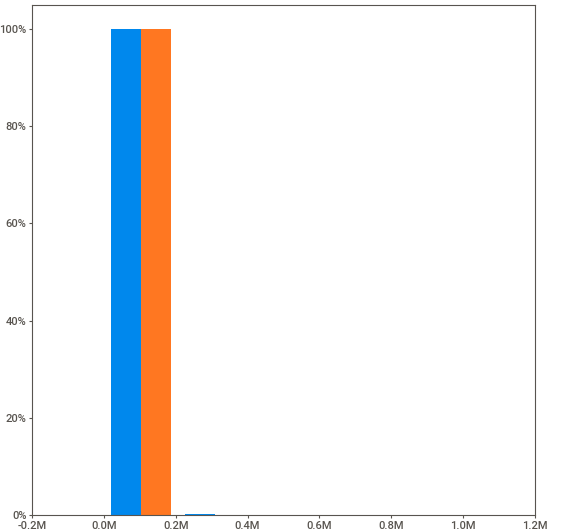
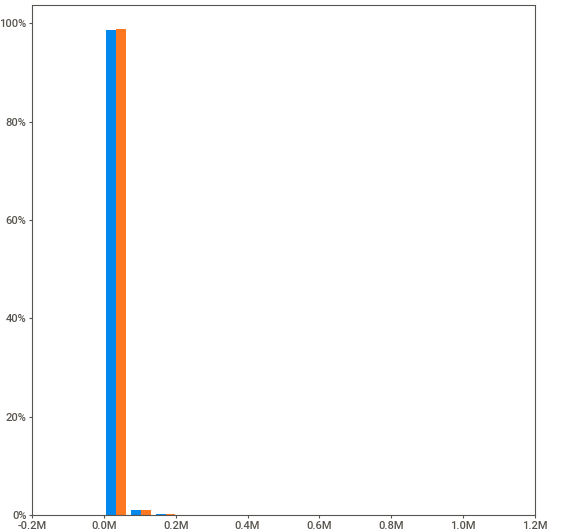
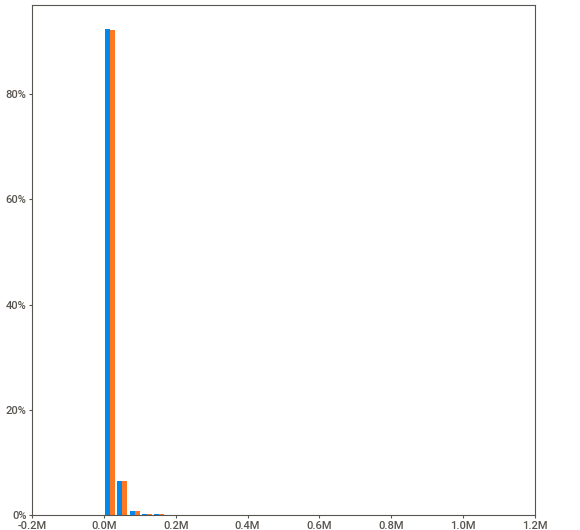
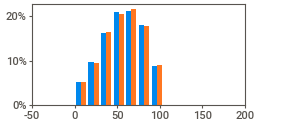
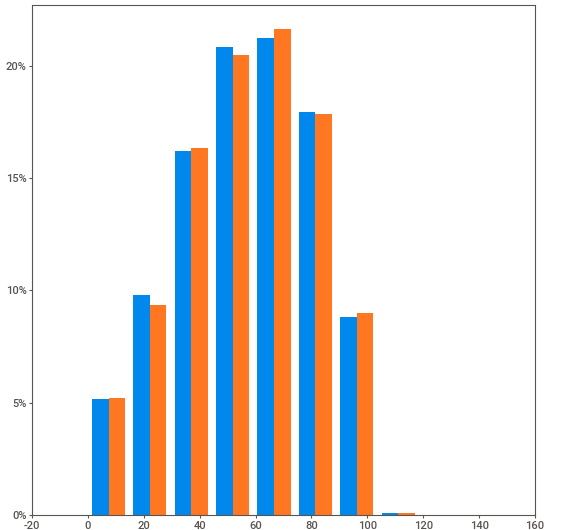
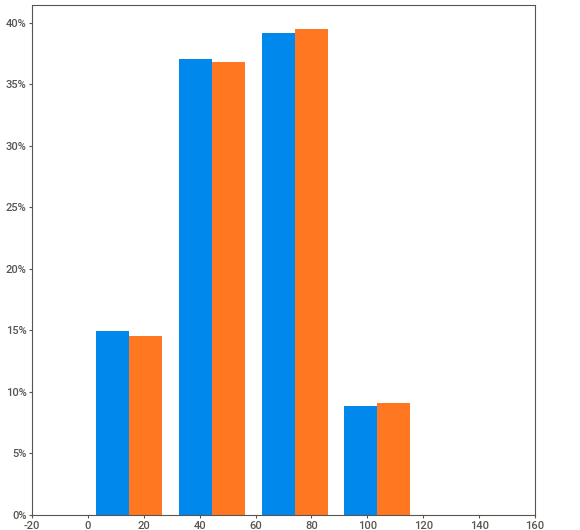
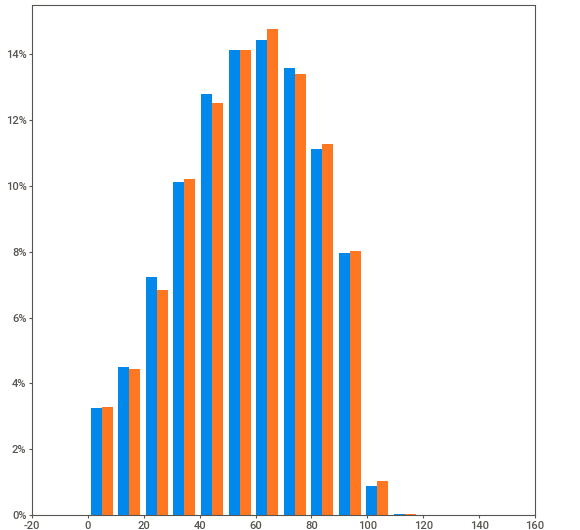
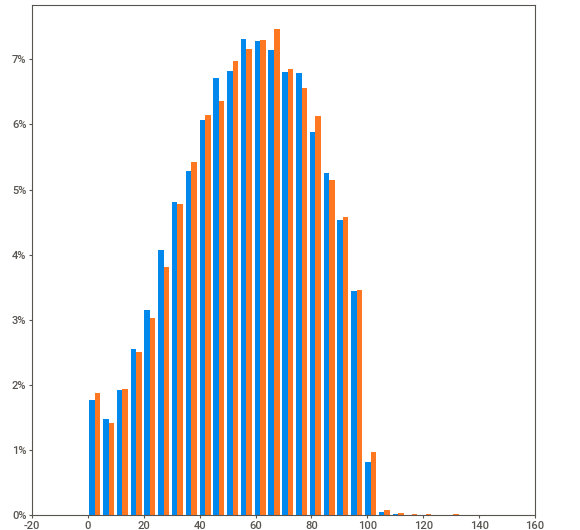
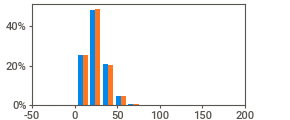
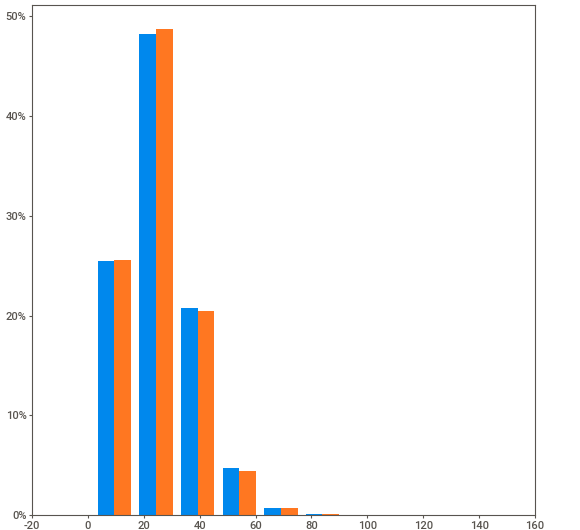
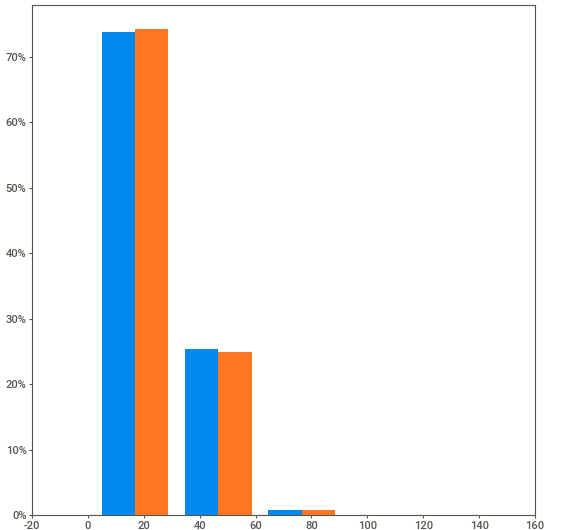
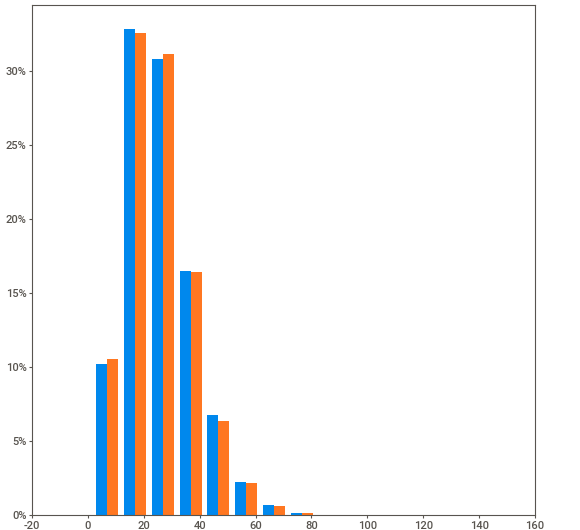
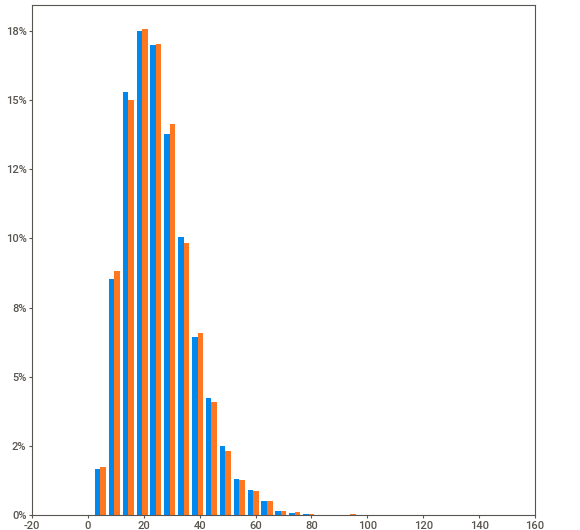
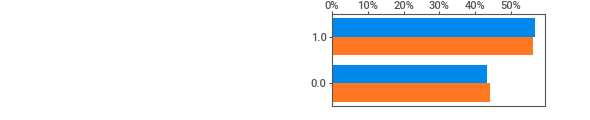
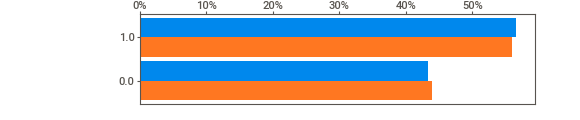
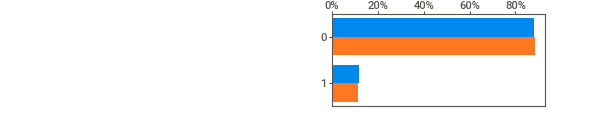
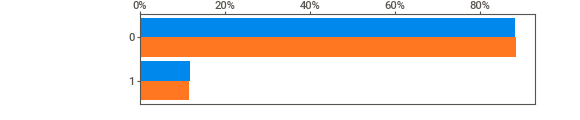
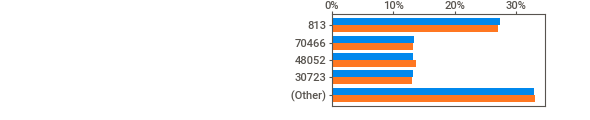
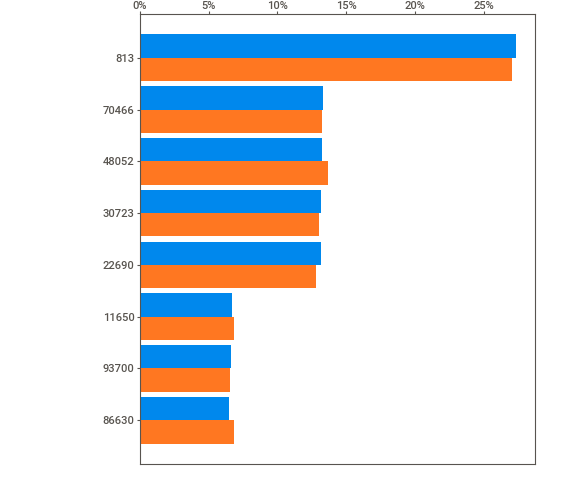
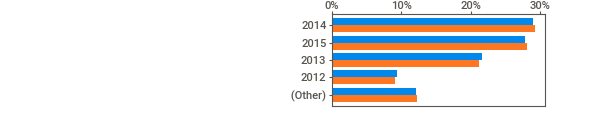
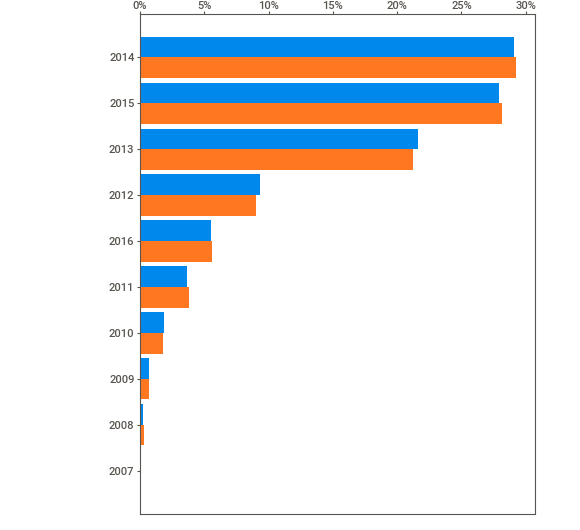
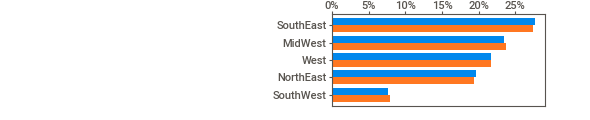
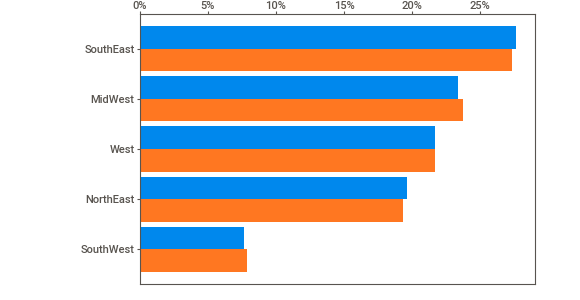
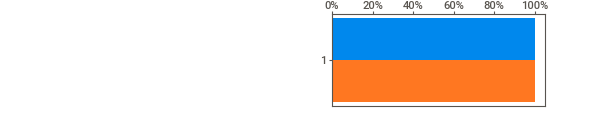
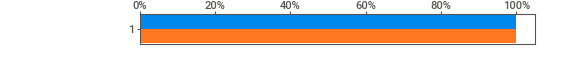
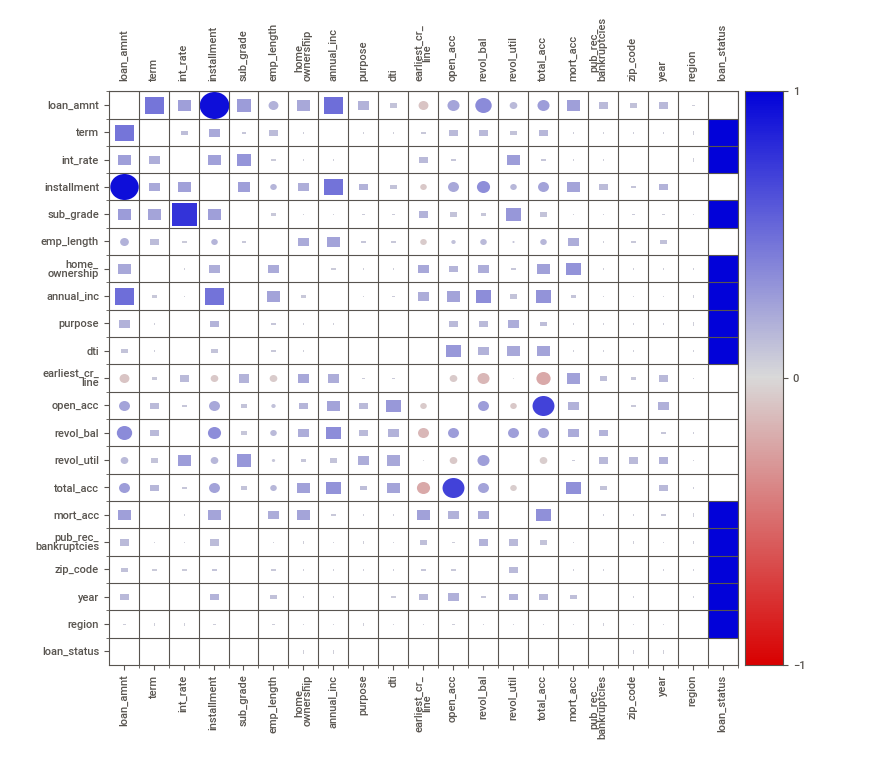
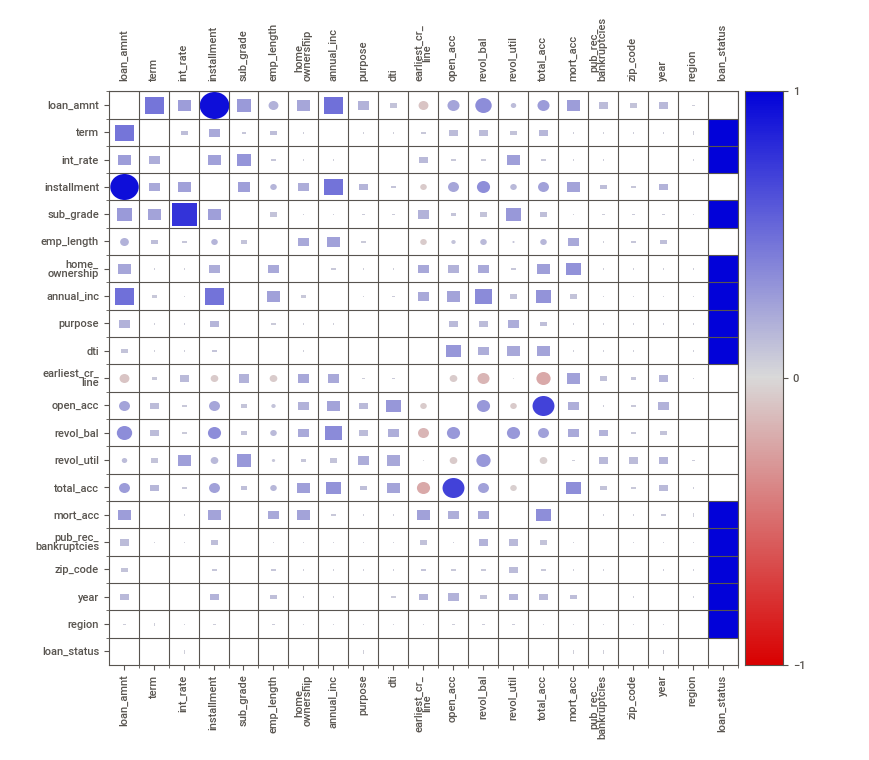

In [19]:
feature_config = sv.FeatureConfig() #,force_text=[""]
my_report = sv.compare([train[train['loan_status']==1], "Train"], [test[test['loan_status']==1], "Test"], feat_cfg=feature_config)
my_report.show_notebook( 
            layout='widescreen', 
            scale=None)

## Real Data & Synthetic Data Comparison (charged off only)

In [11]:
real_data = test[test['loan_status']==1]

                                             |          | [  0%]   00:00 -> (? left)


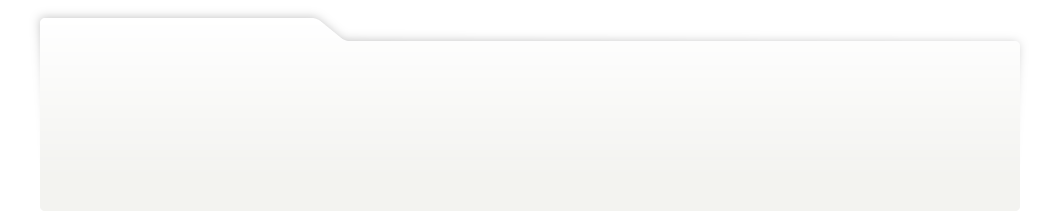
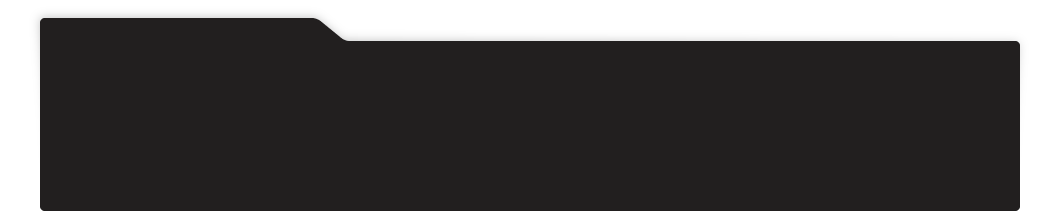
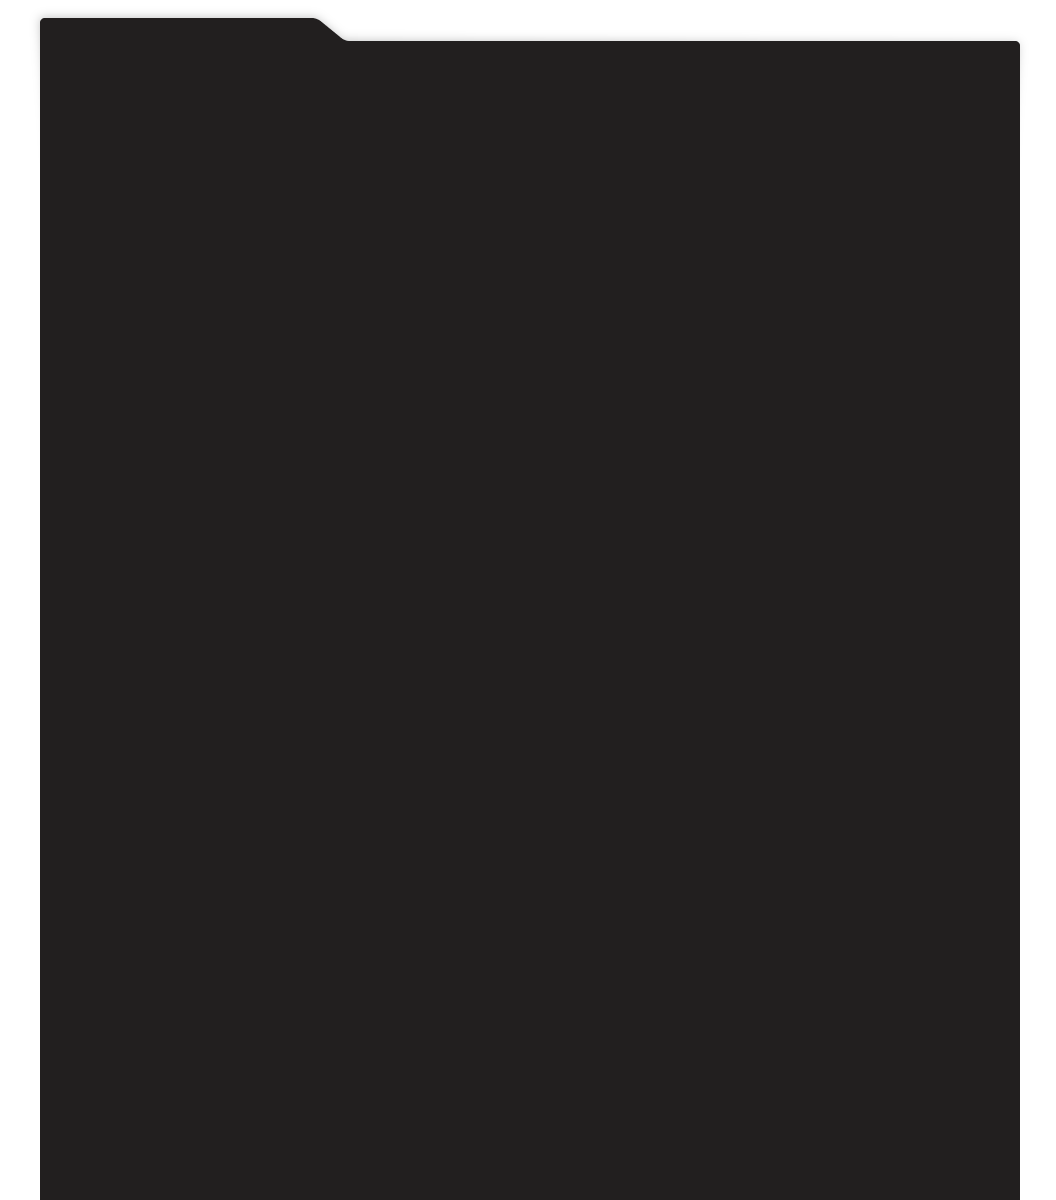
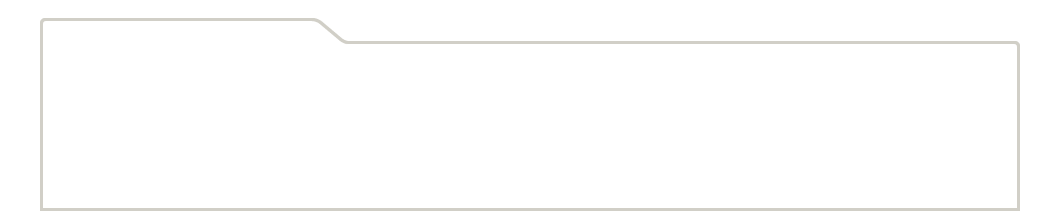
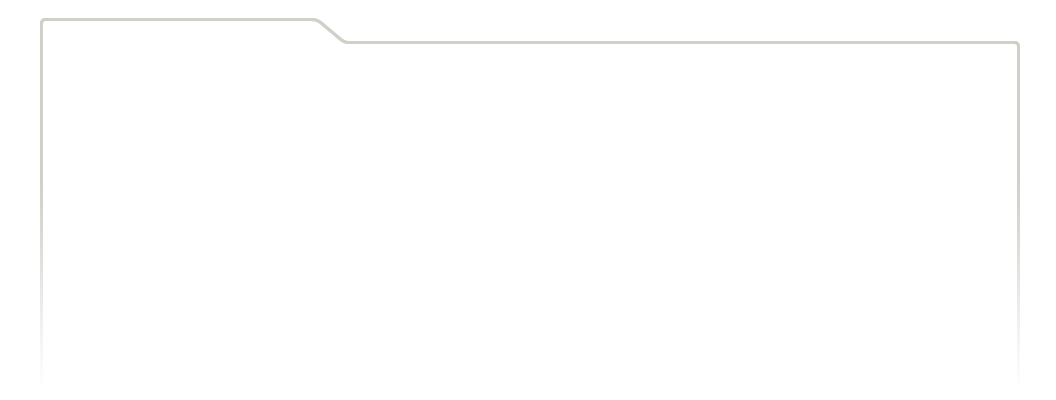
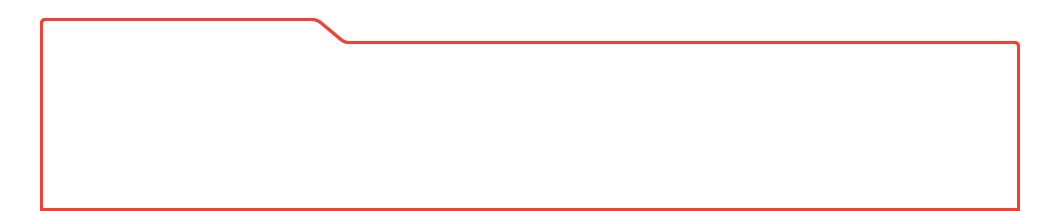
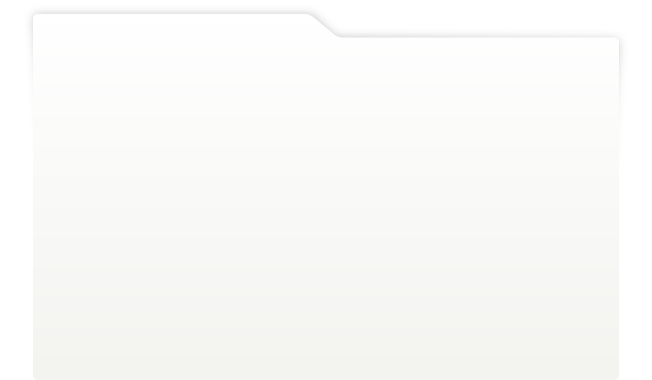
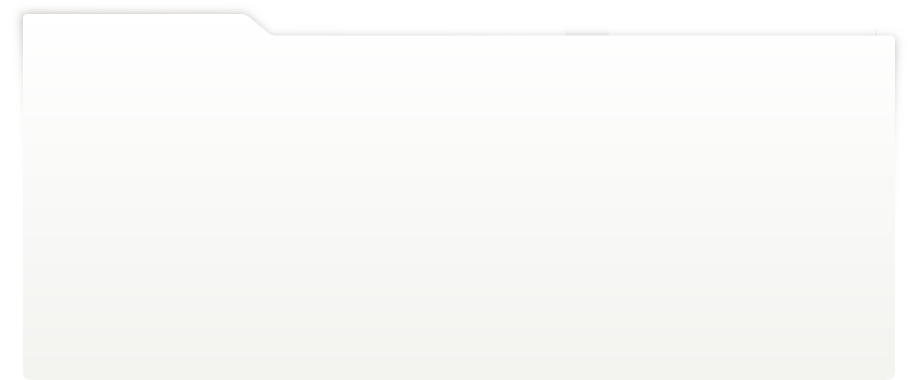
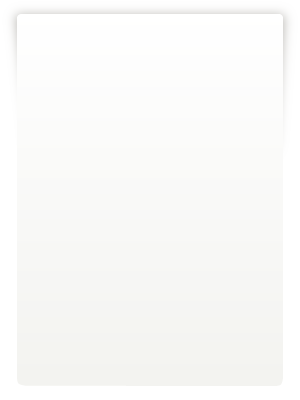
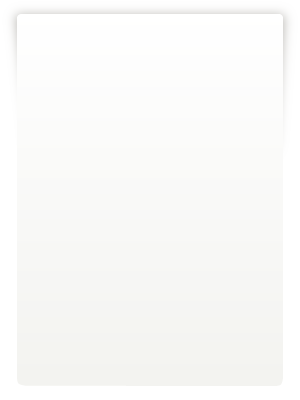
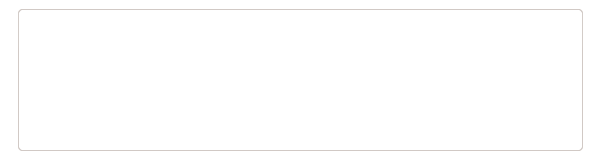
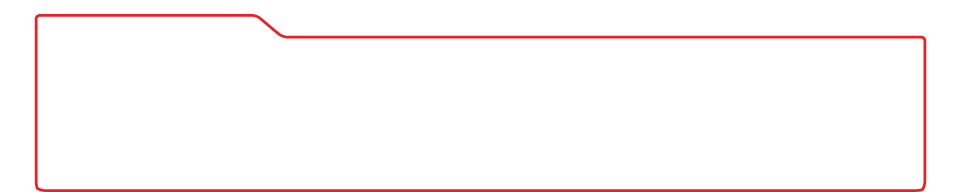
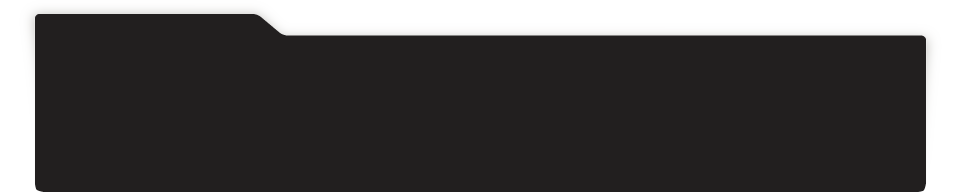
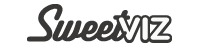
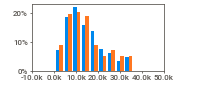
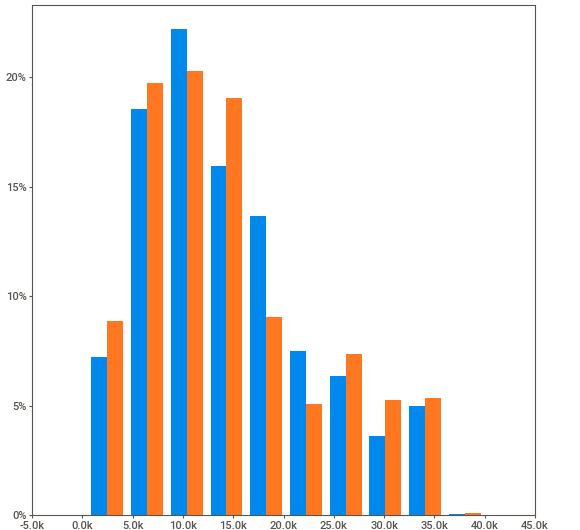
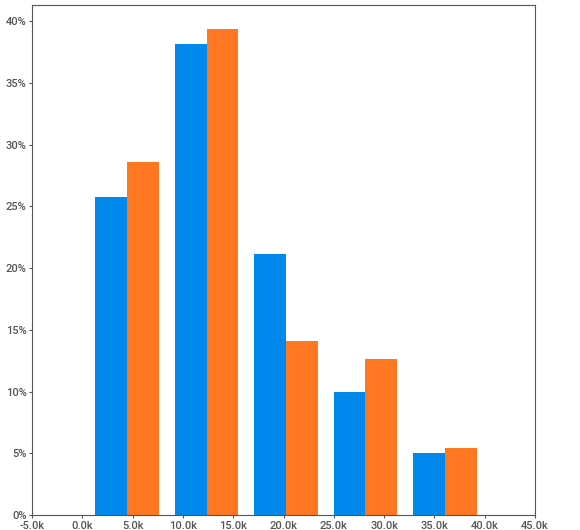
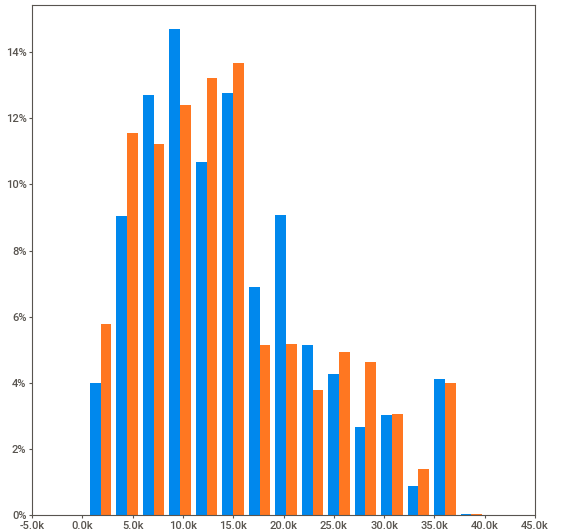
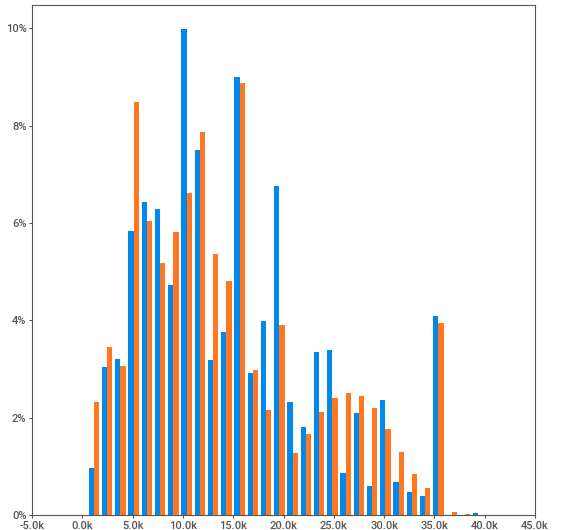
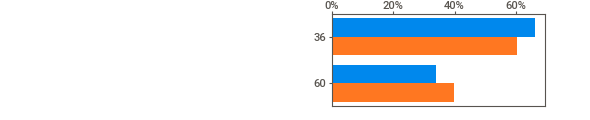
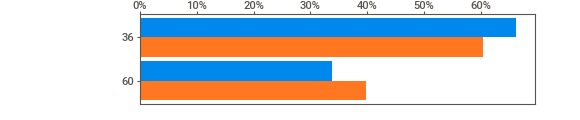
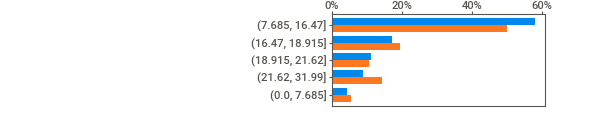
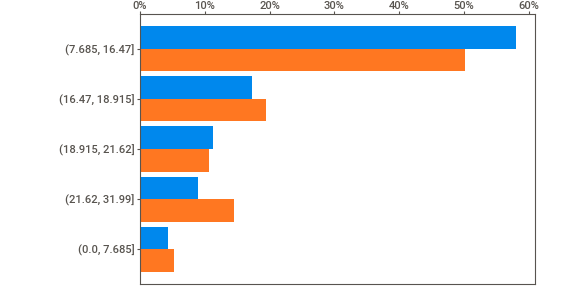
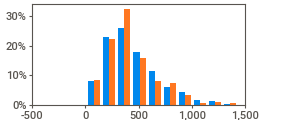
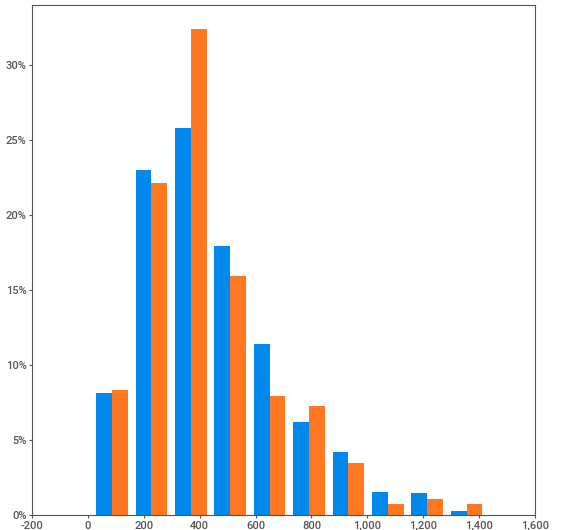
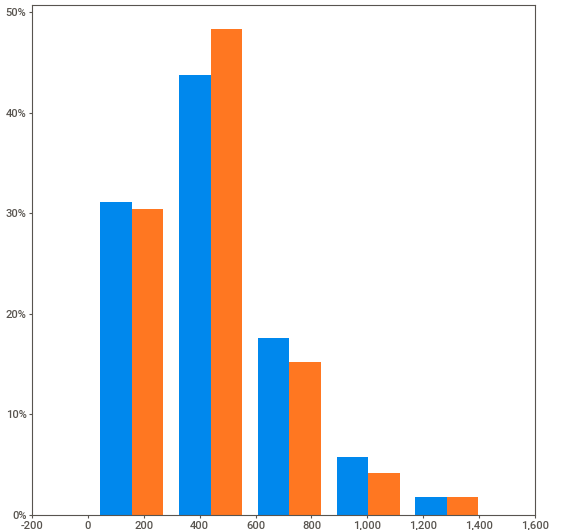
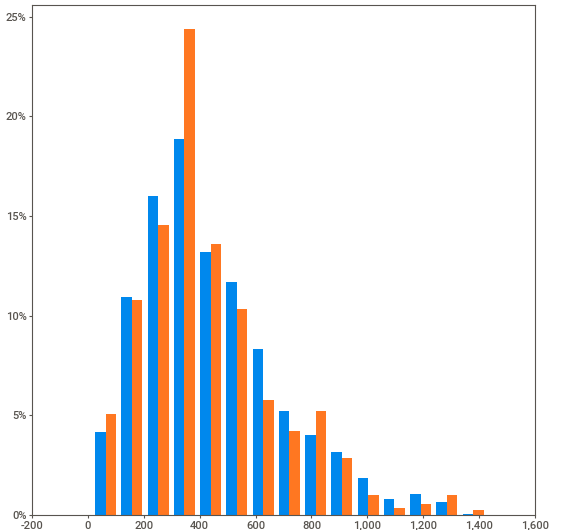
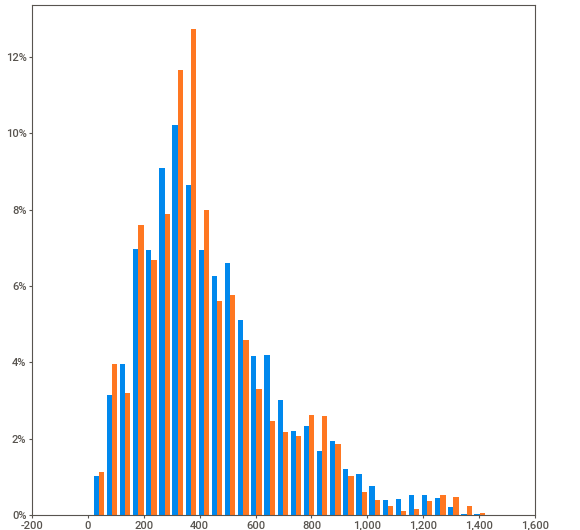
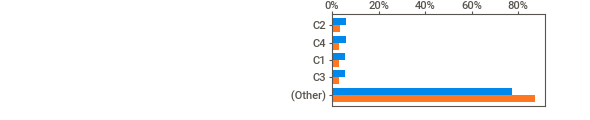
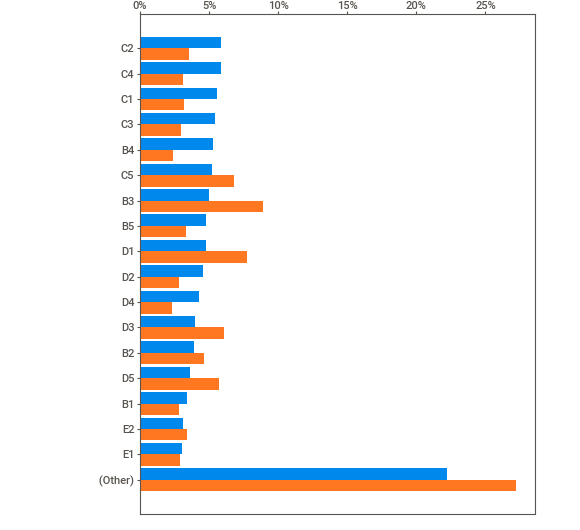
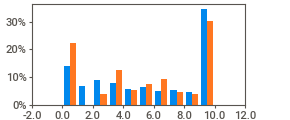
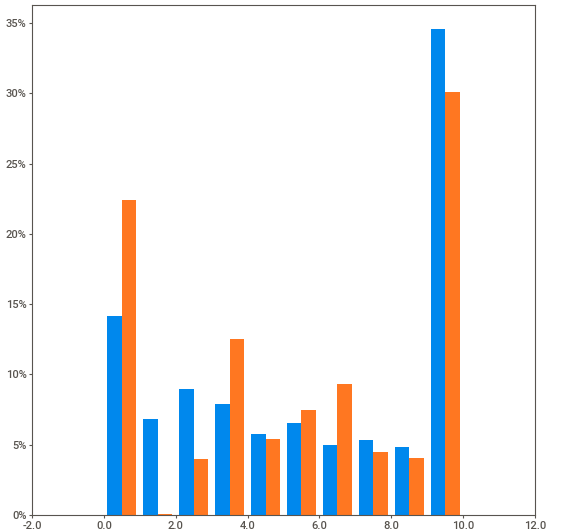
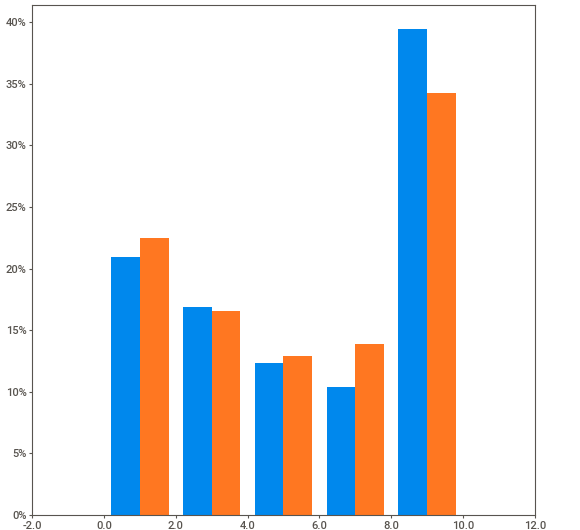
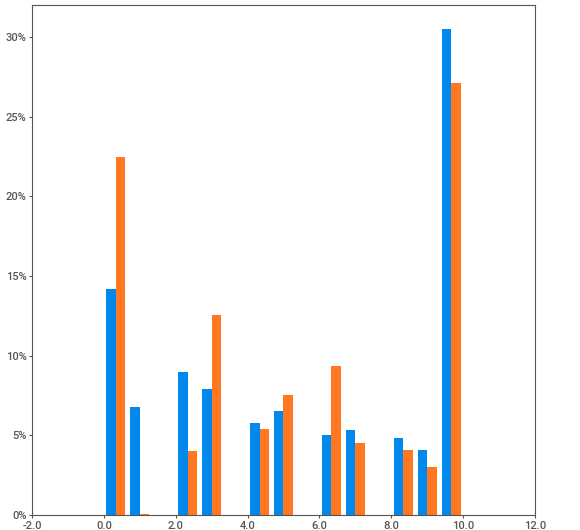
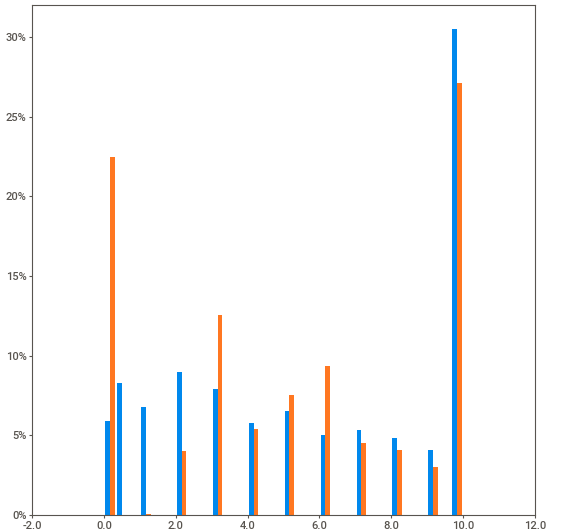
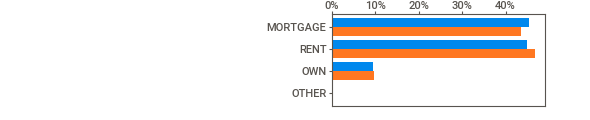
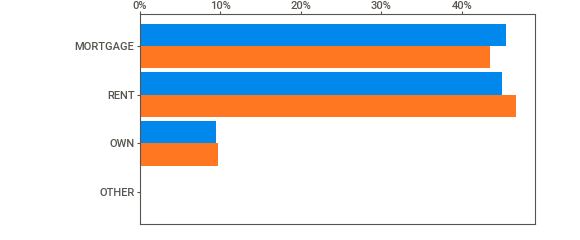
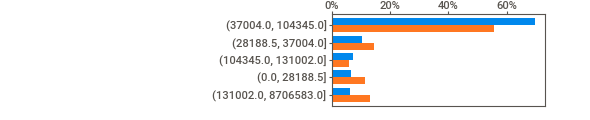
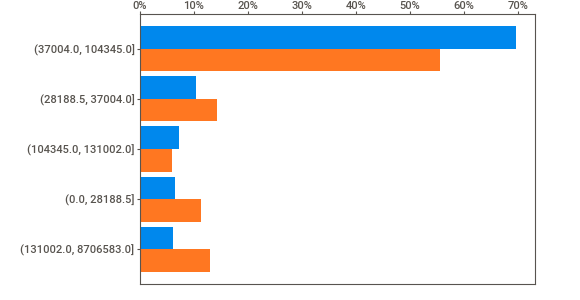
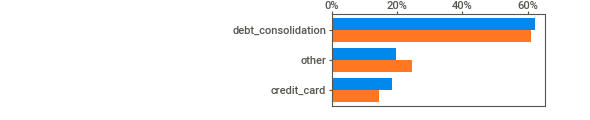
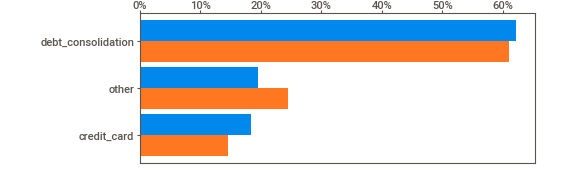
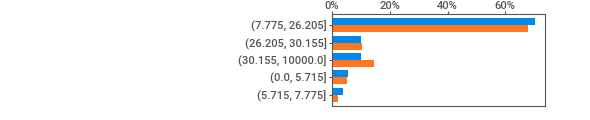
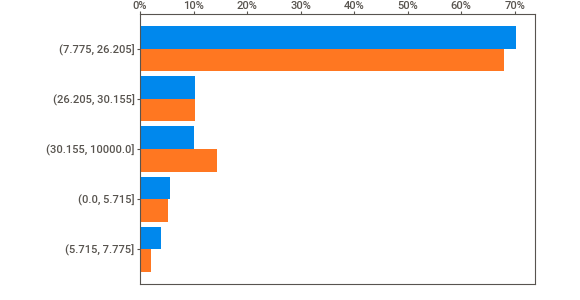
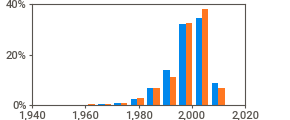
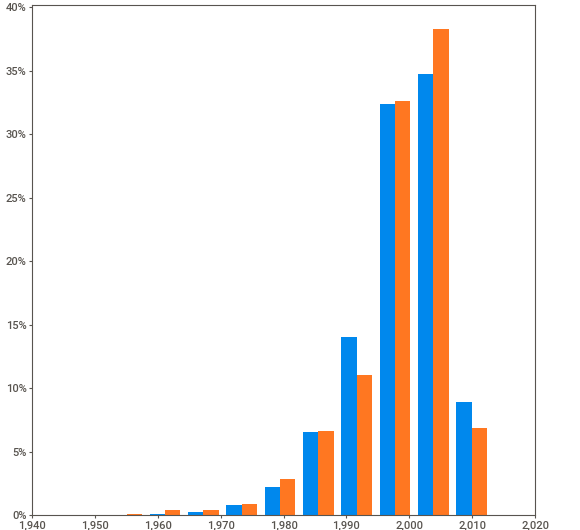
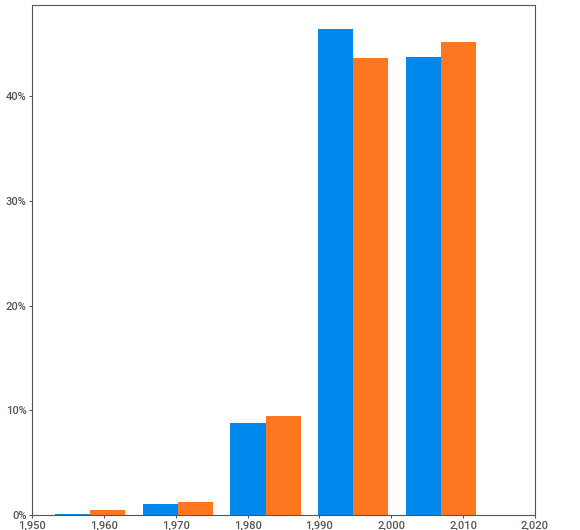
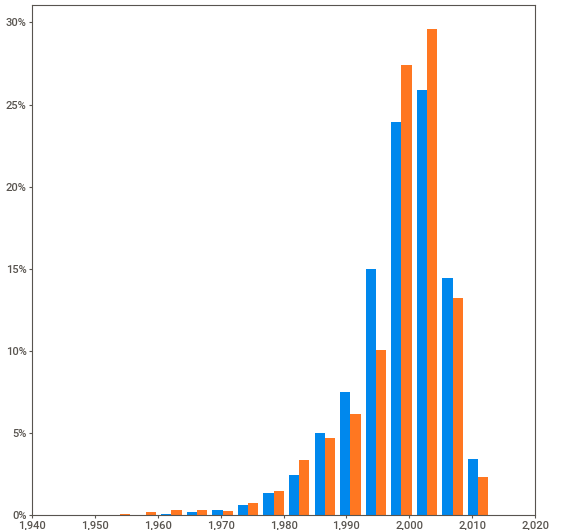
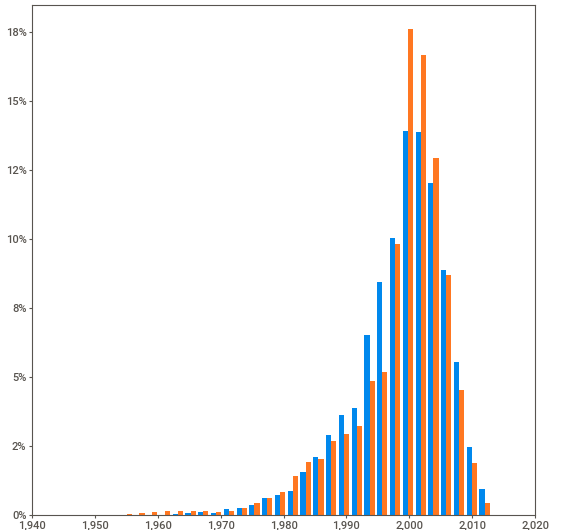
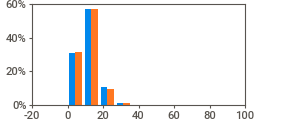
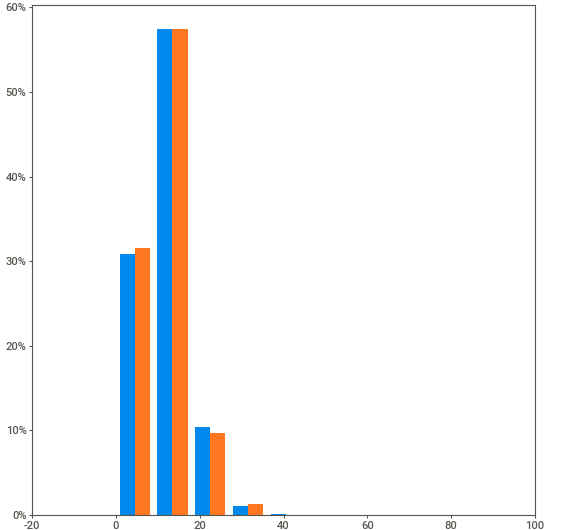
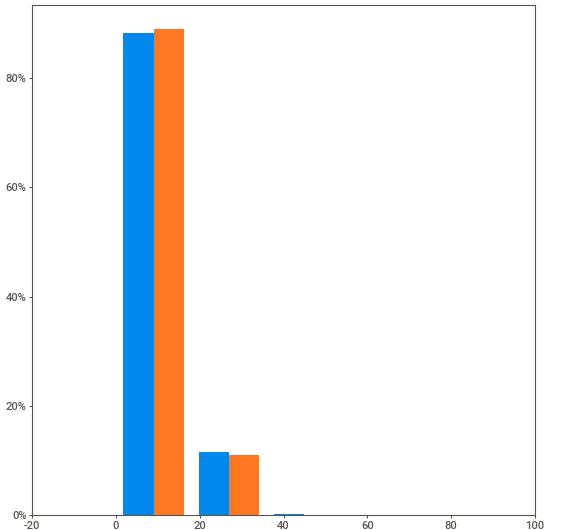
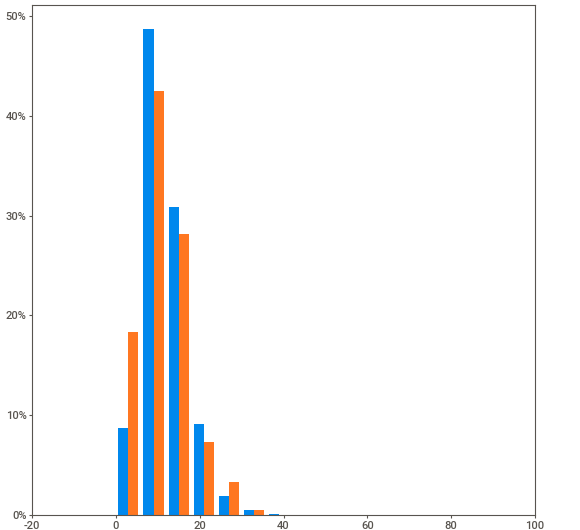
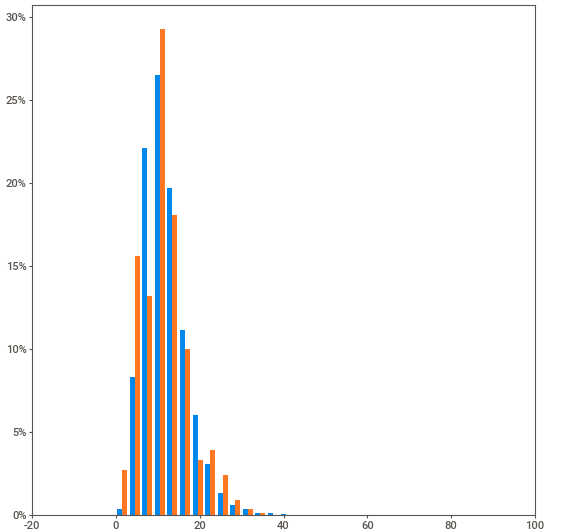
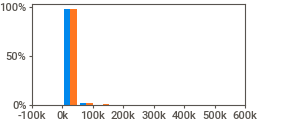
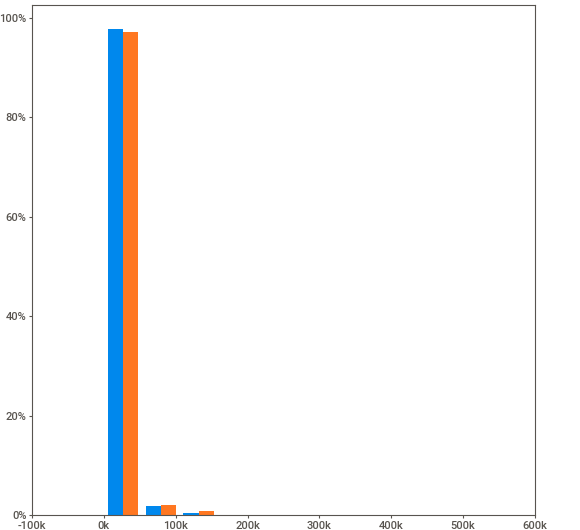
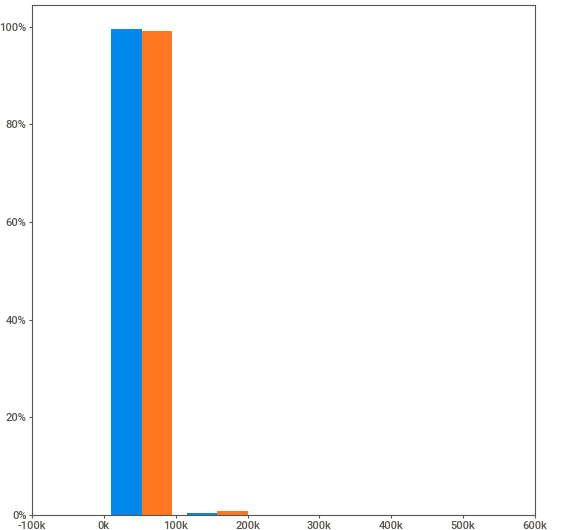
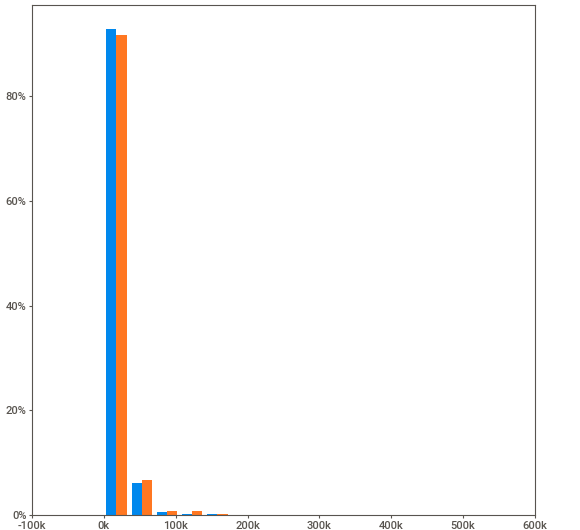
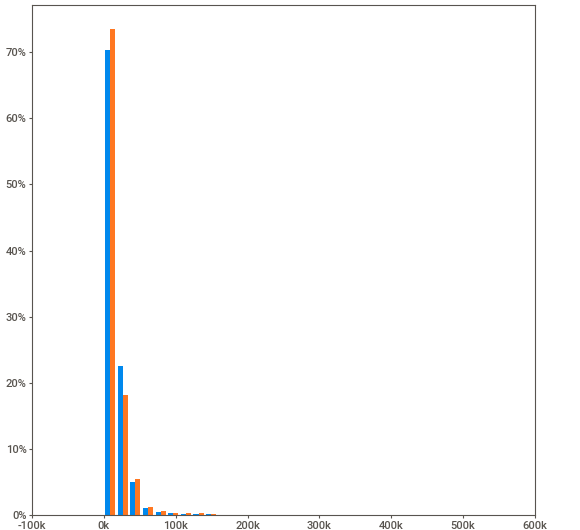
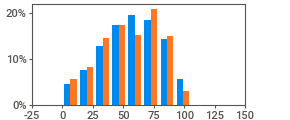
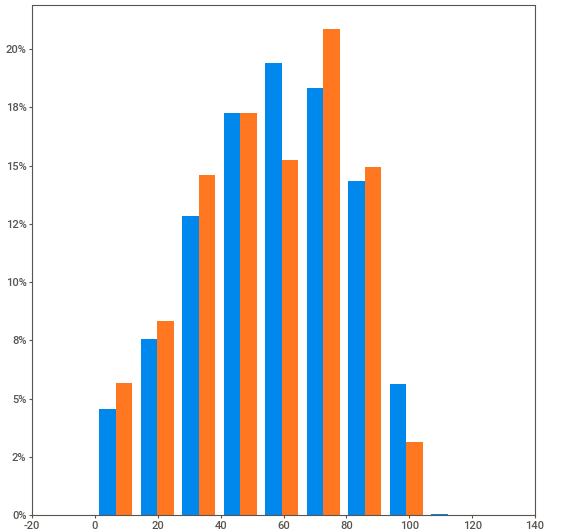
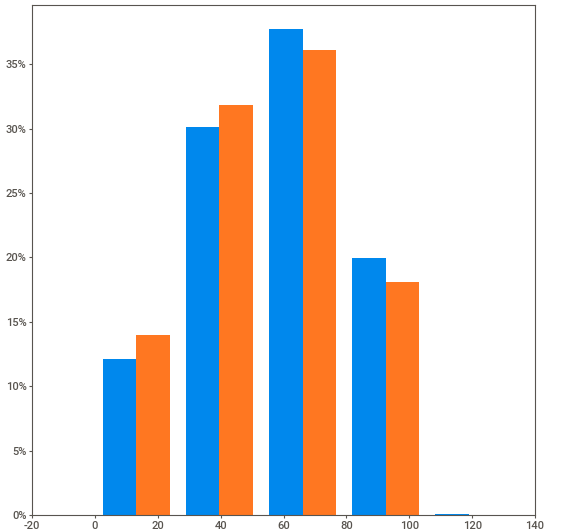
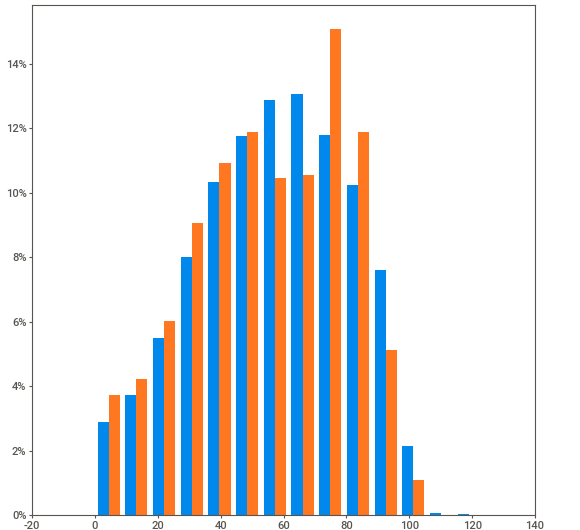
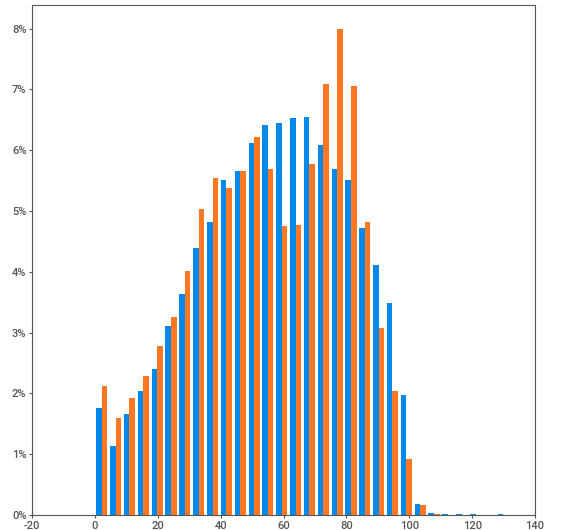
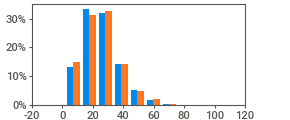
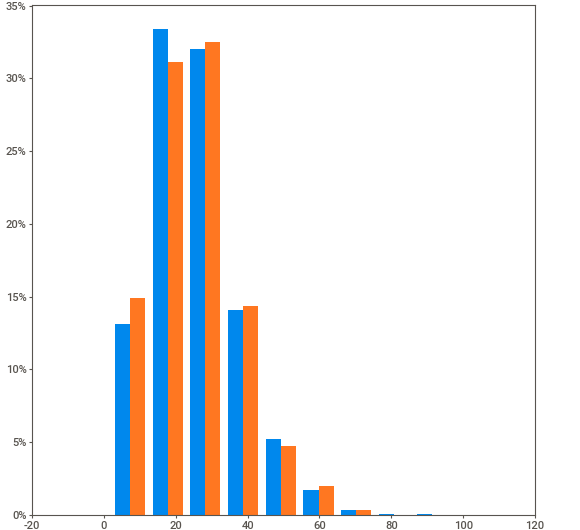
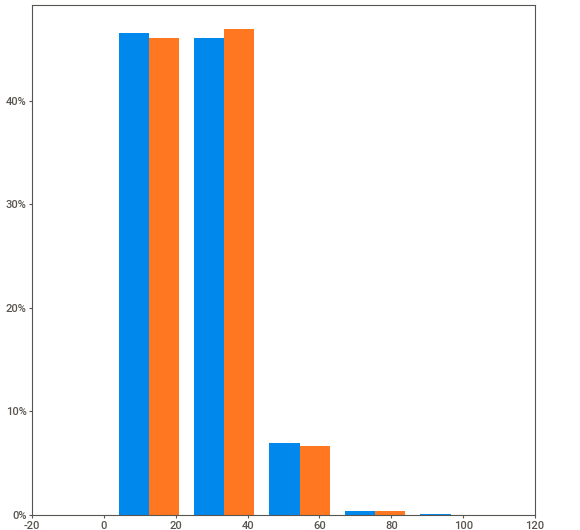
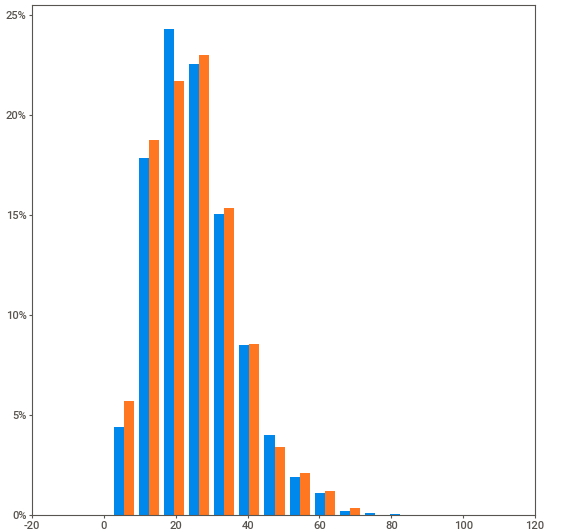
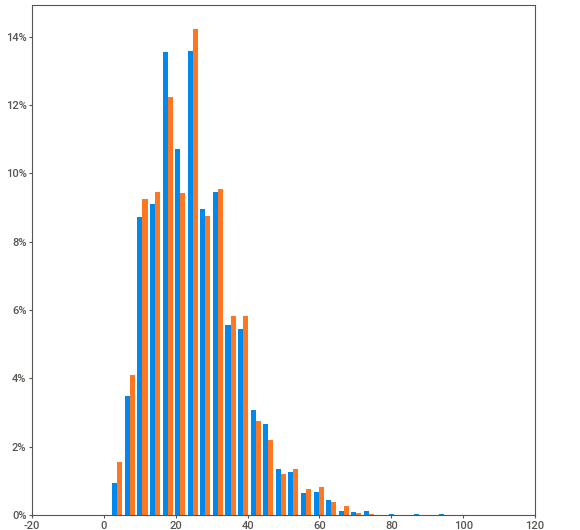
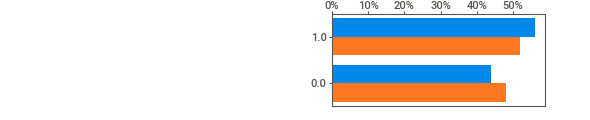
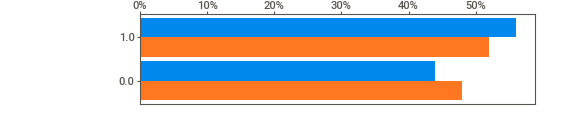
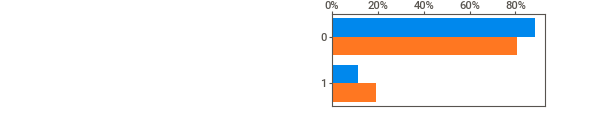
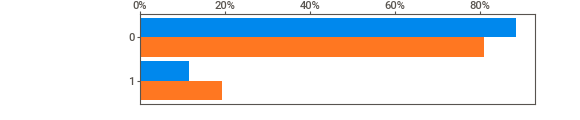
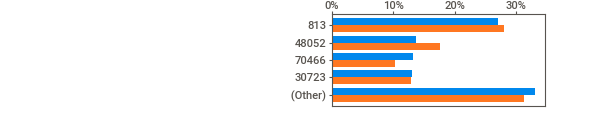
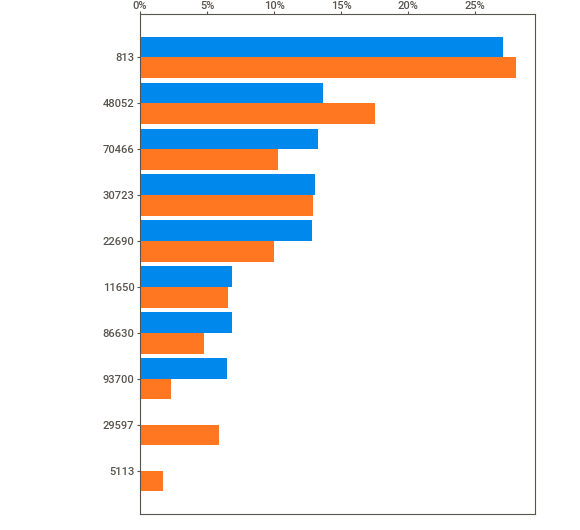
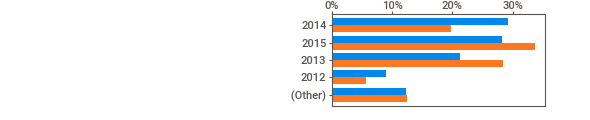
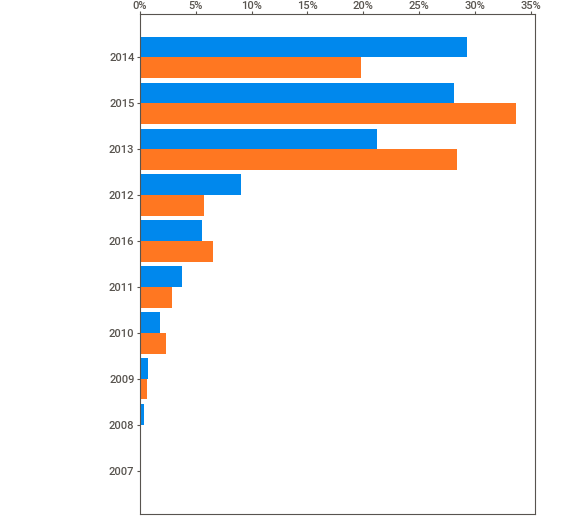
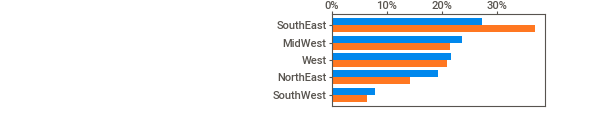
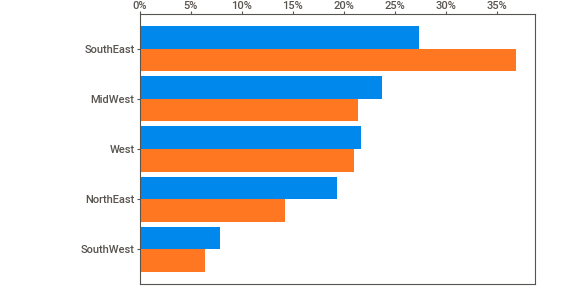
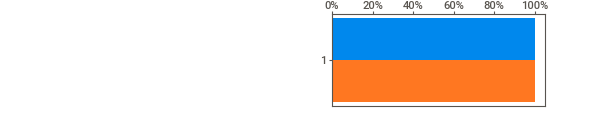
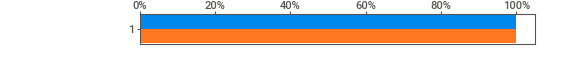
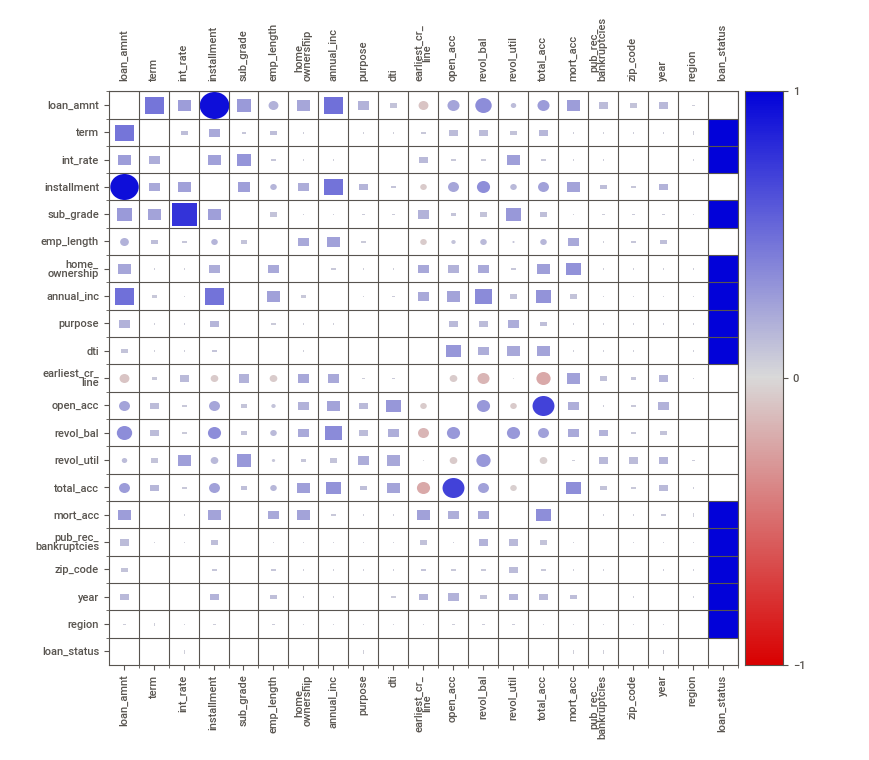
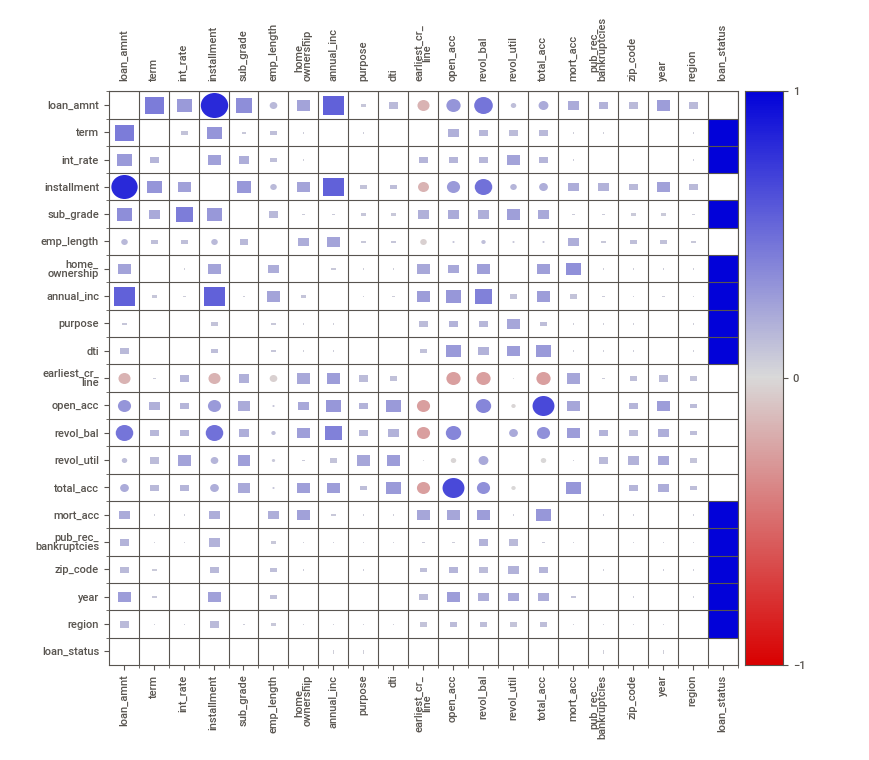

In [12]:
feature_config = sv.FeatureConfig() #,force_text=[""]
my_report = sv.compare([real_data, "Real Data"], [synthetic_data, "Synthetic Data"], feat_cfg=feature_config)
my_report.show_notebook( 
            layout='widescreen', 
            scale=None)

In [13]:
table_evaluator = TableEvaluator(real_data, synthetic_data)

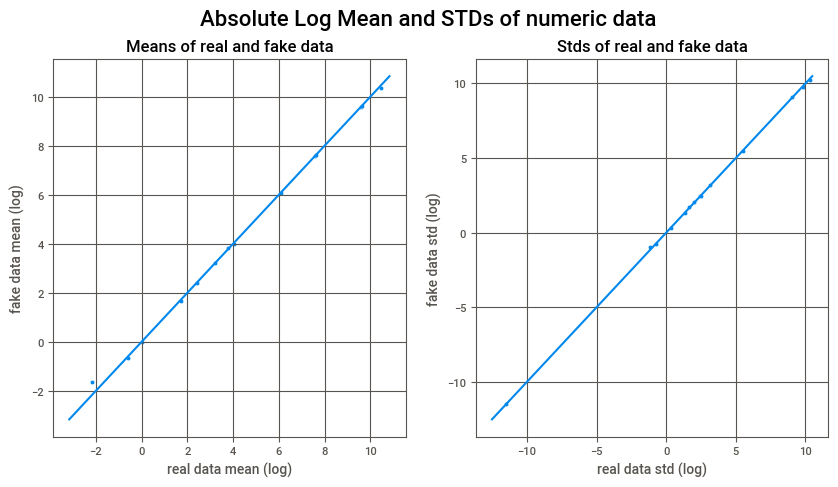

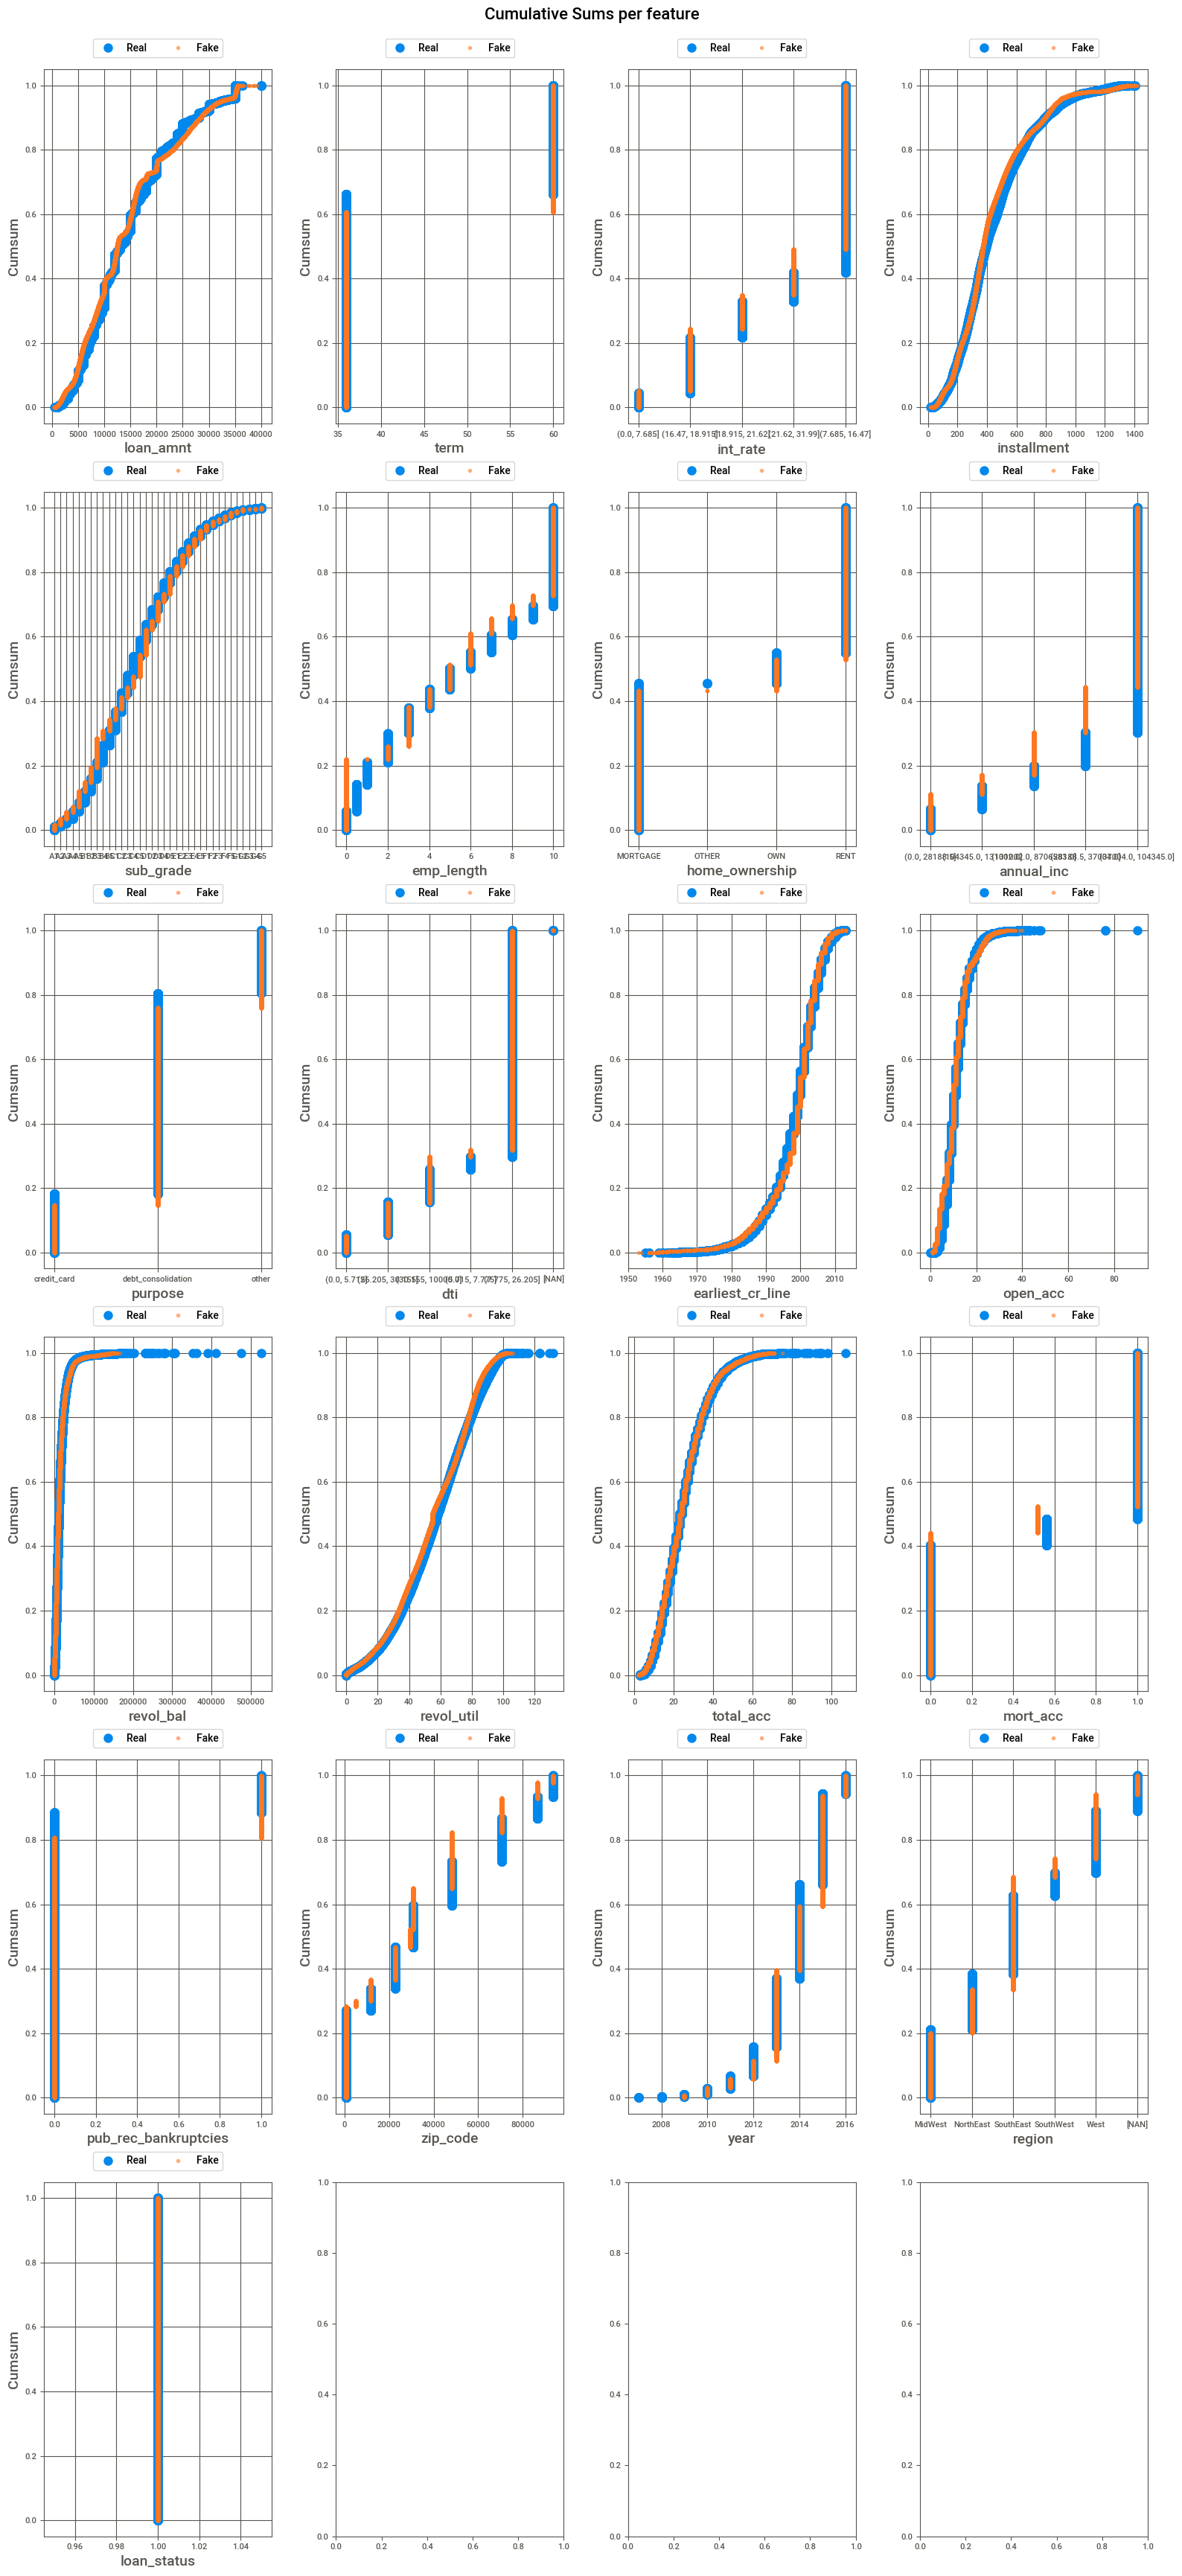

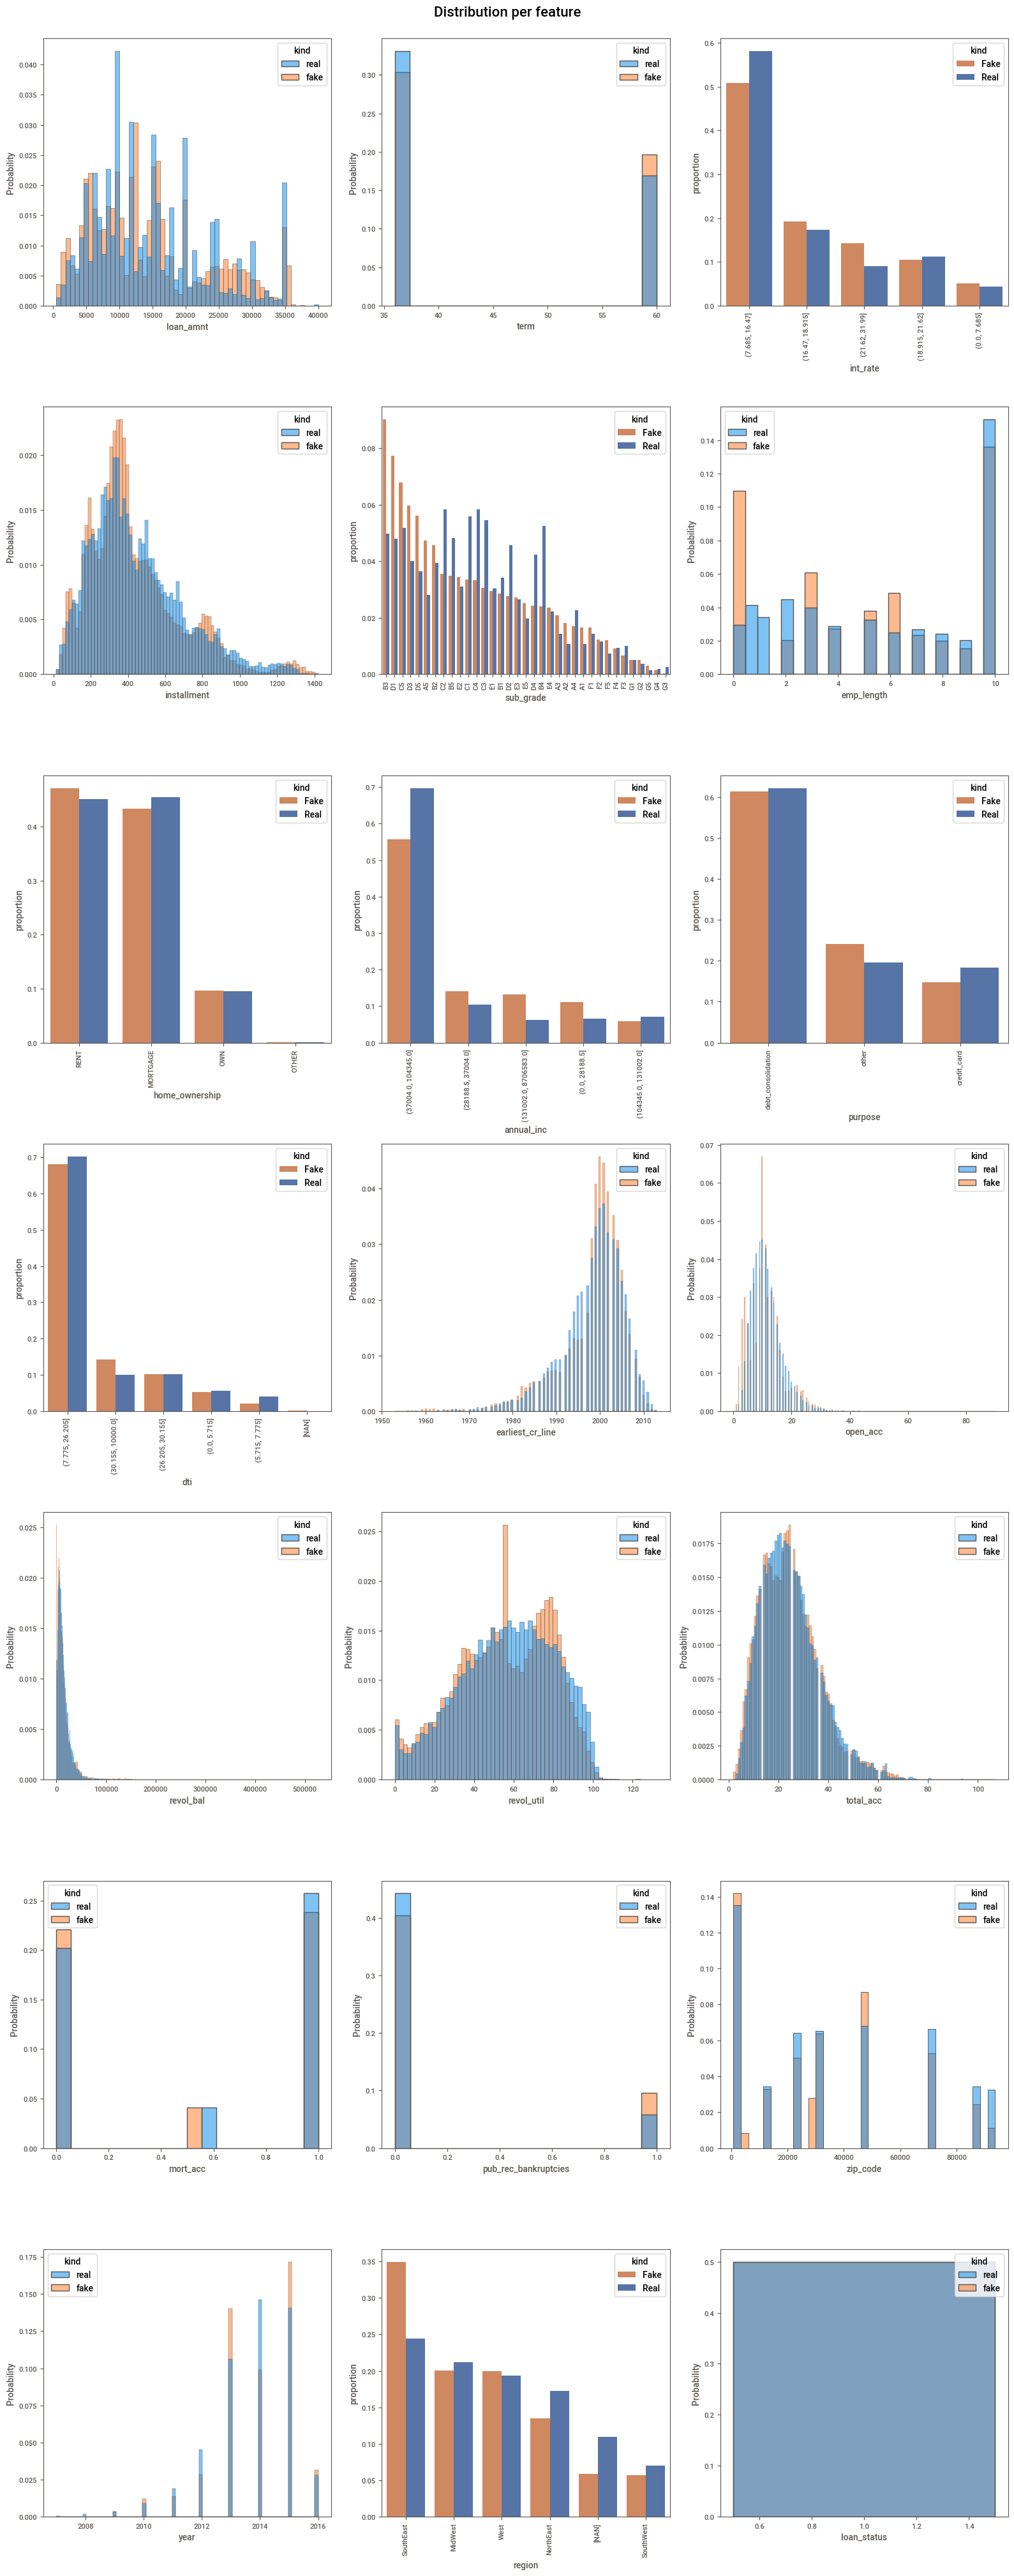

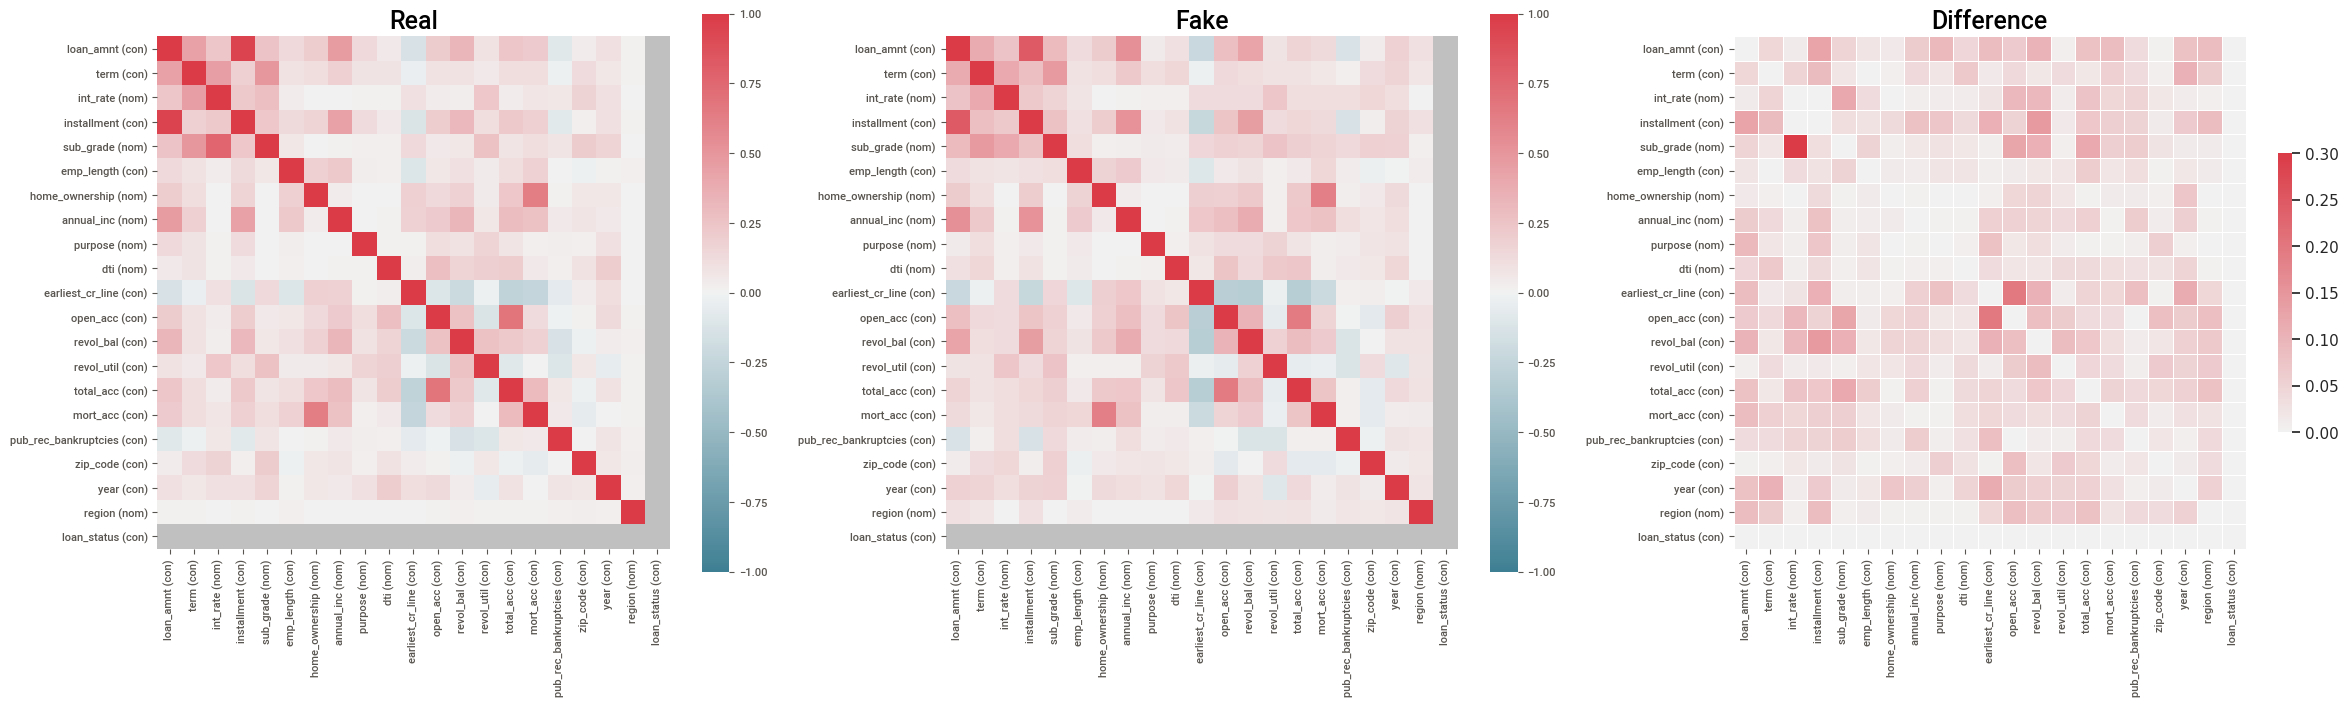

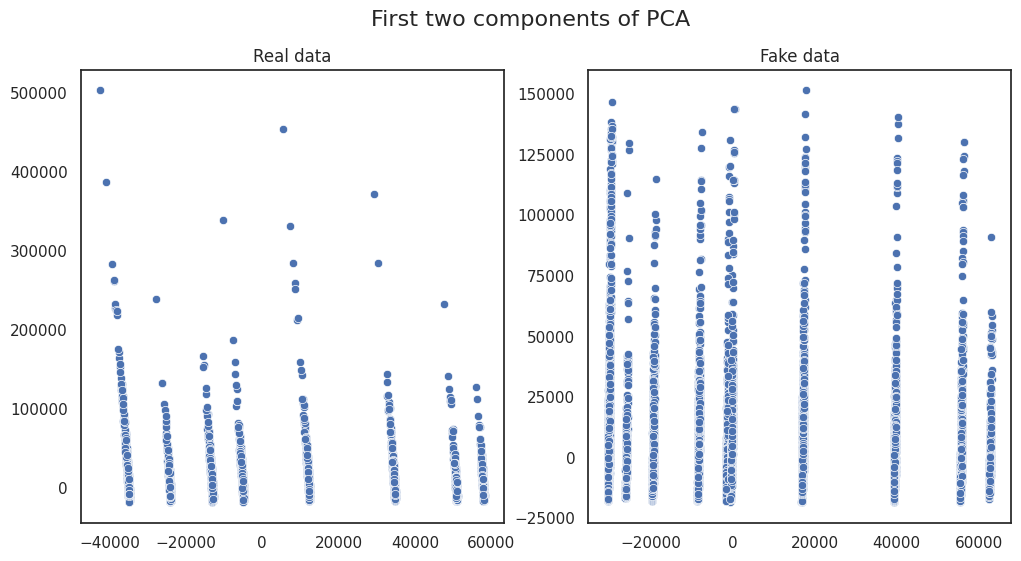

In [14]:
table_evaluator.visual_evaluation()

## Real Data & Synthetic Data Comparison (ALL DATA)

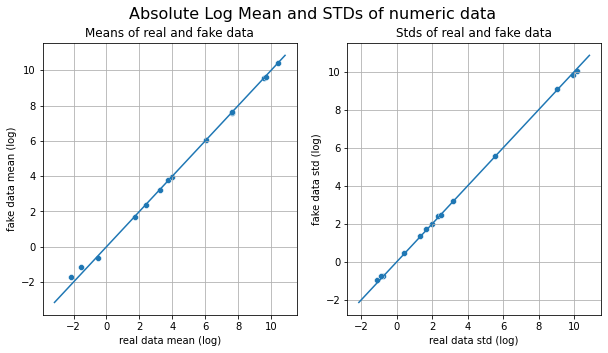

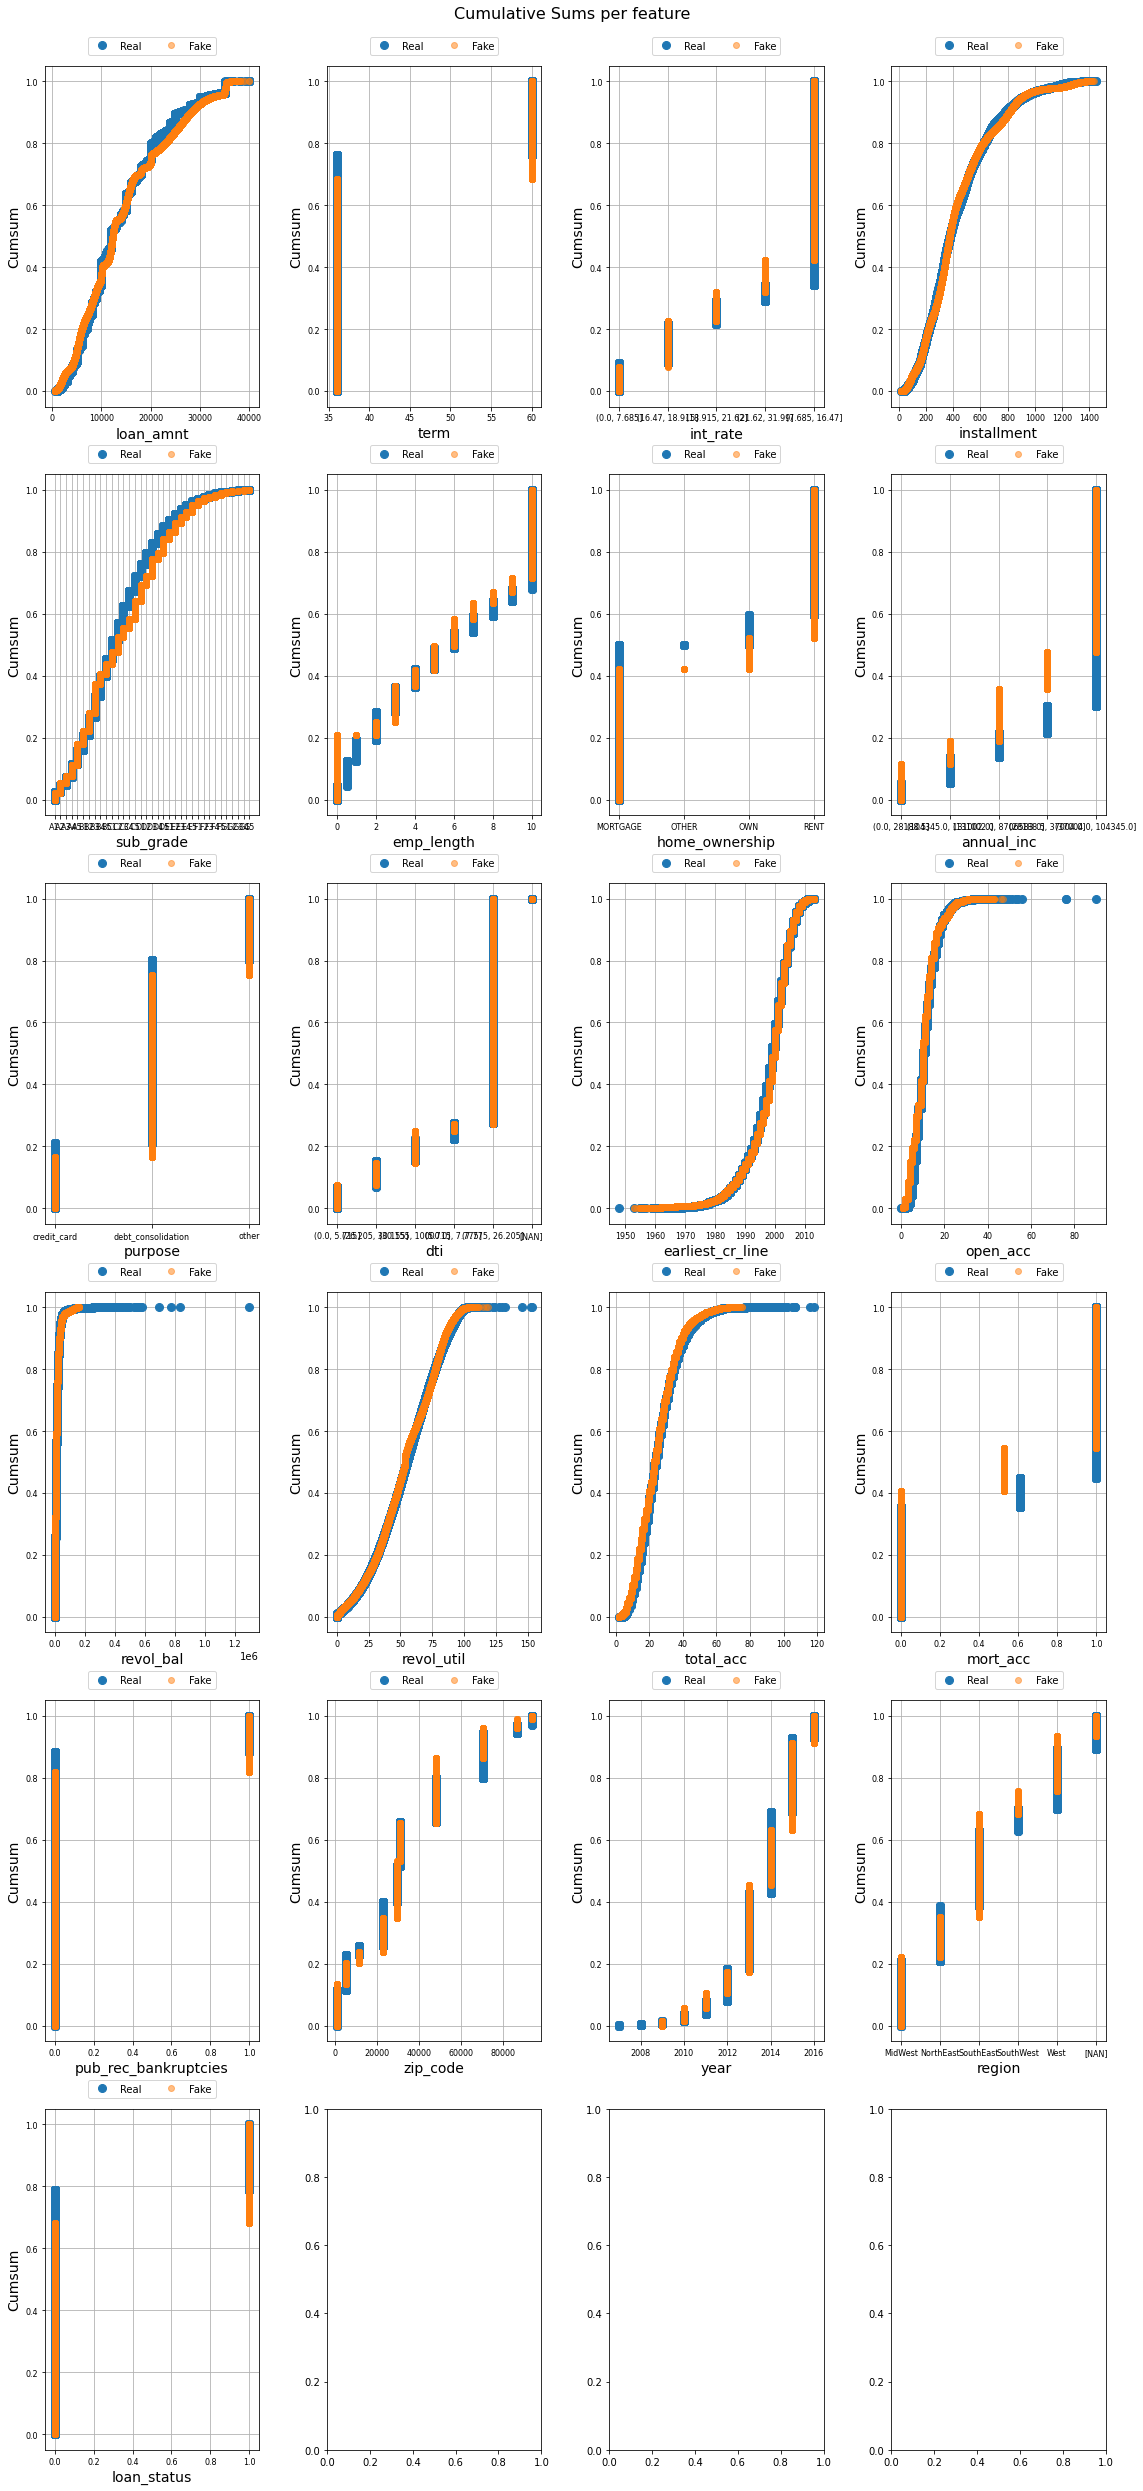

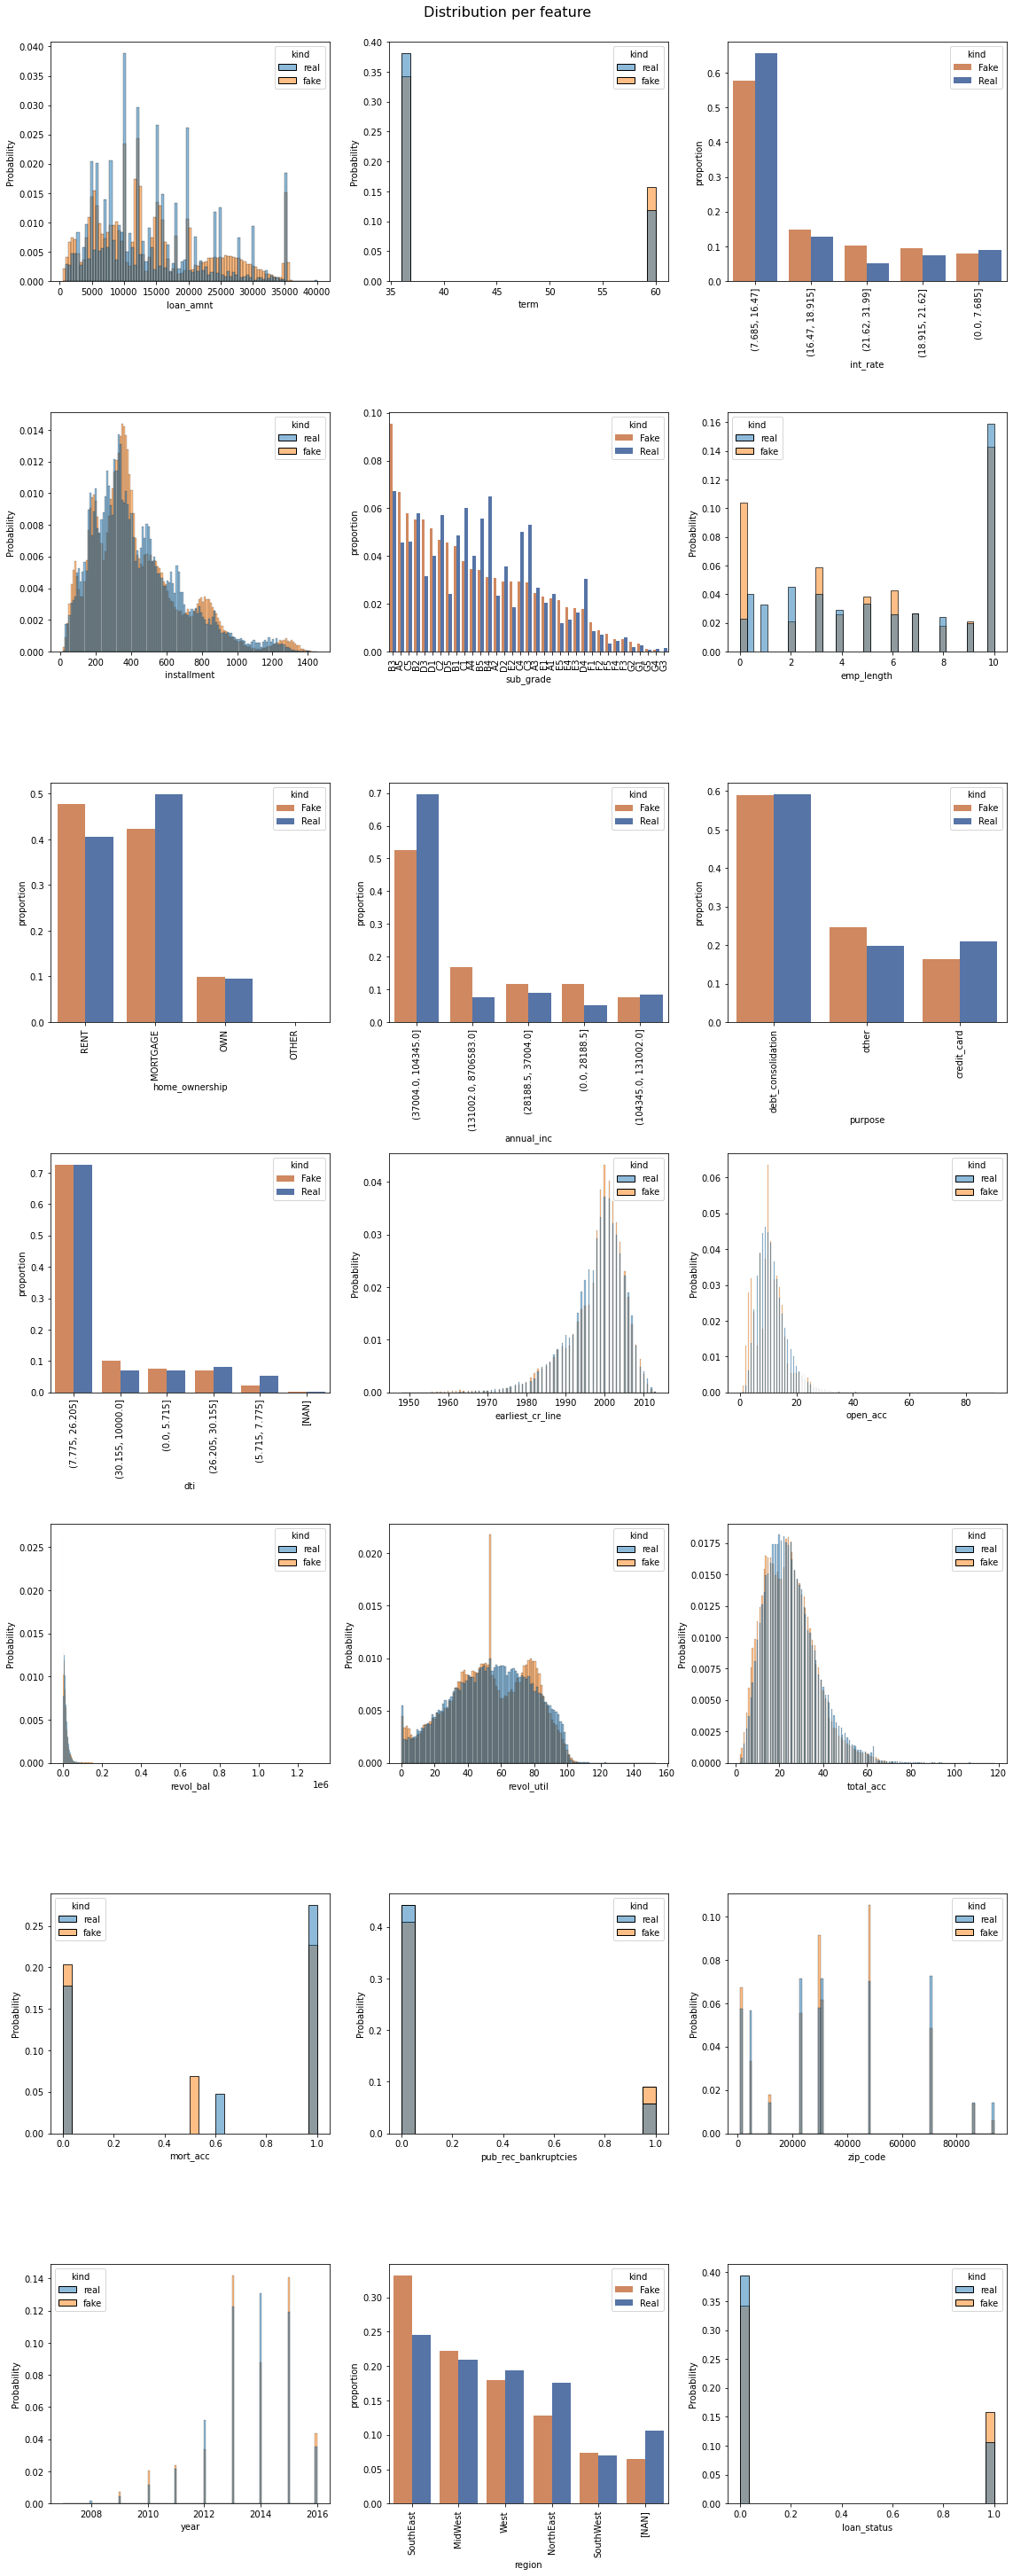

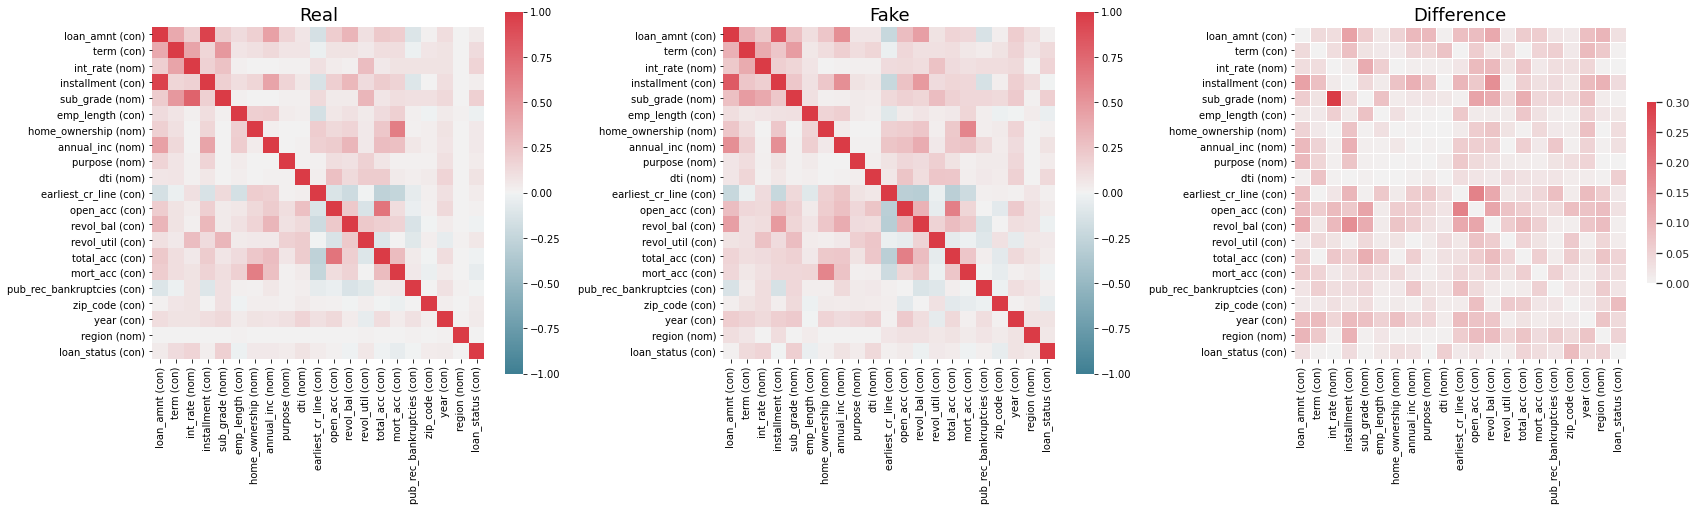

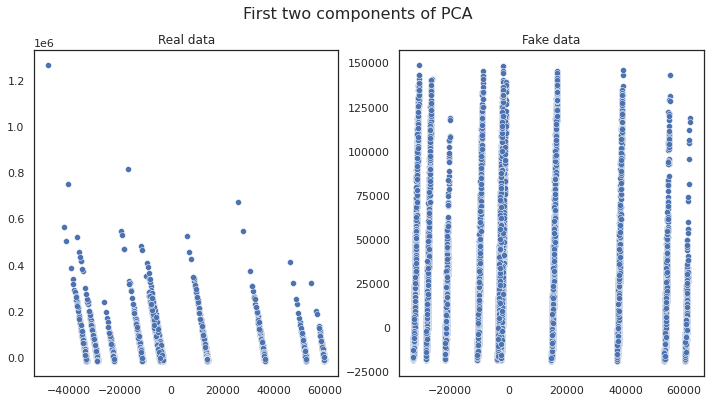

In [9]:
table_evaluator = TableEvaluator(test, synthetic_data_full)
table_evaluator.visual_evaluation()

In [10]:
table_evaluator.evaluate(target_col='loan_status',target_type='class')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.6542   0.6432              0.4836
DecisionTreeClassifier_real   0.7379   0.6666              0.4946
RandomForestClassifier_fake   0.6900   0.7143              0.6986
RandomForestClassifier_real   0.7887   0.7695              0.7256

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    2.5645
nearest neighbor std                     0.6693

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0554
Column Correlation distance MAE   0.0401

Results:
                                                result
Basic statistics                                0.9994
Correlation column correlations                 0.9295
Mean Correlation 